# Data Cleaning and Preparation

In [78]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # For missing value visualization
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.feature_selection import mutual_info_classif

import warnings
warnings.filterwarnings("ignore")

# sets the maximum number of columns that will be displayed in a dataframe to 200 for improved data viewing
pd.set_option('display.max_columns', None)

In [79]:
# Custom color palette inspired by CUSTOM
CUSTOM_PALETTE = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC948", "#B07AA1", "#FF9DA7", "#9C755F", "#BAB0AC"]
sns.set_palette(CUSTOM_PALETTE)
plt.style.use('ggplot')

# Seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.15, rc={"grid.linewidth": 0.6})

# Matplotlib rcParams
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',  # Or try 'Segoe UI', 'Calibri', etc.
    'font.weight': 'normal',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.titlepad': 25,
    'axes.labelsize': 14,
    'axes.labelweight': 'regular',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'grid.color': '#D3D3D3',
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'axes.prop_cycle': plt.cycler(color=CUSTOM_PALETTE)
})

# Despine
sns.despine(offset=10, trim=True)

<Figure size 1000x600 with 0 Axes>

### Data Reading

I start by loading the dataset and reviewing its structure. I note the data types (e.g., numerical, categorical, datetime) and identify the key variables relevant to the analysis. This helps me set expectations for the cleaning and preprocessing tasks.

In [80]:
df = pd.read_csv('../data/raw/Telecom_Data.csv')

### Data Exploration
Data exploration is a critical step in the data analysis process, where you examine the dataset to gain a preliminary understanding of the data, detect patterns, and identify potential issues that may need further investigation. Data exploration is important because it helps to provide a solid foundation for subsequent data analysis tasks, hypothesis testing and data visualization.

In [81]:
# Data Reading
df.head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
0,hthjctifkiudi0,1,1.0,71638,Female,36.000000,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.970000,5.71,1.79,25.71,175.56,0.470000,0.0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0.0,0.26,11.53,46.42,18.0,NaN,38.30,219.25,Not Applicable,Not Applicable,NaN,NaN,214.99,1,Yes,9.0,Yes,Yes,Yes,DSL,27,No,No,Yes,Yes,No,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,A
1,uqdtniwvxqzeu1,6,6.0,72566,Male,36.657198,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.800000,30.00,7.61,308.29,265.20,10.820000,0.0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0.0,0.05,32.51,25.53,1183.0,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.00,0,No,0.0,Yes,Yes,No,NaN,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,Stayed,F
2,uqdtniwvxqzeu1,7,6.0,72566,Male,36.607828,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,101.22,1012.60,115.26,52.95,1151.693063,103.28,15.71,244.20,15.19,61.837211,0.0,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0.0,0.06,13.05,5.62,295.0,7.0,14.83,967.95,-9.4,106.3,1.0,1.0,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,Stayed,No Offer
3,uqdtniwvxqzeu1,8,6.0,72566,Male,36.943638,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.990000,280.86,6.33,346.14,103.15,183.530000,0.0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0.0,0.07,69.13,10.62,354.0,1.0,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,Yes,No,Yes,Fiber Optic,57,No,No,Yes,No,Yes,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,Not Applicable,Not Applicable,Stayed,J
4,uqdtniwvxqzeu1,9,6.0,72566,Male,36.632494,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,138.85,201.92,19.89,15.91,23.78,16.01,0.0,0.03,64.35,36.18,0.0,NaN,52.78,370.59,Not Applicable,Not Applicable,NaN,NaN,399.84,0,Yes,1.0,No,No,Yes,Fiber Optic,38,No,No,No,No,No,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,Not Applicable,Not Applicable,Stayed,No Offer


In [88]:
# Overall dataset shape
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Total cells: {df.shape[0] * df.shape[1]}")


Dataset Shape: 653753 rows, 74 columns
Total cells: 48377722


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer ID                 653753 non-null  object 
 1   Month                       653753 non-null  int64  
 2   Month of Joining            653753 non-null  float64
 3   zip_code                    653753 non-null  int64  
 4   Gender                      653753 non-null  object 
 5   Age                         653753 non-null  float64
 6   Married                     653753 non-null  object 
 7   Dependents                  653753 non-null  object 
 8   Number of Dependents        648808 non-null  float64
 9   Location ID                 653753 non-null  object 
 10  Service ID                  653753 non-null  object 
 11  state                       653753 non-null  object 
 12  county                      653753 non-null  object 
 13  timezone      

Some columns have missing values

In [87]:
# Data types overview
print("\nData Types:")
print(df.dtypes.value_counts())


Data Types:
float64    37
object     32
int64       5
Name: count, dtype: int64


In [91]:
df.dtypes[df.dtypes == 'int64']

Month                         int64
zip_code                      int64
Churn Value                   int64
Streaming Data Consumption    int64
Satisfaction Score            int64
dtype: object

In [92]:
df.dtypes[df.dtypes == 'float64']

Month of Joining        float64
Age                     float64
Number of Dependents    float64
latitude                float64
longitude               float64
arpu                    float64
roam_ic                 float64
roam_og                 float64
loc_og_t2t              float64
loc_og_t2m              float64
loc_og_t2f              float64
loc_og_t2c              float64
std_og_t2t              float64
std_og_t2m              float64
std_og_t2f              float64
std_og_t2c              float64
isd_og                  float64
spl_og                  float64
og_others               float64
loc_ic_t2t              float64
loc_ic_t2m              float64
loc_ic_t2f              float64
std_ic_t2t              float64
std_ic_t2m              float64
std_ic_t2f              float64
std_ic_t2o              float64
spl_ic                  float64
isd_ic                  float64
ic_others               float64
total_rech_amt          float64
total_rech_data         float64
vol_4g  

In [93]:
df.dtypes[df.dtypes == 'object']

Customer ID               object
Gender                    object
Married                   object
Dependents                object
Location ID               object
Service ID                object
state                     object
county                    object
timezone                  object
area_codes                object
country                   object
arpu_5g                   object
arpu_4g                   object
Referred a Friend         object
Phone Service             object
Multiple Lines            object
Internet Service          object
Internet Type             object
Online Security           object
Online Backup             object
Device Protection Plan    object
Premium Tech Support      object
Streaming TV              object
Streaming Movies          object
Streaming Music           object
Unlimited Data            object
Payment Method            object
Status ID                 object
Churn Category            object
Churn Reason              object
Customer S

In [90]:
# Basic statistics for numeric variables
print("\nNumeric Variables Summary Statistics:")
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_stats = numeric_df.describe()
numeric_stats


Numeric Variables Summary Statistics:


,Month,Month of Joining,zip_code,Age,Number of Dependents,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Number of Referrals,Streaming Data Consumption,Satisfaction Score
count,653753.000000,653753.000000,653753.000000,653753.000000,648808.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.0,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.00000,653753.000000,653753.000000,653753.000000,653753.0,653753.000000,653753.000000,653753.000000,653753.000000,443849.000000,653753.000000,653753.000000,280650.000000,243359.000000,653753.000000,653753.000000,653366.000000,653753.000000,653753.000000
mean,9.508209,5.823574,90386.180128,36.627508,1.161307,37.652731,-114.392353,781.196280,249.649581,267.554917,834.627412,678.554324,32.269385,30.328614,577.606835,441.072131,34.878469,0.0,49.607795,88.964864,98.301011,846.742888,720.748656,330.91955,369.434031,306.380190,125.712838,0.0,0.251306,251.281481,144.004310,1687.052445,4.852747,192.096023,2240.746081,0.217638,0.795796,530.530351,0.045682,4.337965,27.574284,3.131712
std,3.298742,2.855148,8412.506653,12.168678,2.254298,4.687151,10.537540,1807.269437,424.616652,625.610182,1589.594440,1112.490267,59.017015,67.610974,1306.895141,990.212679,57.920915,0.0,113.245301,168.700830,161.822471,1216.216840,1009.687483,483.25191,631.201763,437.613681,185.826256,0.0,0.438407,442.322591,293.132647,2980.015423,8.319981,592.101187,4582.943857,0.412640,0.403120,1402.826222,0.208796,3.769501,26.349552,1.249076
min,1.000000,1.000000,71601.000000,19.000000,0.000000,31.790000,-124.630000,-2258.680000,-25.049540,-108.651017,-30.166077,0.000000,-6.936413,0.000000,0.000000,0.000000,-2.204748,0.0,0.000000,-42.624578,-12.866150,0.000000,0.000000,0.00000,-40.955947,0.000000,0.000000,0.0,0.000000,-49.514184,-58.342240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-371.472900,0.000000,0.000000,0.000000,1.000000
25%,7.000000,3.000000,88424.000000,28.000000,0.000000,34.140000,-121.650000,118.940000,12.090000,14.710000,32.700000,26.260000,1.460000,1.610000,33.120000,25.560000,1.200000,0.0,3.250000,4.940000,3.430000,85.570000,84.170000,36.11000,42.460000,32.190000,12.460000,0.0,0.040000,26.980000,20.330000,72.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000
50%,10.000000,6.000000,93032.000000,34.000000,0.000000,36.080000,-118.390000,348.540000,50.560000,75.100000,171.330000,135.460000,7.800000,8.180000,174.600000,134.800000,6.340000,0.0,17.190000,25.580000,17.830000,171.490000,168.390000,72.06000,84.470000,64.760000,24.980000,0.0,0.080000,53.700000,40.540000,374.000000,0.000000,47.010000,274.110000,0.000000,1.000000,117.320000,0.000000,4.000000,20.000000,3.000000
75%,12.000000,8.000000,95551.000000,43.000000,1.000000,38.600000,-108.800000,580.650000,162.030000,135.290000,309.090000,618.230000,14.090000,14.700000,316.240000,244.490000,36.640000,0.0,31.140000,46.190000,106.780000,1259.260000,1090.080000,496.79000,126.270000,448.820000,186.720000,0.0,0.210000,80.370000,60.730000,1089.000000,7.000000,154.900000,895.810000,0.000000,1.000000,311.720000,0.000000,8.000000,49.000000,4.000000
max,14.000000,12.000000,99403.000000,80.000000,9.000000,48.990000,-89.740000,9394.500000,1719.430000,3161.780000,6431.250000,4212.010000,283.530000,336.130000,7366.160000,5622.540000,217.440000,0.0,765.050000,1020.710000,609.800000,4363.950000,3846.547156,1872.34000,2527.070000,1619.680000,663.930000,0.0,2.330000,1917.461595,1344.130000,11900.000000,32.000000,4503.930000,19876.750000,1.000000,1.000000,8214.870000,1.000000,11.000000,85.0000

In [ ]:
# Add more statistics
numeric_stats['missing'] = numeric_df.isnull().sum()
numeric_stats['missing_pct'] = (numeric_df.isnull().sum() / len(df) * 100).round(2)
numeric_stats['unique'] = numeric_df.nunique()
numeric_stats['zeros_pct'] = ((numeric_df == 0).sum() / len(df) * 100).round(2)
numeric_stats['skewness'] = numeric_df.skew()
numeric_stats['kurtosis'] = numeric_df.kurtosis()

# Print enhanced numeric statistics
numeric_stats = numeric_stats[['missing', 'missing_pct']]
numeric_stats = numeric_stats.sort_values(by='missing_pct', ascending=False)
numeric_stats.head()

,missing,missing_pct
fb_user,410394,417.79
night_pck_user,373103,379.83
total_rech_data,209904,213.69
Number of Dependents,4945,5.03
Number of Referrals,387,0.39


- We will the missing values of these three variables `Number of Dependents`, `total_rech_data` & `Number of Referrals` since they are useful for our analysis and prediciton. 
- But `night_pck_user` & `fb_user` and some other variables we will drop them

In [94]:
# Frequency counts for categorical variables
print("\nCategorical Variables Summary:")
cat_df = df.select_dtypes(include=['object'])

cat_stats = pd.DataFrame({
    'unique_values': cat_df.nunique(),
    'missing': cat_df.isnull().sum(),
    'missing_pct': (cat_df.isnull().sum() / len(df) * 100).round(2)
})

cat_stats = cat_stats.sort_values(by='missing_pct', ascending=False)
cat_stats.head()


Categorical Variables Summary:


,unique_values,missing,missing_pct
Internet Type,3,325250,49.75
Multiple Lines,2,46080,7.05
Unlimited Data,2,11103,1.70
Customer ID,98230,0,0.00
Location ID,98230,0,0.00


- `Internet Type`	has 49.75% of missing values
- `Multiple Lines` 7.05% of missing values
- `Unlimited Data` 1.70$ of missing values

We will also deal with them

## Data Quality Assessment

Generate Summary Statistics:

For numeric variables: min, max, mean, median, standard deviation.

For categorical variables: frequency counts.

Evaluate Missing Values:

Calculate missing value percentages per column.

Detect Outliers & Anomalies:

Use methods like Z-score or IQR to identify potential outliers.

Identify Inconsistencies & Duplicates:

Check for duplicate records and logical inconsistencies.

Document Findings:

Create a data quality report outlining key issues (missing values, outliers, errors) and develop data quality score metrics.

## Feature Engineering

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('CLV.csv')

# --------------------------
# 1. Select Useful Columns
# --------------------------
# List of columns we want to keep for our churn and CLVT prediction analysis
useful_columns = [
    # Demographic & Time-based
    'Month', 'Month of Joining', 'Age', 'Gender', 'Married', 'Dependents',
    # Usage & Revenue Metrics
    'arpu', 'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g',
    'Streaming Data Consumption', 'Satisfaction Score', 'Number of Referrals',
    # Service Features
    'Phone Service', 'Internet Service', 'Internet Type', 'Online Security', 
    'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
    'Payment Method', 'offer',
    # Additional revenue features
    'arpu_5g', 'arpu_4g',
    # Target variable
    'Churn Value'
]

# Create a working DataFrame with the useful columns only
df_model = df[useful_columns].copy()

# --------------------------
# 2. Convert Data Types
# --------------------------

# Convert Month of Joining to datetime (assuming it is in a recognizable format or use a specific format)
df_model['Month of Joining'] = pd.to_datetime(df_model['Month of Joining'], errors='coerce')

# If 'Month' represents month number (1-12), you might keep it as integer or convert to category
df_model['Month'] = df_model['Month'].astype('int64')
# Optionally, convert to categorical if needed:
# df_model['Month'] = df_model['Month'].astype('category')

# Convert revenue features stored as object to numeric
df_model['arpu_5g'] = pd.to_numeric(df_model['arpu_5g'], errors='coerce')
df_model['arpu_4g'] = pd.to_numeric(df_model['arpu_4g'], errors='coerce')

# Convert basic numeric columns if needed (they should already be float/int)
numeric_cols = ['Age', 'arpu', 'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g',
                'Streaming Data Consumption', 'Satisfaction Score', 'Number of Referrals']
df_model[numeric_cols] = df_model[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to 'category' type
categorical_cols = [
    'Gender', 'Married', 'Dependents', 
    'Phone Service', 'Internet Service', 'Internet Type', 'Online Security', 
    'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
    'Payment Method', 'offer'
]
for col in categorical_cols:
    df_model[col] = df_model[col].astype('category')

# --------------------------
# 3. Generate Derived Features
# --------------------------
# Example: Create a 'Tenure' column representing months of service
# Assuming that the current analysis date is the latest month in the dataset or use today's date.
current_date = pd.Timestamp('today')
# If 'Month' is only a month number, you might need to construct a full date using a reference year.
# Here we assume 'Month of Joining' is a full date.
df_model['tenure_months'] = (current_date - df_model['Month of Joining']).dt.days // 30

# --------------------------
# 4. Drop Columns Not Needed
# --------------------------
# In this example, we already selected only useful columns.
# If any additional columns need removal, you can drop them here:
# df_model.drop(columns=['Some_Extra_Column'], inplace=True)

# --------------------------
# 5. Final Check of Data Types & Overview
# --------------------------
print("Data types after conversion:")
print(df_model.dtypes)
print("\nFirst few rows of the cleaned DataFrame:")
print(df_model.head())


In [ ]:
# Print top categories for each categorical variable
print("\nTop Categories for Each Categorical Variable:")
for col in cat_df.columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False).head(5))
    print(f"Value counts percentage:")
    print((df[col].value_counts(normalize=True, dropna=False) * 100).head(5).round(2))


Top Categories for Each Categorical Variable:

Customer ID:
Customer ID
sfwyyrcqtbckj131229    14
xwsphmxjrjalu31569     14
gixwxemgpzsfi87801     14
pzlhwzgbmahcm75342     14
uaitpeftxcadu51569     14
Name: count, dtype: int64
Value counts percentage:
Customer ID
sfwyyrcqtbckj131229    0.0
xwsphmxjrjalu31569     0.0
gixwxemgpzsfi87801     0.0
pzlhwzgbmahcm75342     0.0
uaitpeftxcadu51569     0.0
Name: proportion, dtype: float64

Gender:
Gender
Female           278668
Male             276917
Not Specified     58962
Other             39206
Name: count, dtype: int64
Value counts percentage:
Gender
Female           42.63
Male             42.36
Not Specified     9.02
Other             6.00
Name: proportion, dtype: float64

Married:
Married
Yes              279124
No               276240
Not Specified     98389
Name: count, dtype: int64
Value counts percentage:
Married
Yes              42.70
No               42.25
Not Specified    15.05
Name: proportion, dtype: float64

Dependents:
Depende



2. DATA QUALITY ISSUES
------------------------------

2.1 Missing Values Analysis
Columns with missing values:
                      missing_values  missing_pct
fb_user                       410394        62.78
night_pck_user                373103        57.07
Internet Type                 325250        49.75
total_rech_data               209904        32.11
Multiple Lines                 46080         7.05
Unlimited Data                 11103         1.70
Number of Dependents            4945         0.76
Number of Referrals              387         0.06


<Figure size 1200x800 with 0 Axes>

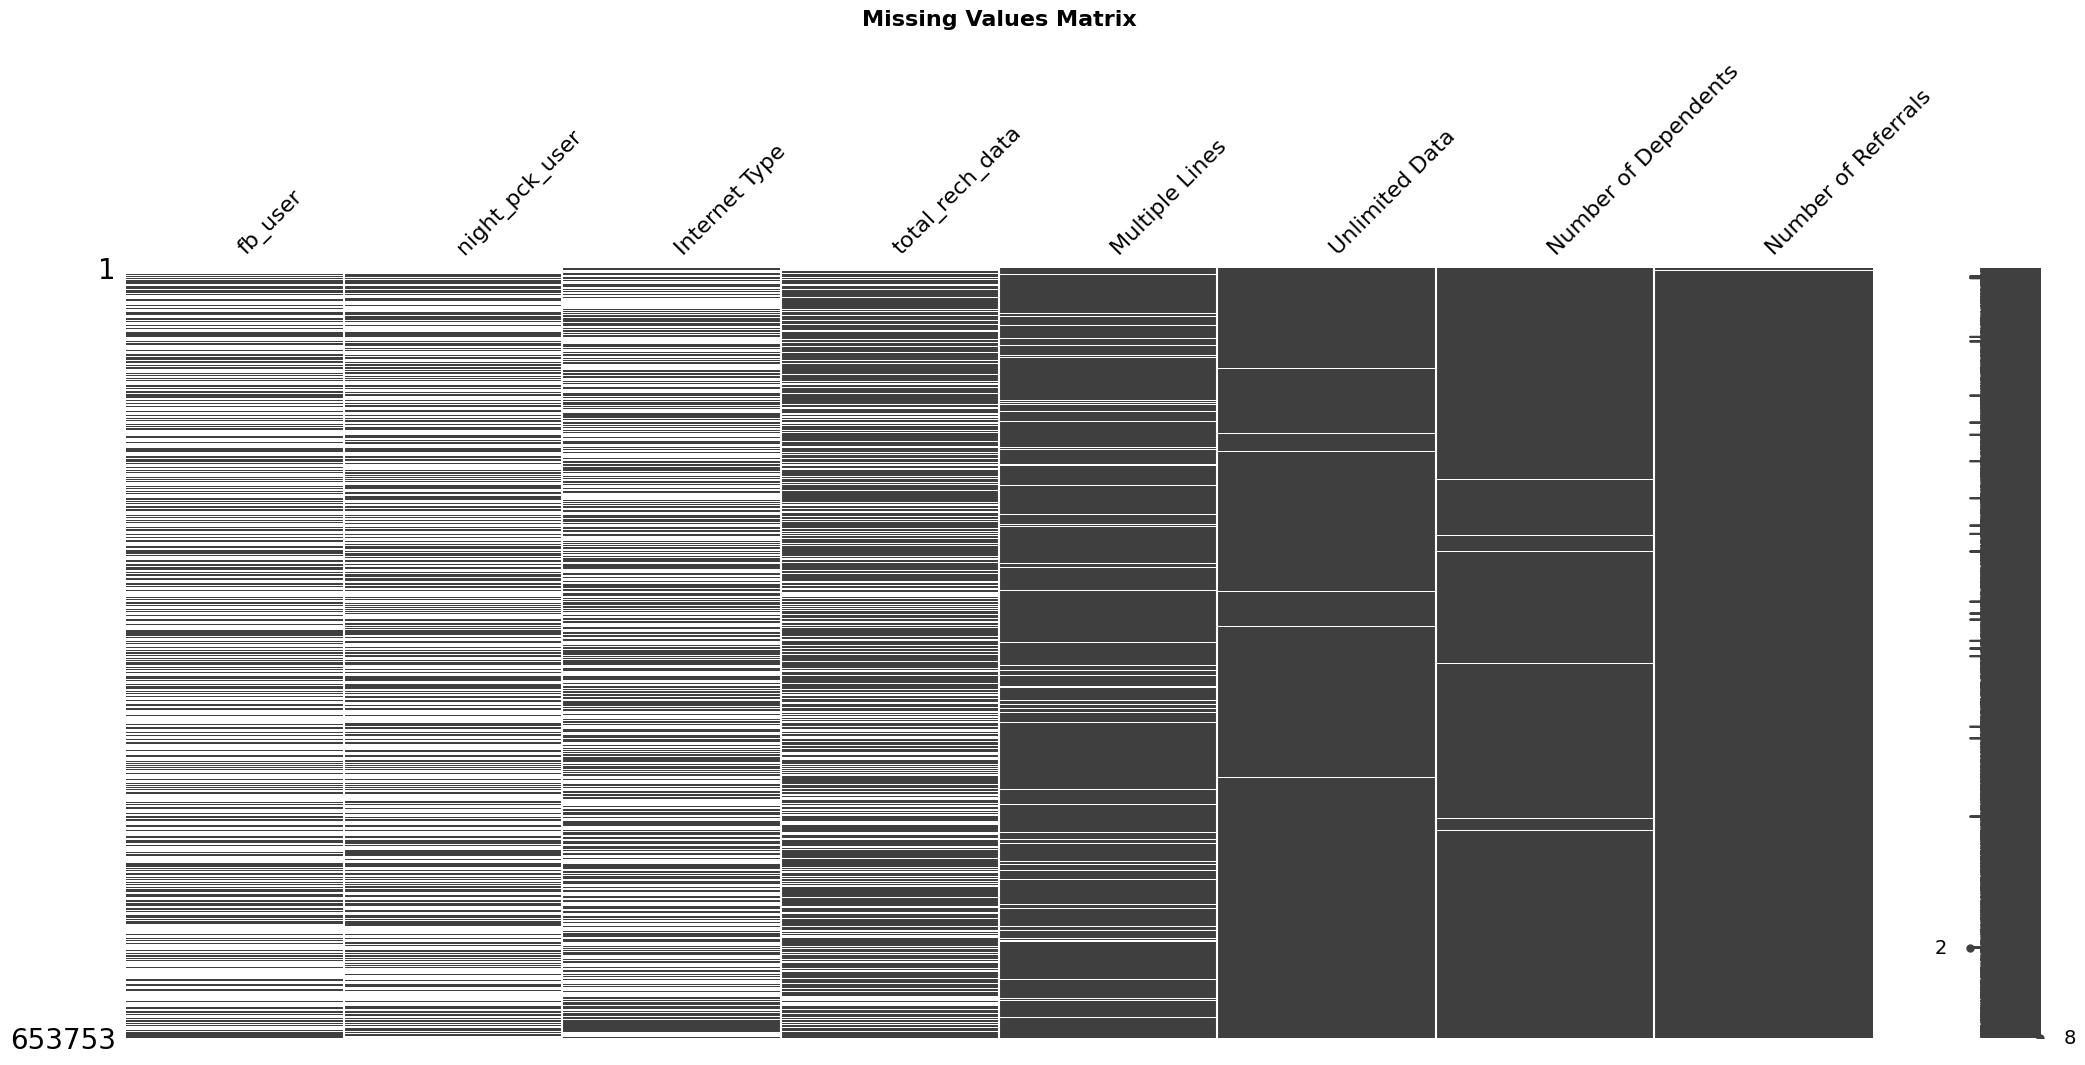

<Figure size 1000x800 with 0 Axes>

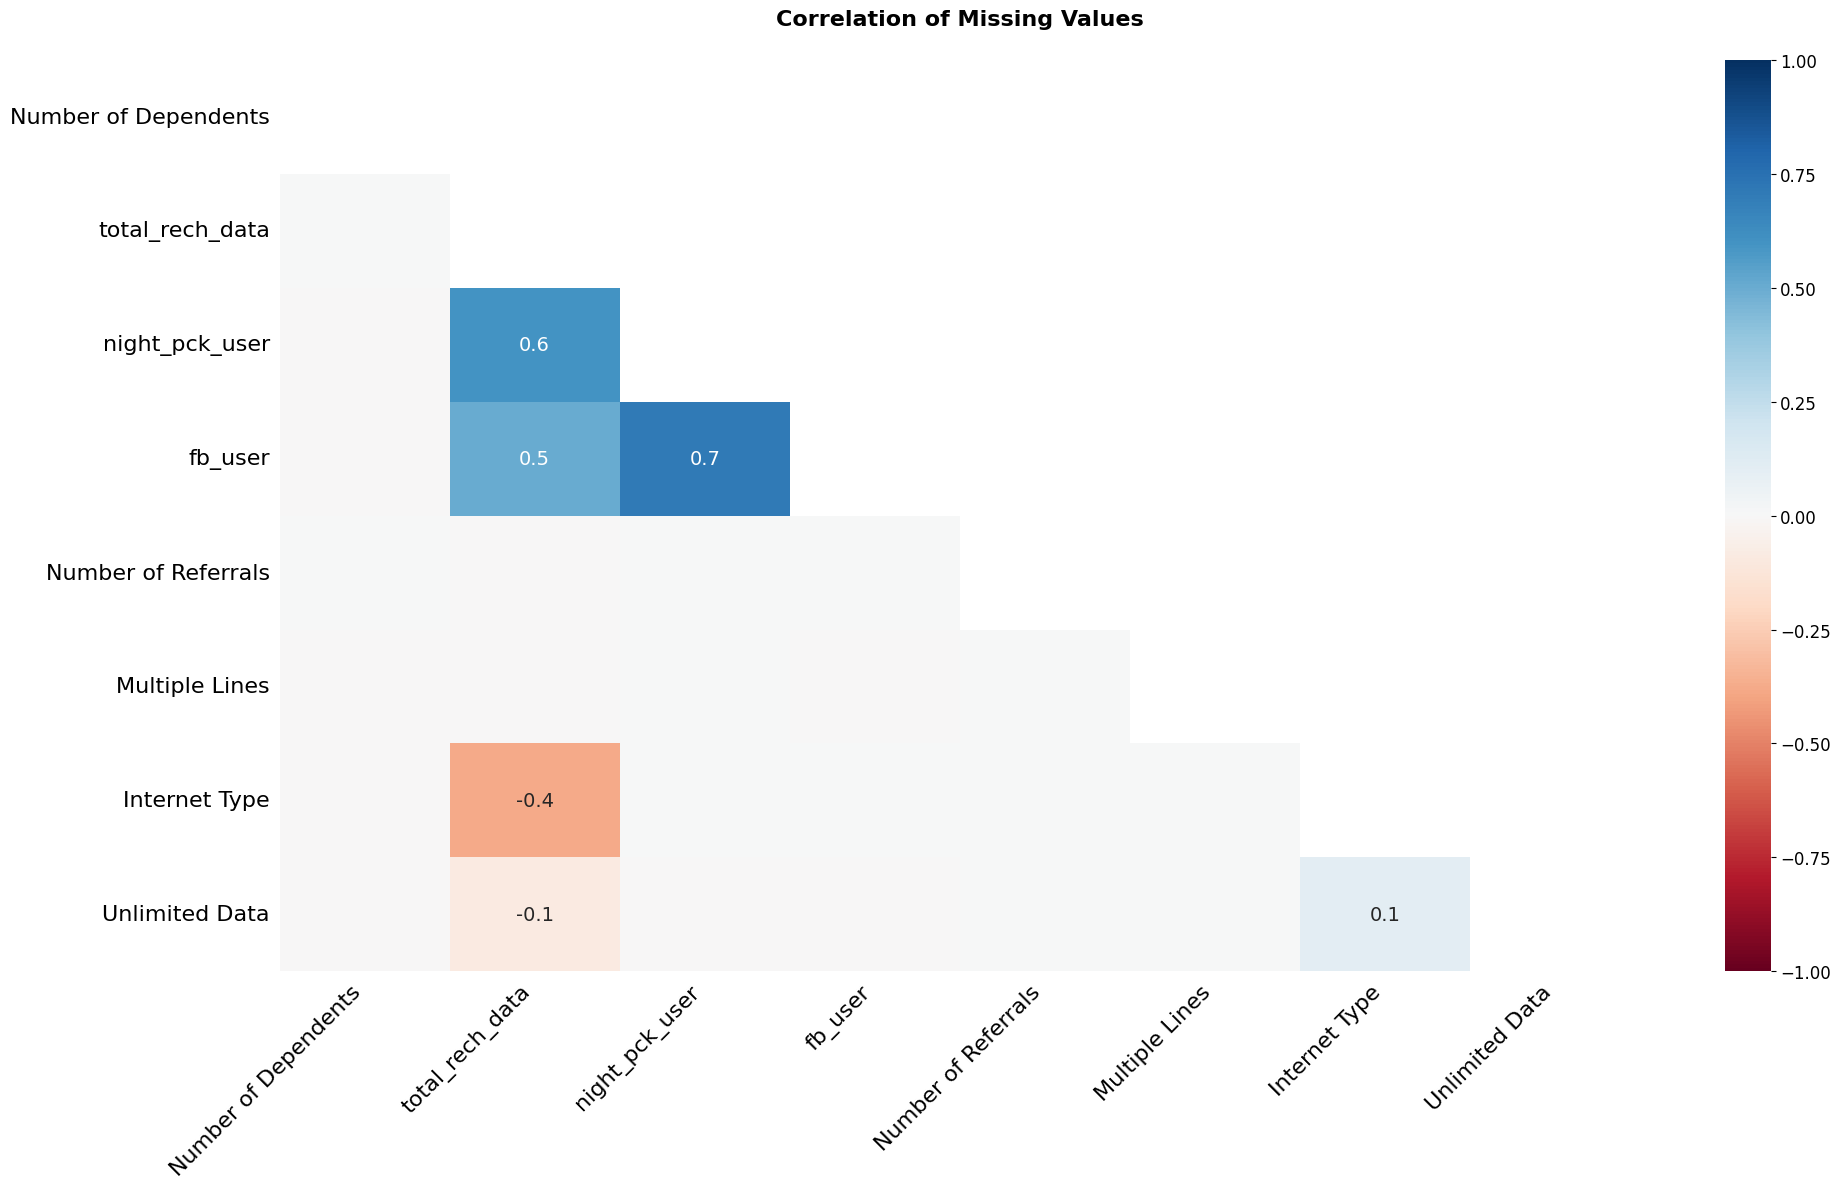

In [ ]:
#---------------------------------------------------------------
# STEP 2: IDENTIFY AND DOCUMENT DATA QUALITY ISSUES
#---------------------------------------------------------------
print("\n\n2. DATA QUALITY ISSUES\n" + "-" * 30)

# 2.1 Missing Values Analysis
print("\n2.1 Missing Values Analysis")
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing_values': missing_values, 'missing_pct': missing_pct})
missing_df = missing_df[missing_df['missing_values'] > 0].sort_values('missing_pct', ascending=False)

if not missing_df.empty:
    print("Columns with missing values:")
    print(missing_df)
    
    # Visualize missing values (matrix plot)
    plt.figure(figsize=(12, 8))
    msno.matrix(df[missing_df.index])
    plt.title('Missing Values Matrix')
    plt.tight_layout()
    plt.savefig('missing_values_matrix.png')
    
    # Correlation of missingness
    if len(missing_df) > 1:
        plt.figure(figsize=(10, 8))
        msno.heatmap(df)
        plt.title('Correlation of Missing Values')
        plt.tight_layout()
        plt.savefig('missing_correlation.png')
else:
    print("No missing values found in the dataset.")


2.2 Outlier Detection
Potential outliers detected using Z-scores (|z| > 3):
Age: 6900 outliers (1.06%)
  Non-outlier range: 19.0 to 73.0
Number of Dependents: 26648 outliers (4.11%)
  Non-outlier range: 0.0 to 7.0
arpu: 27655 outliers (4.23%)
  Non-outlier range: -2258.68 to 6203.0
roam_ic: 17545 outliers (2.68%)
  Non-outlier range: -25.049539678941564 to 1523.48
roam_og: 28440 outliers (4.35%)
  Non-outlier range: -108.65101690817065 to 2144.37
loc_og_t2t: 24192 outliers (3.7%)
  Non-outlier range: -30.16607734398339 to 5603.4
loc_og_t2m: 8493 outliers (1.3%)
  Non-outlier range: 0.0 to 4016.01
loc_og_t2f: 16454 outliers (2.52%)
  Non-outlier range: -6.936412601947298 to 209.32
loc_og_t2c: 28846 outliers (4.41%)
  Non-outlier range: 0.0 to 233.13
std_og_t2t: 25810 outliers (3.95%)
  Non-outlier range: 0.0 to 4498.129358860664
std_og_t2m: 25787 outliers (3.94%)
  Non-outlier range: 0.0 to 3411.621483632916
std_og_t2f: 6233 outliers (0.95%)
  Non-outlier range: -2.2047483815911386 to 

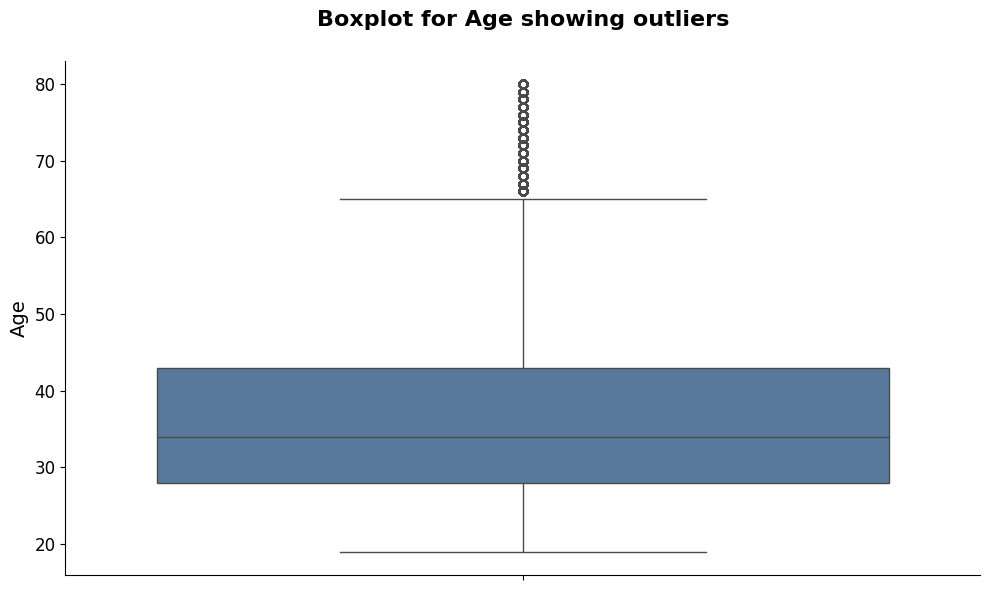

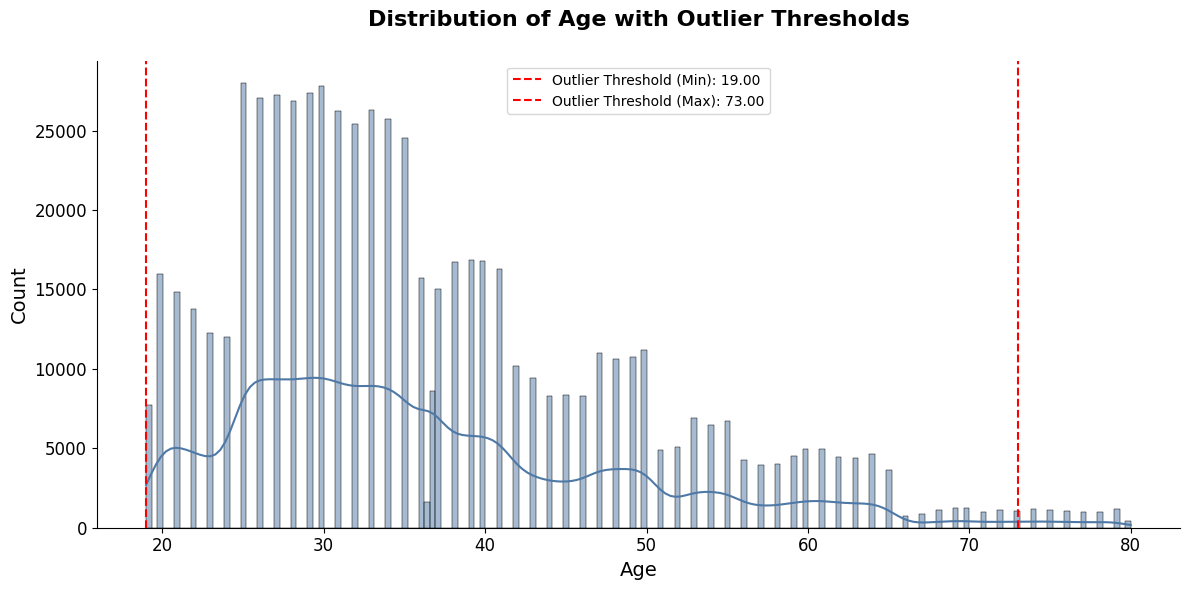

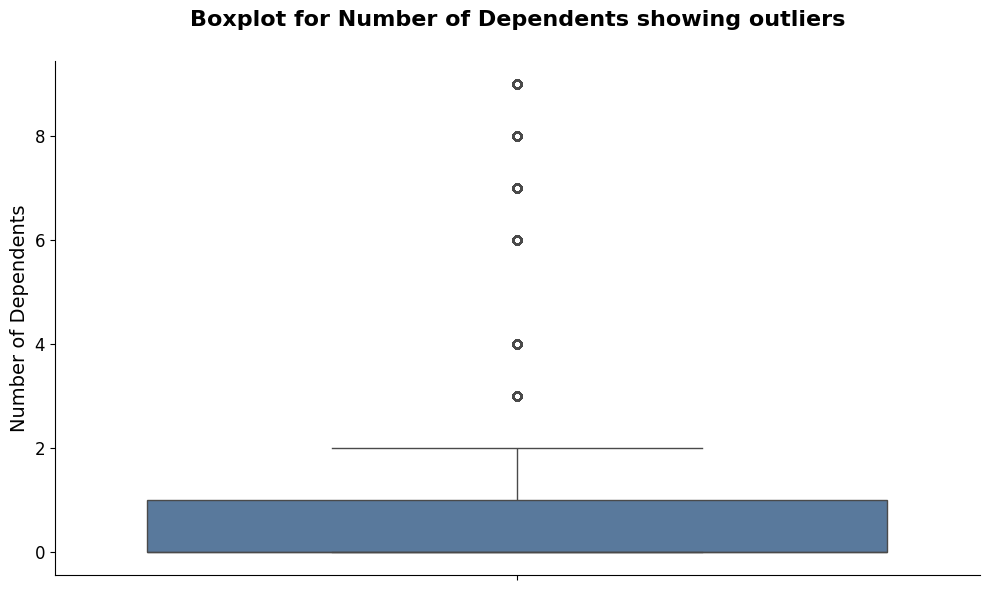

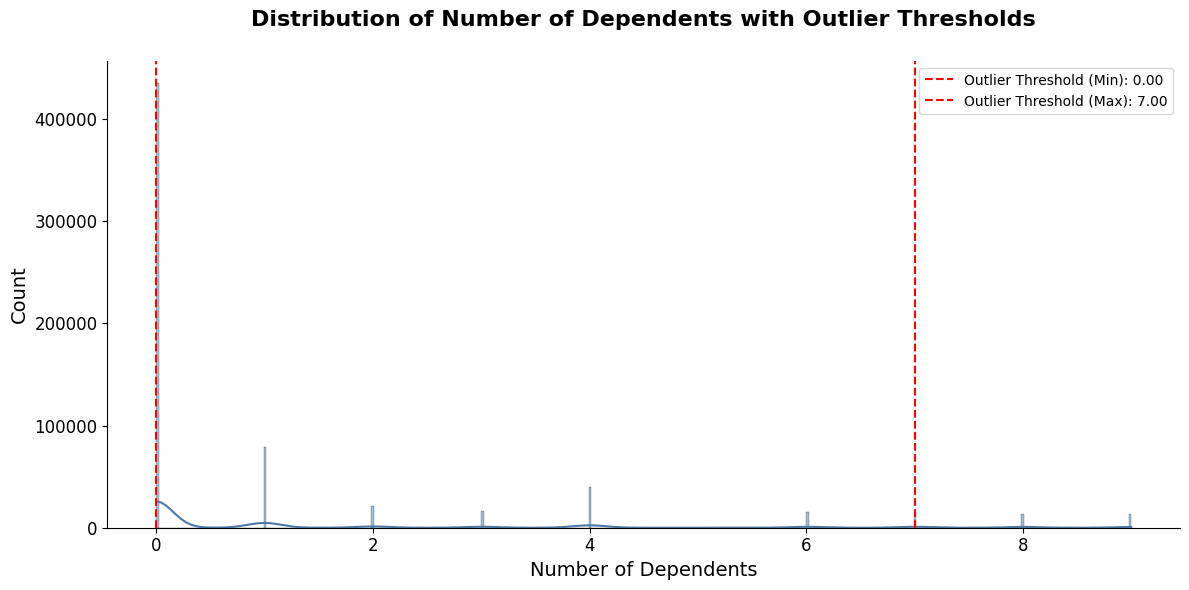

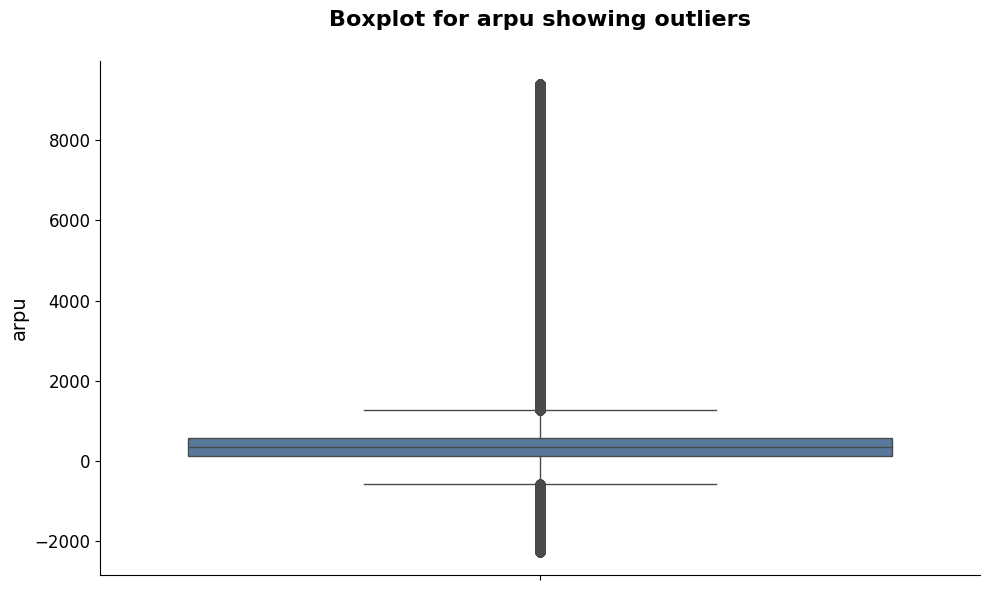

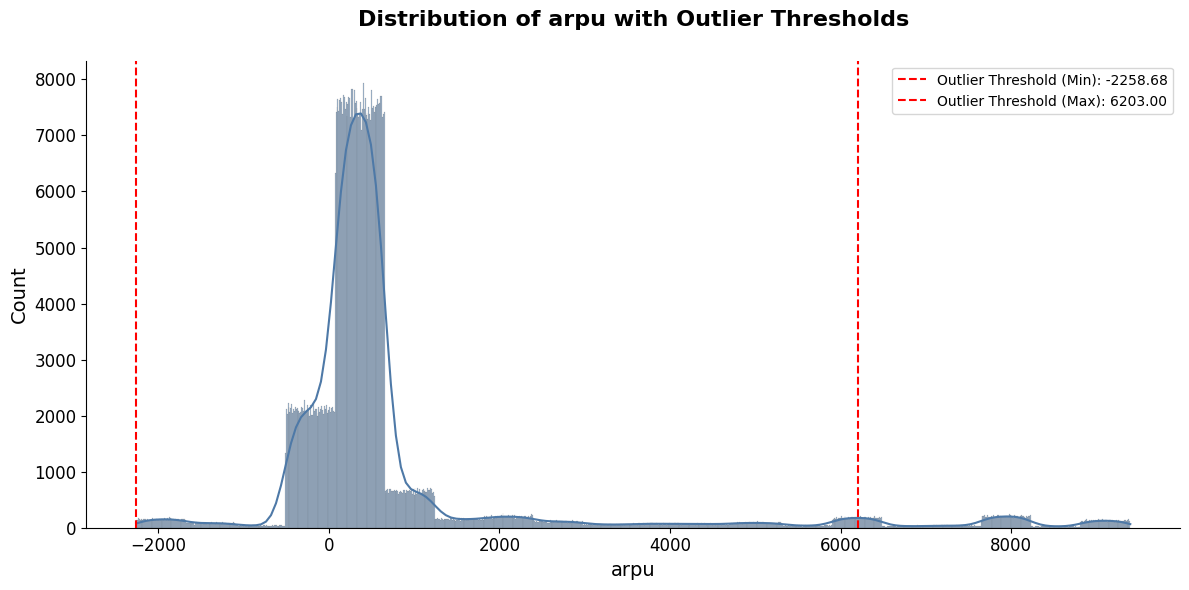

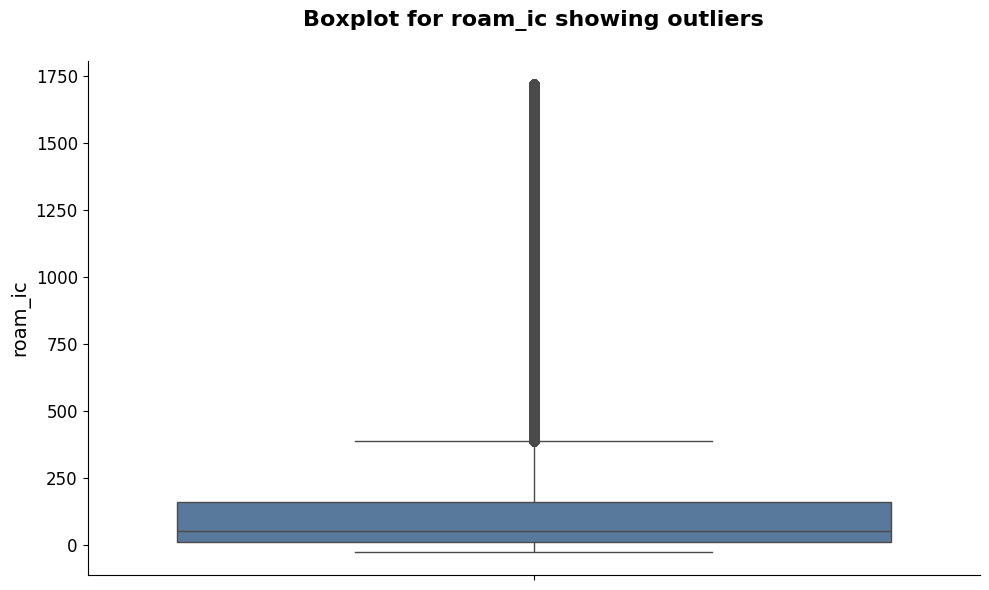

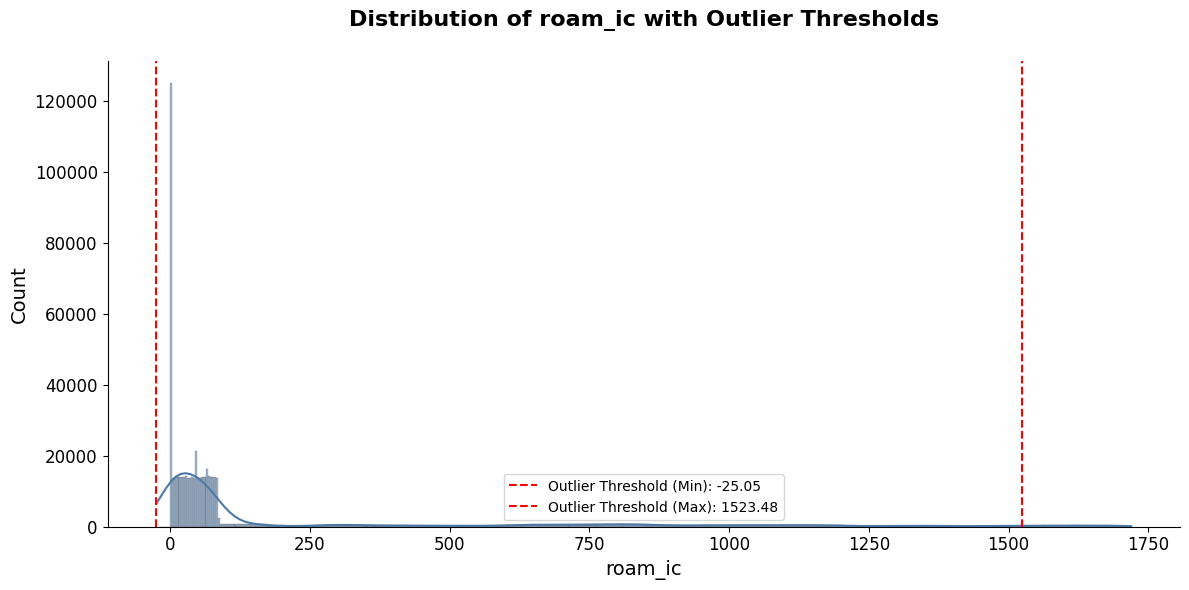

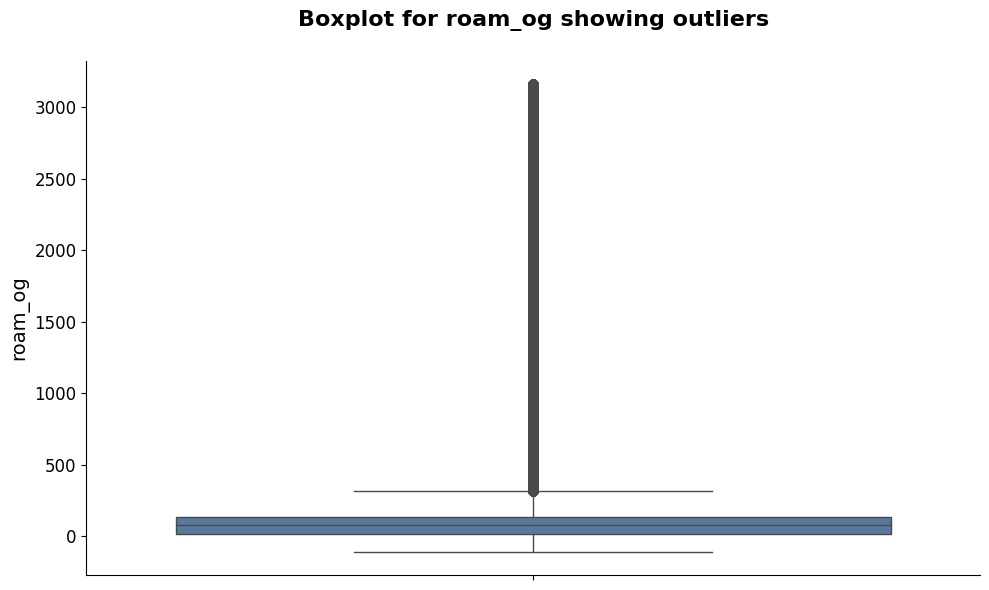

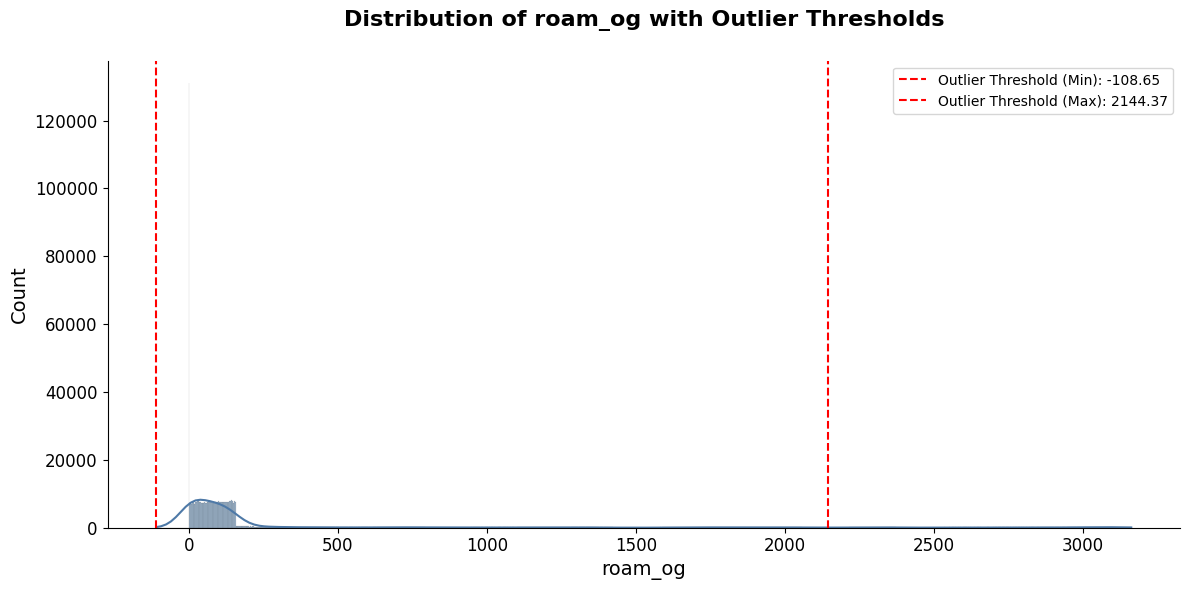

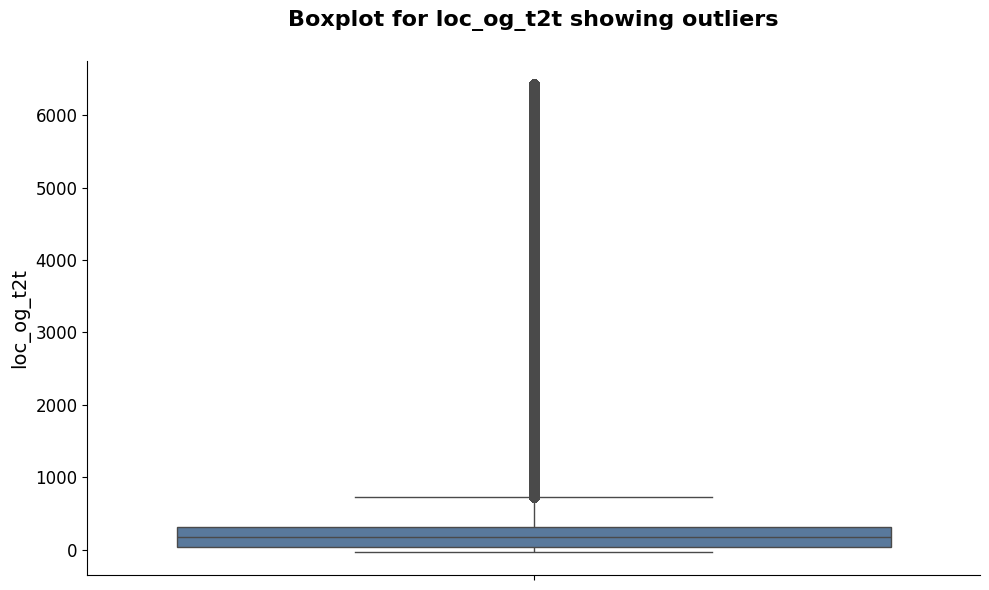

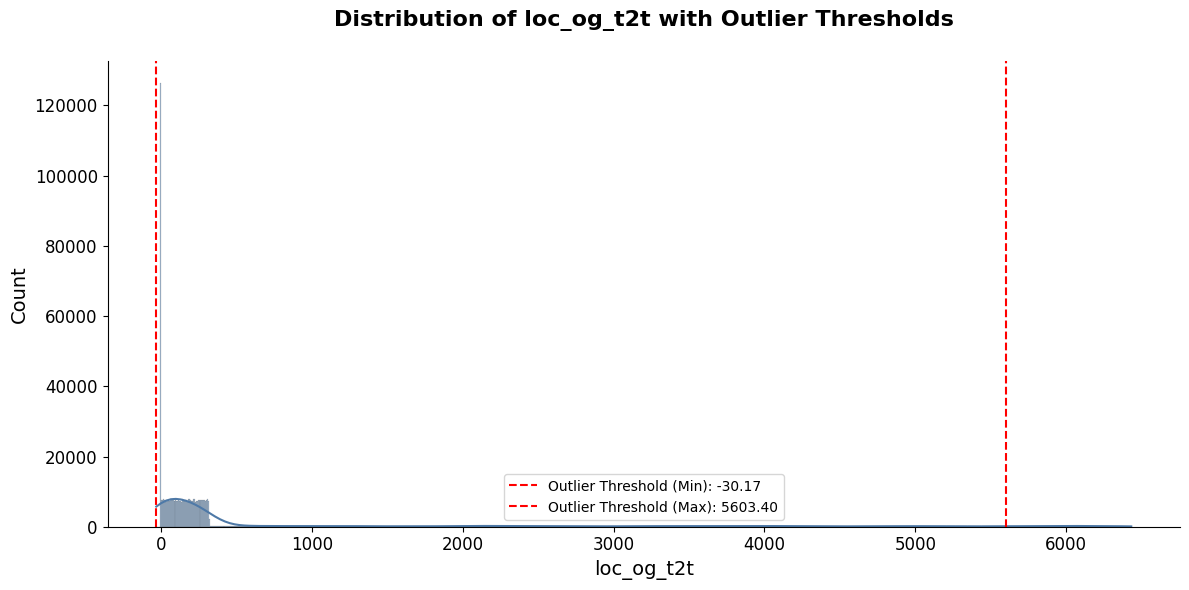

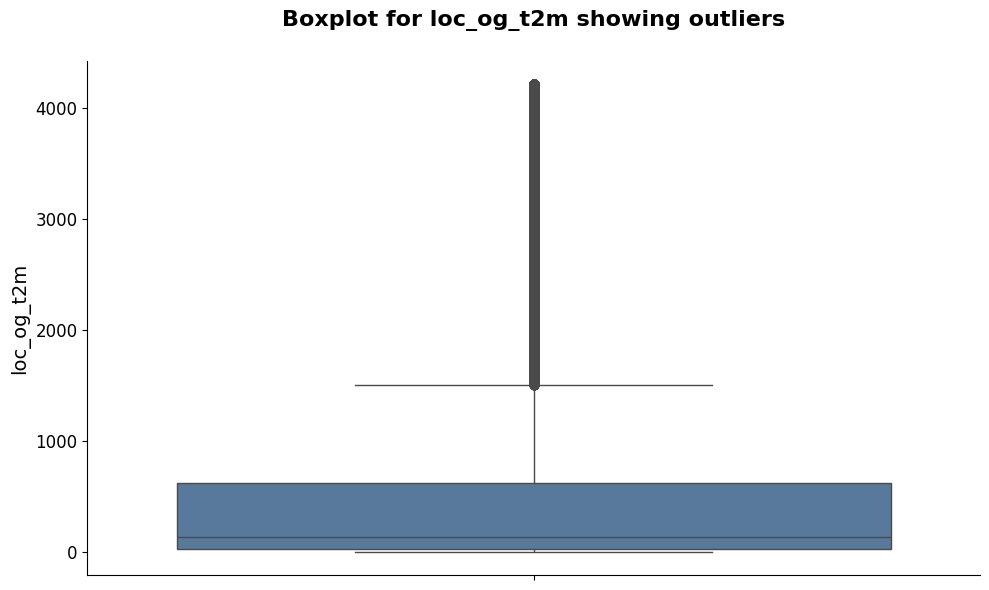

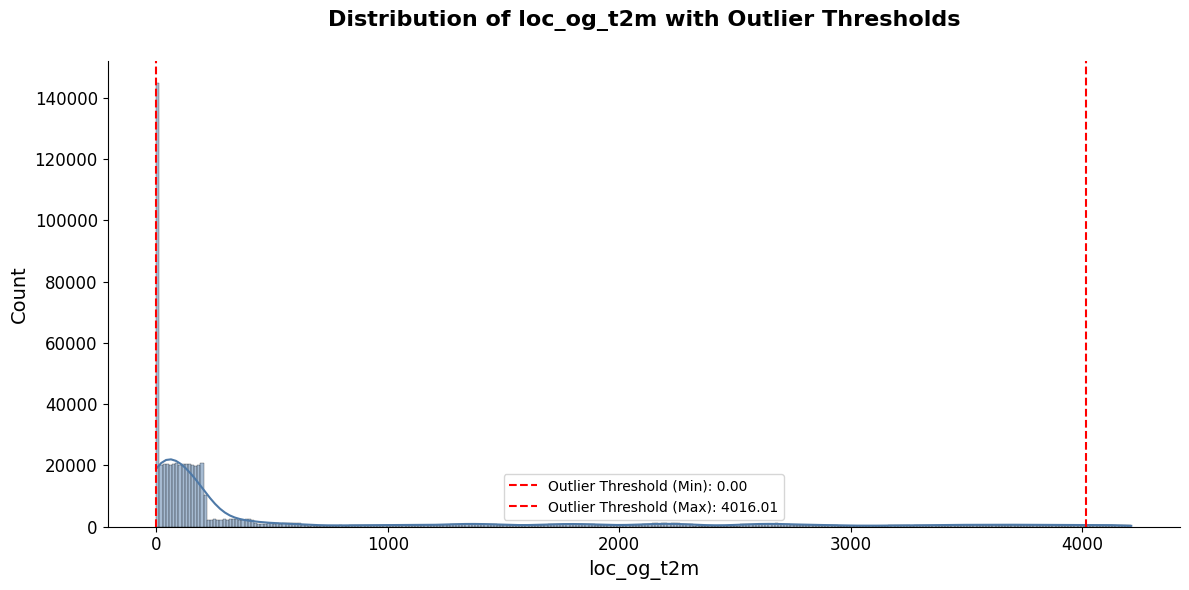

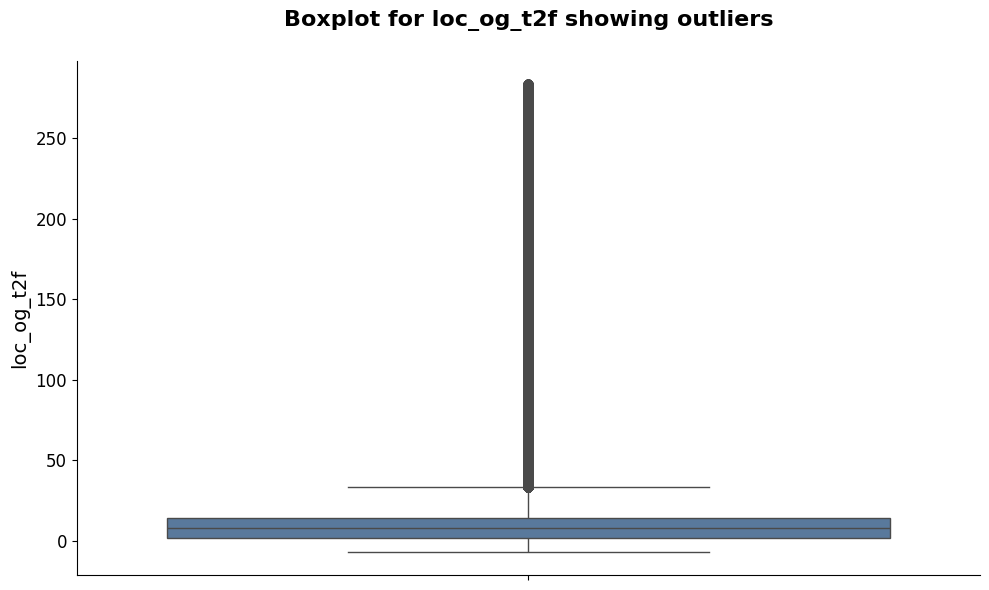

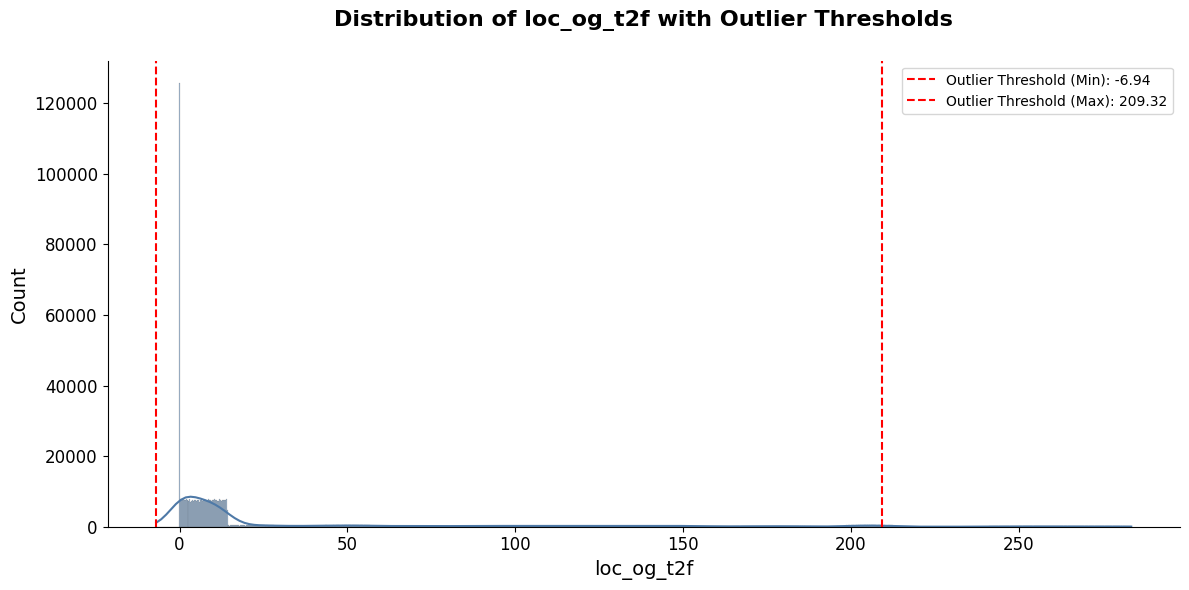

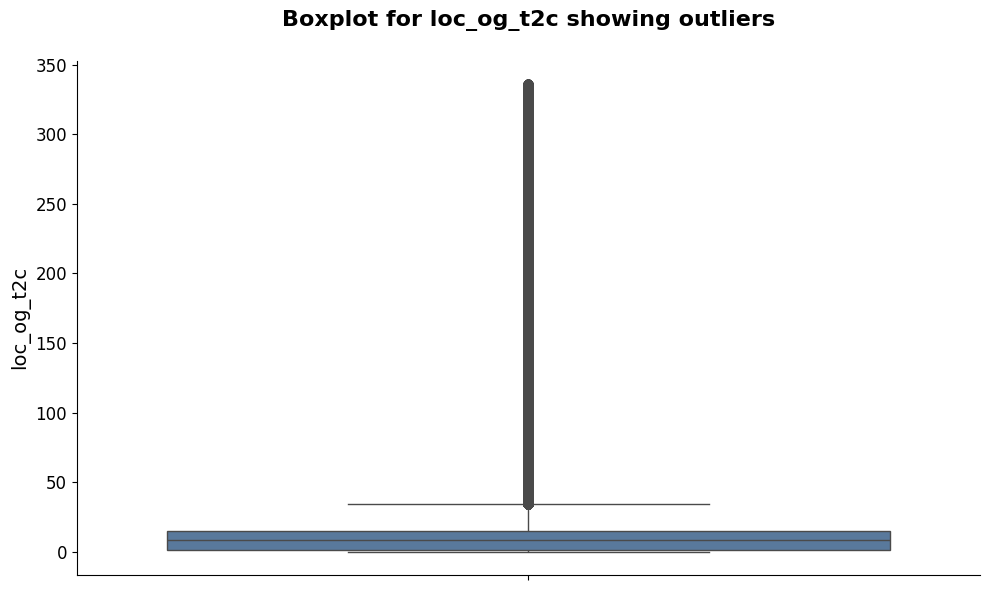

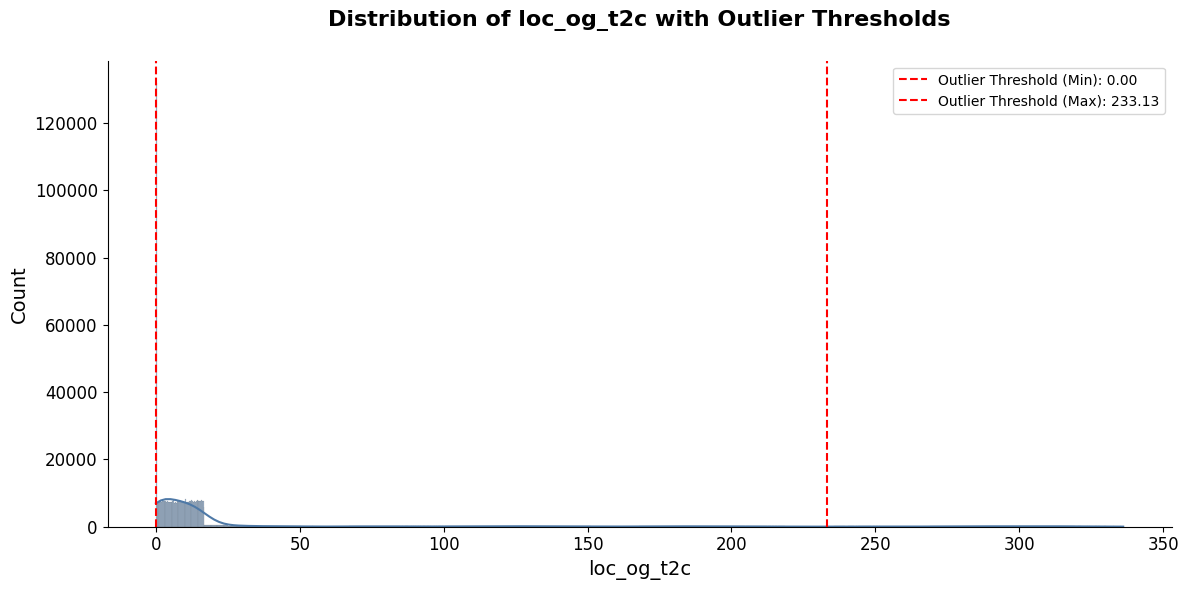

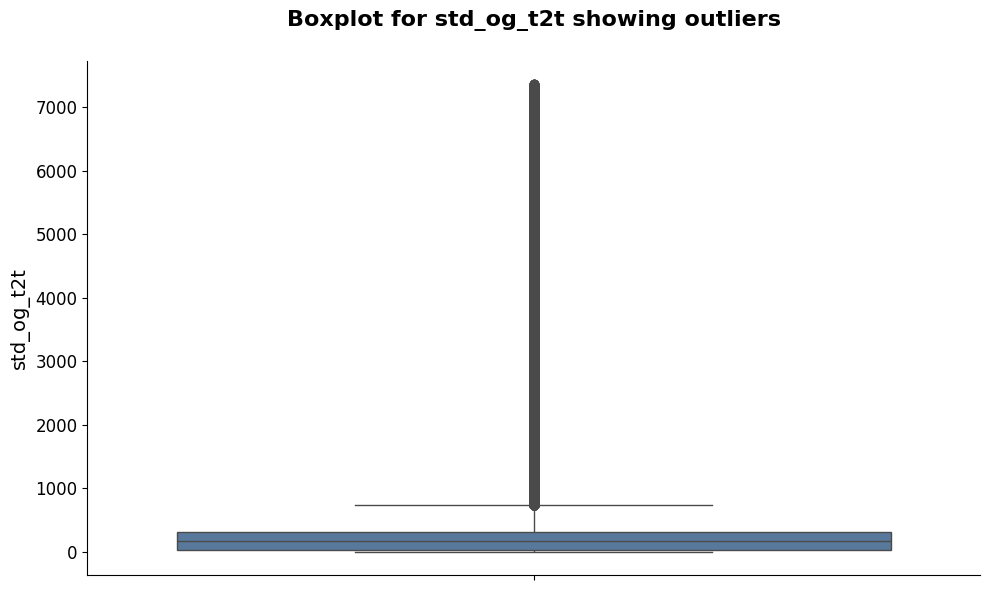

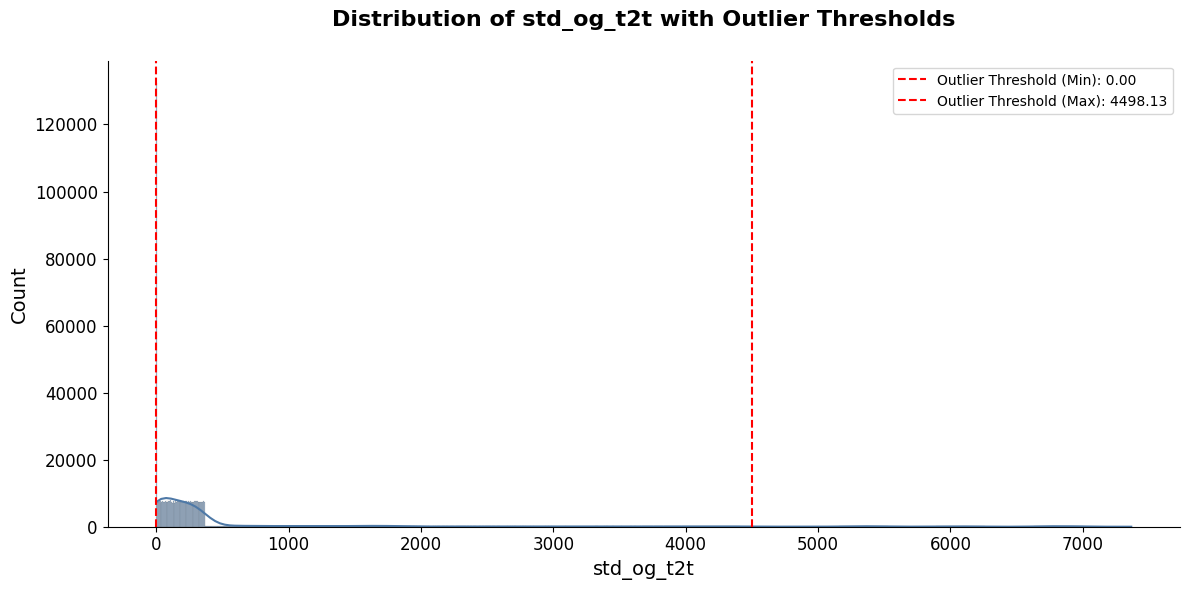

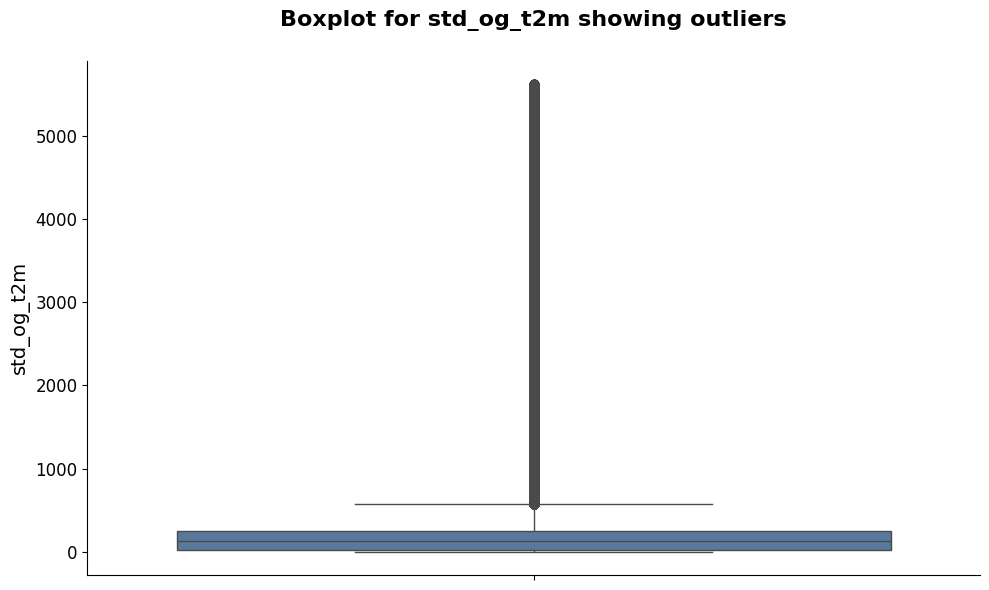

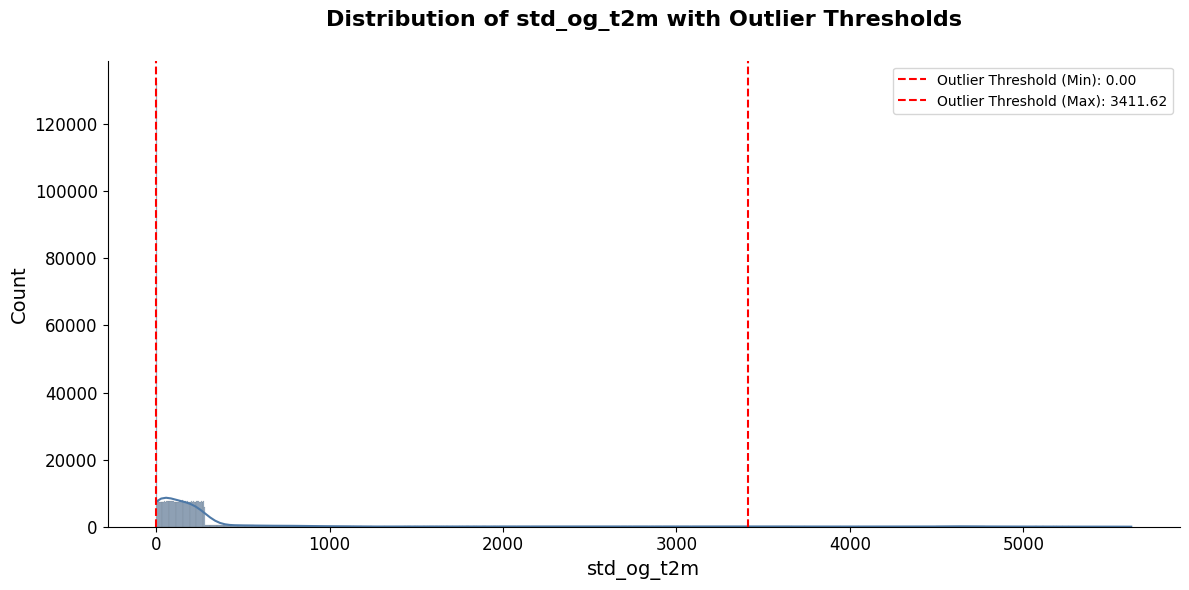

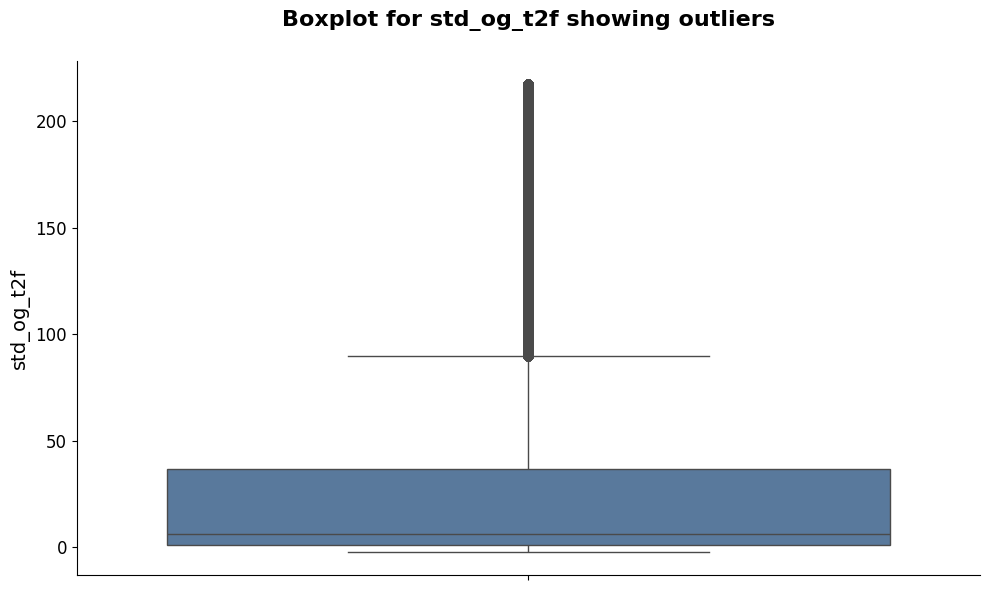

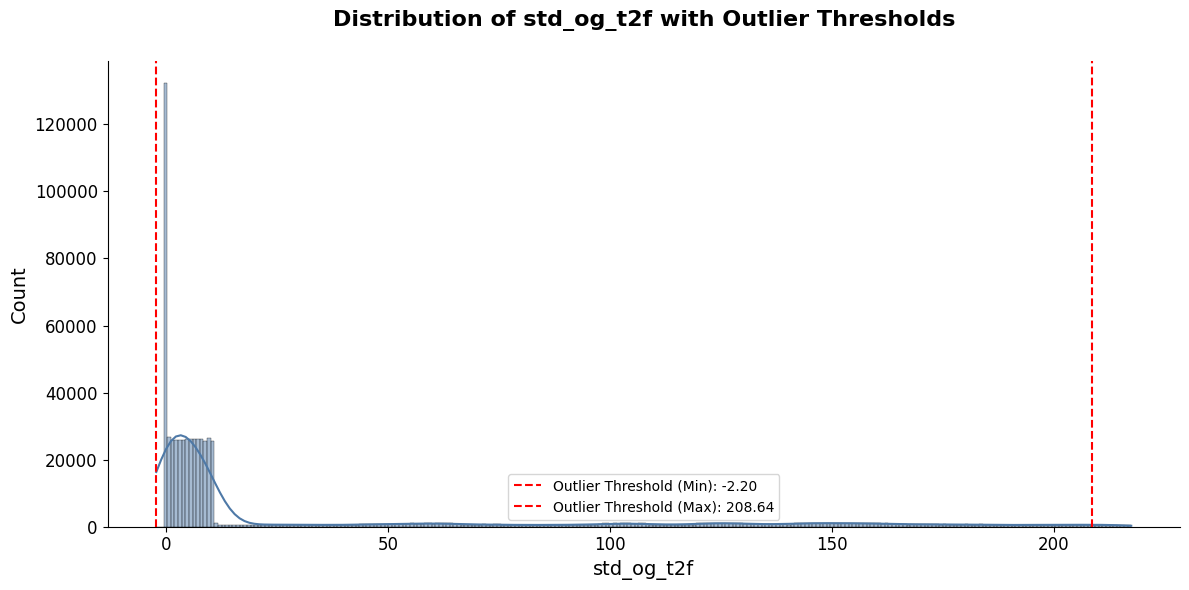

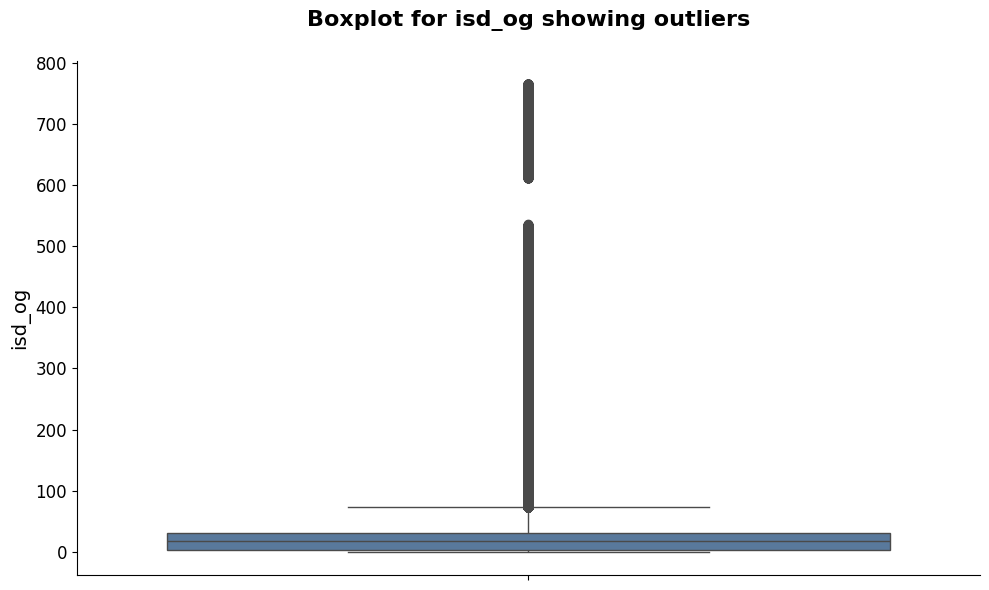

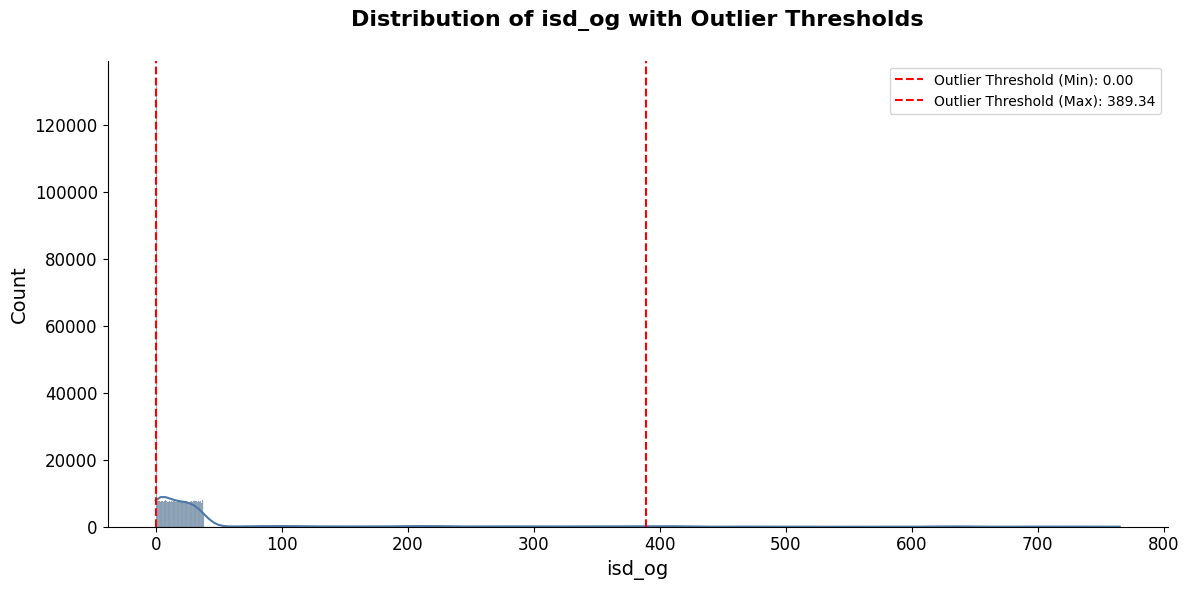

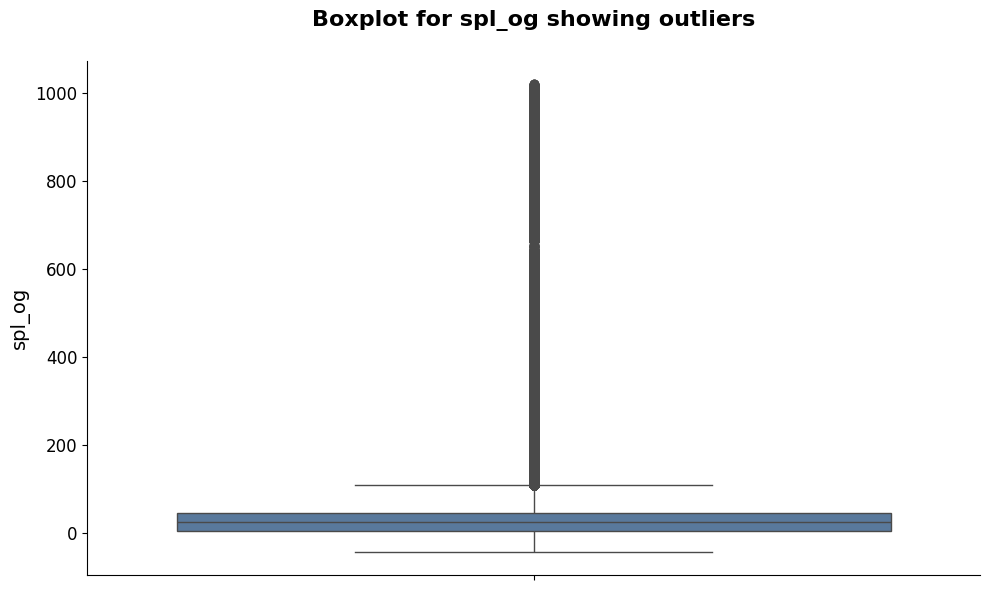

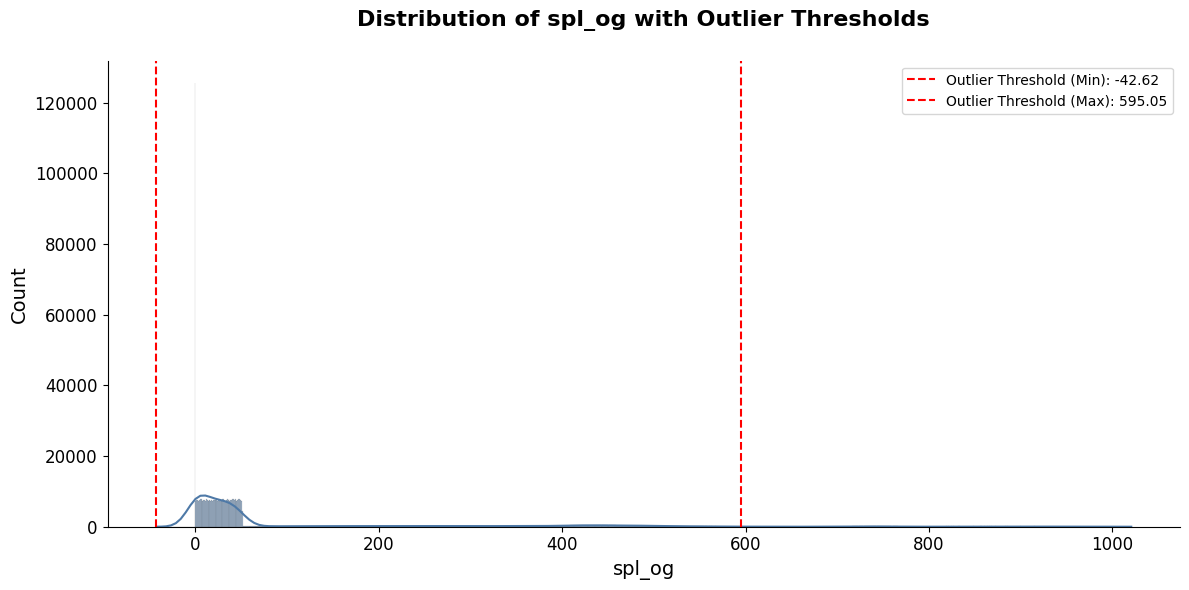

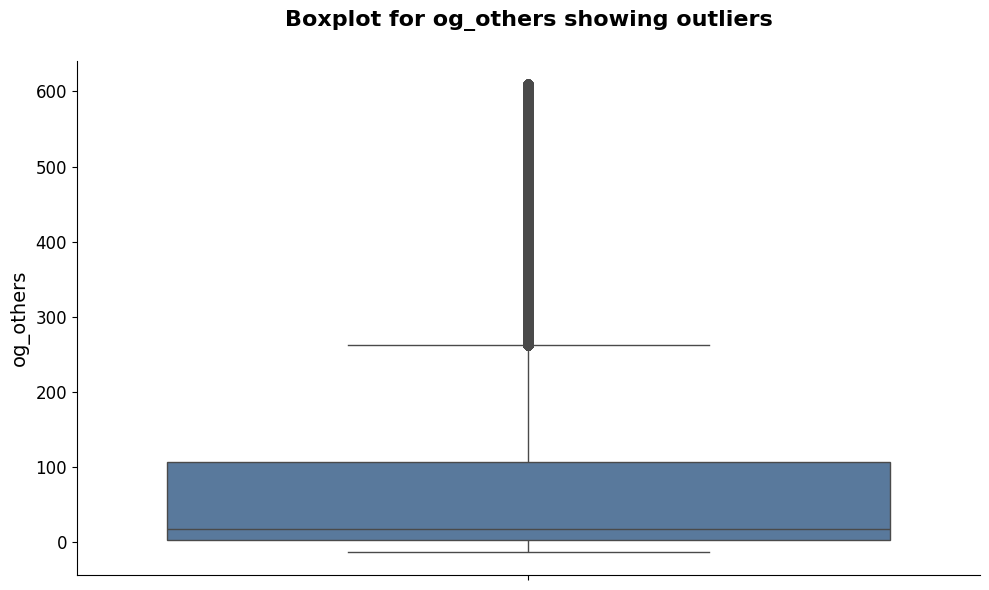

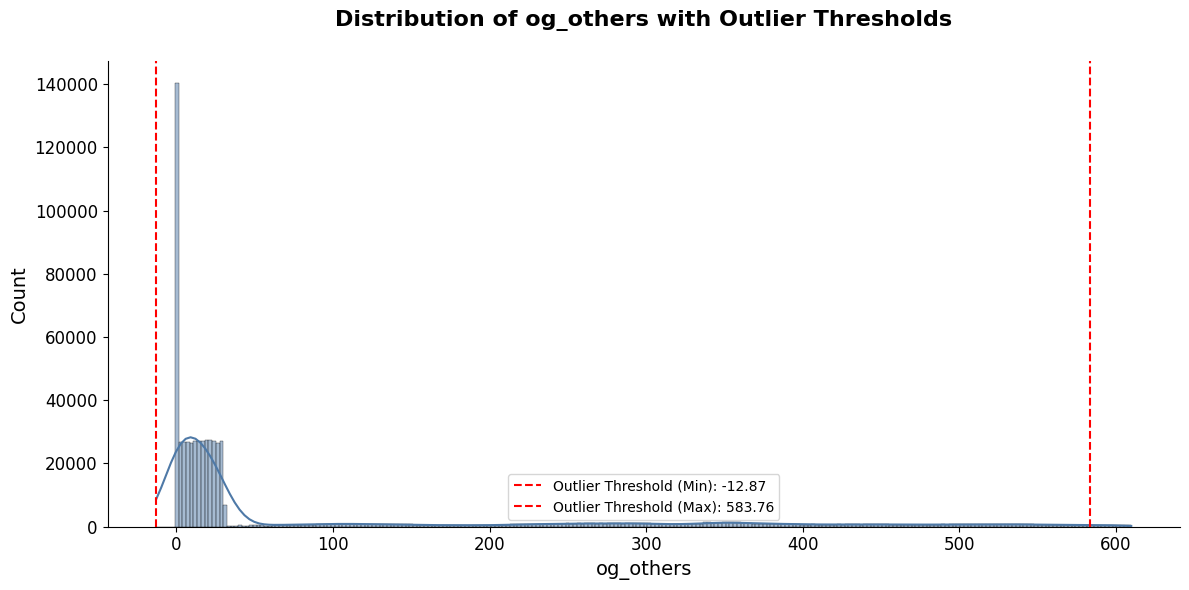

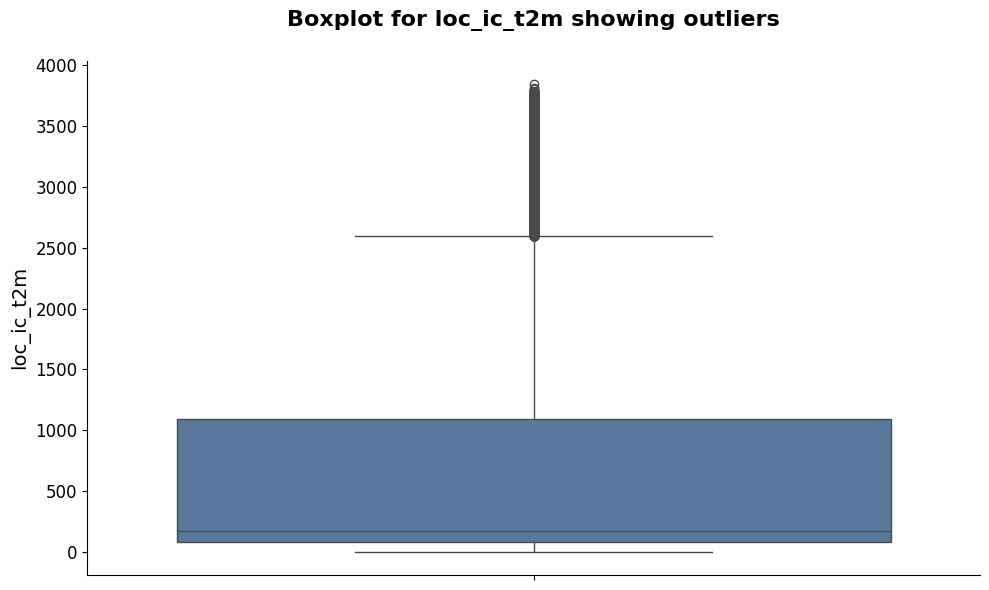

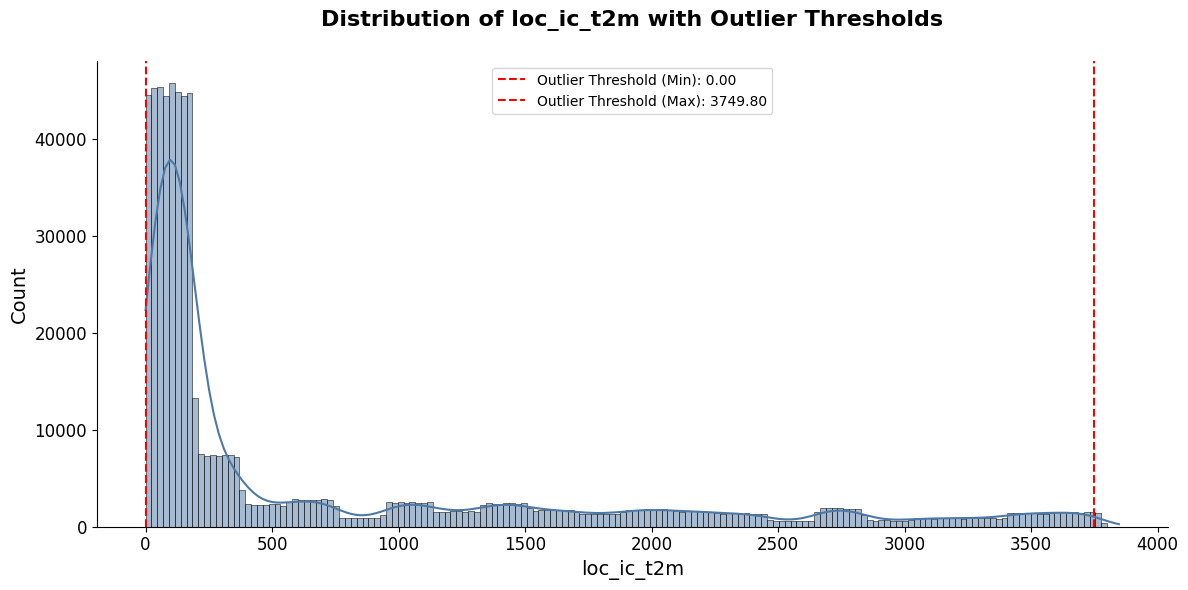

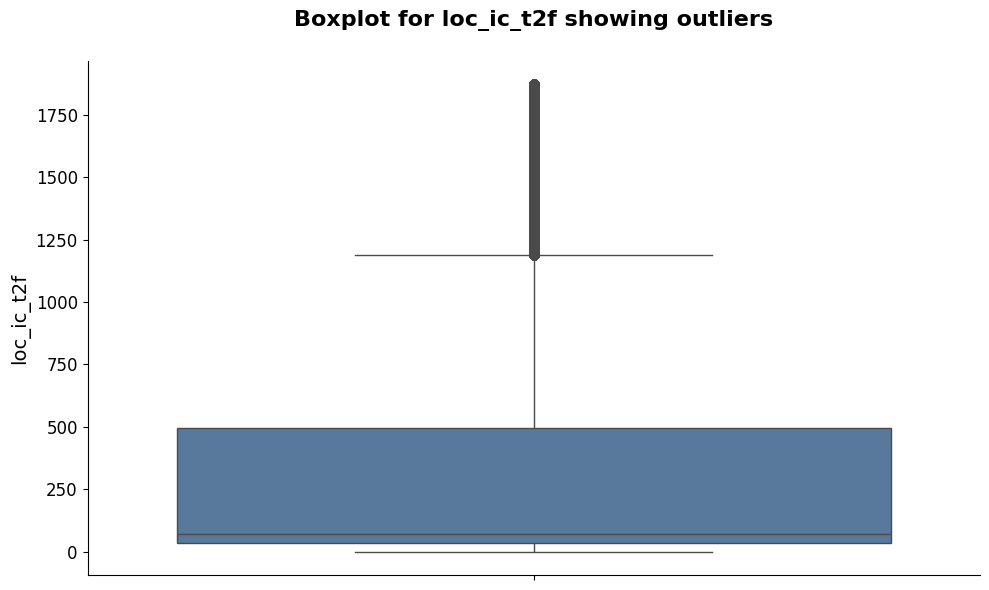

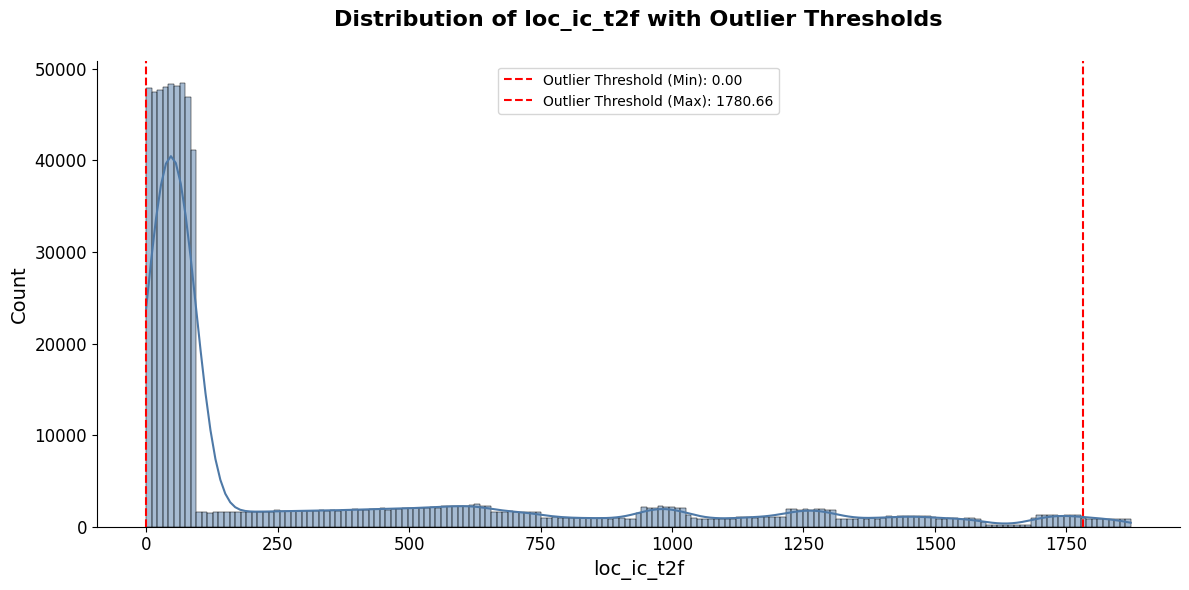

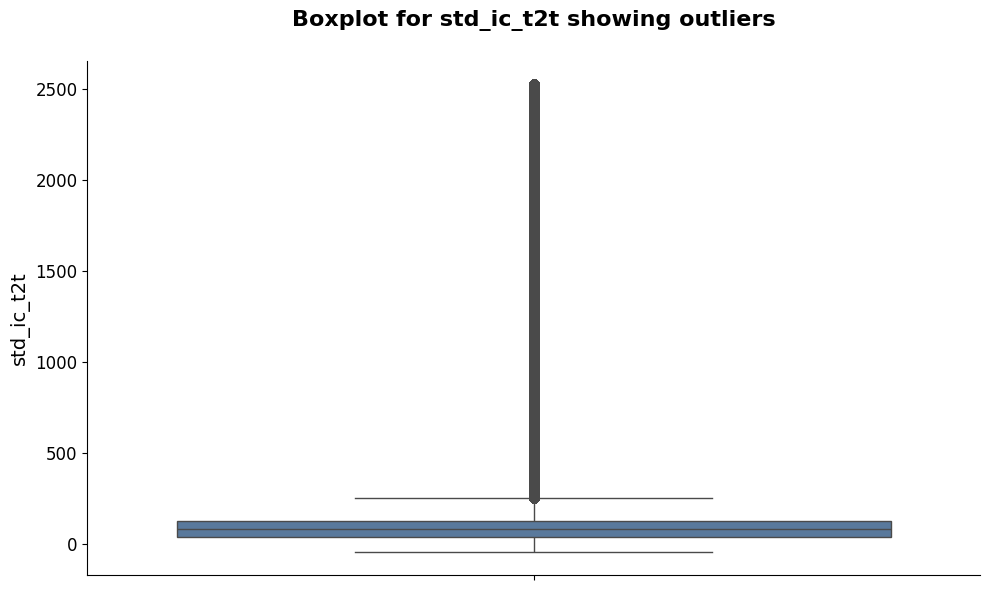

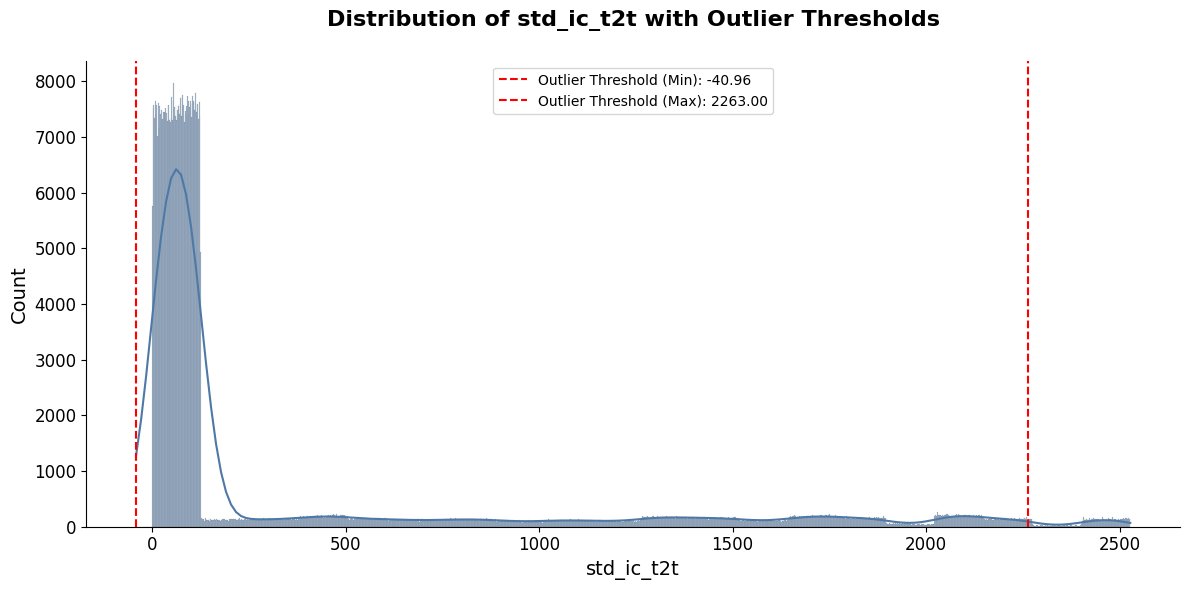

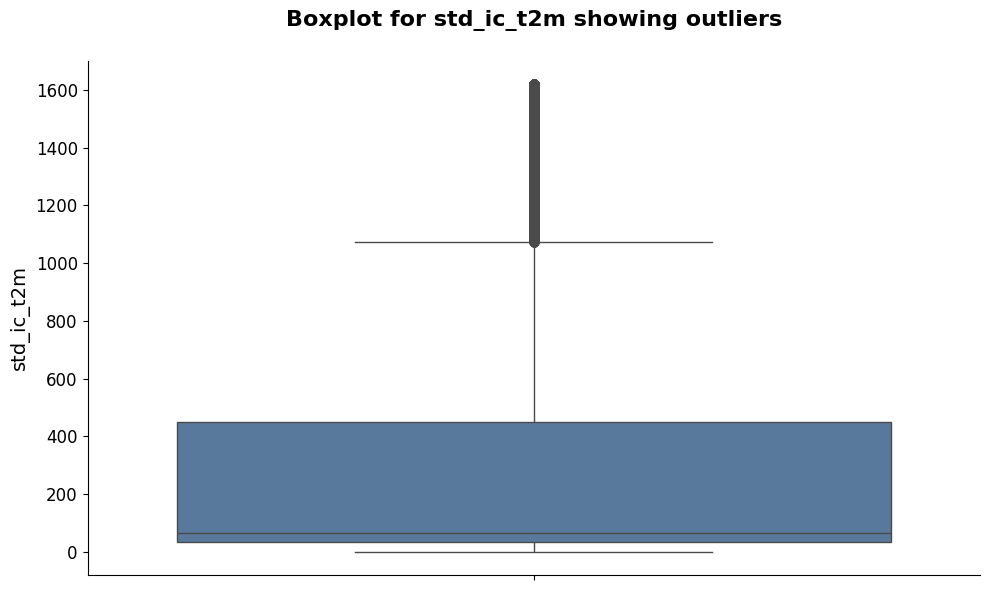

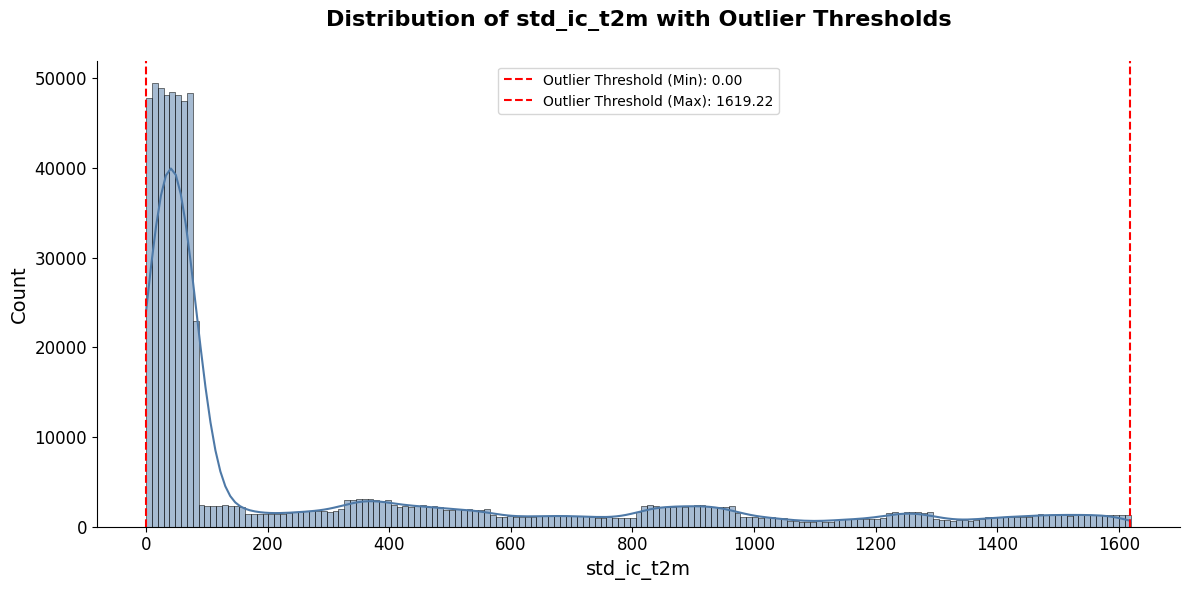

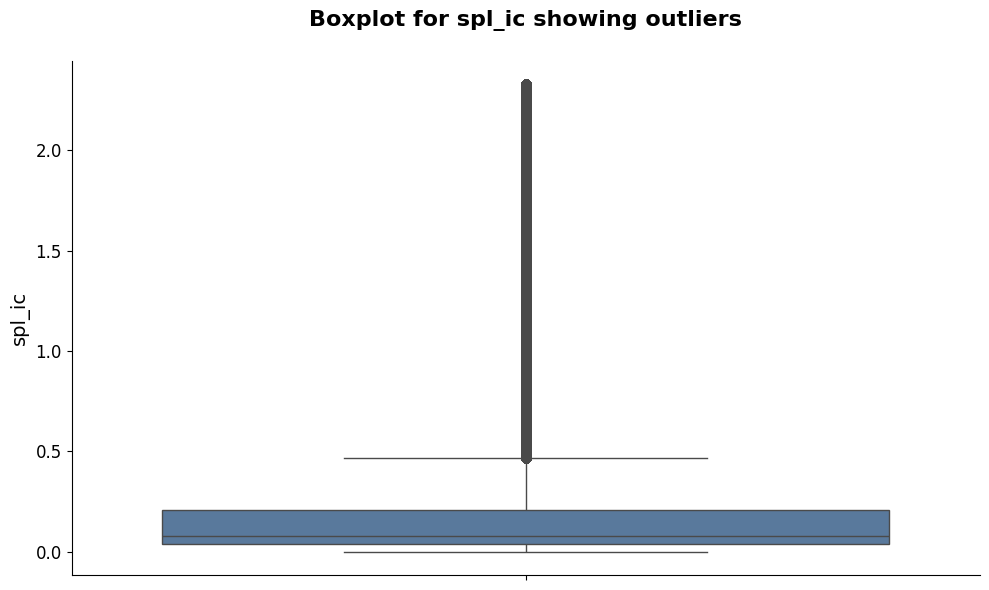

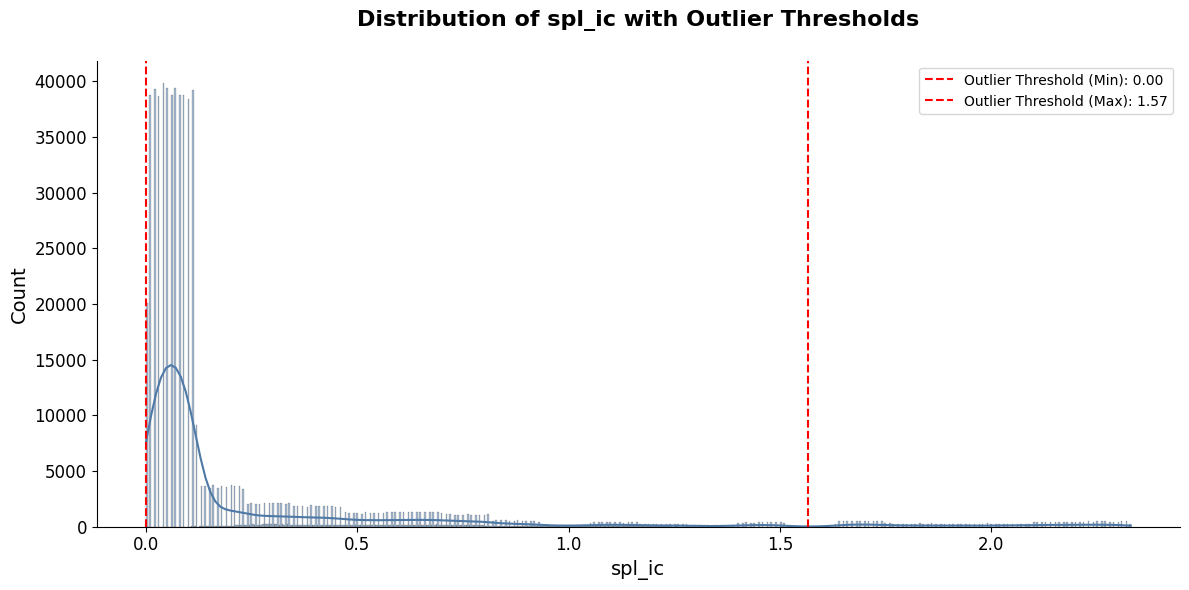

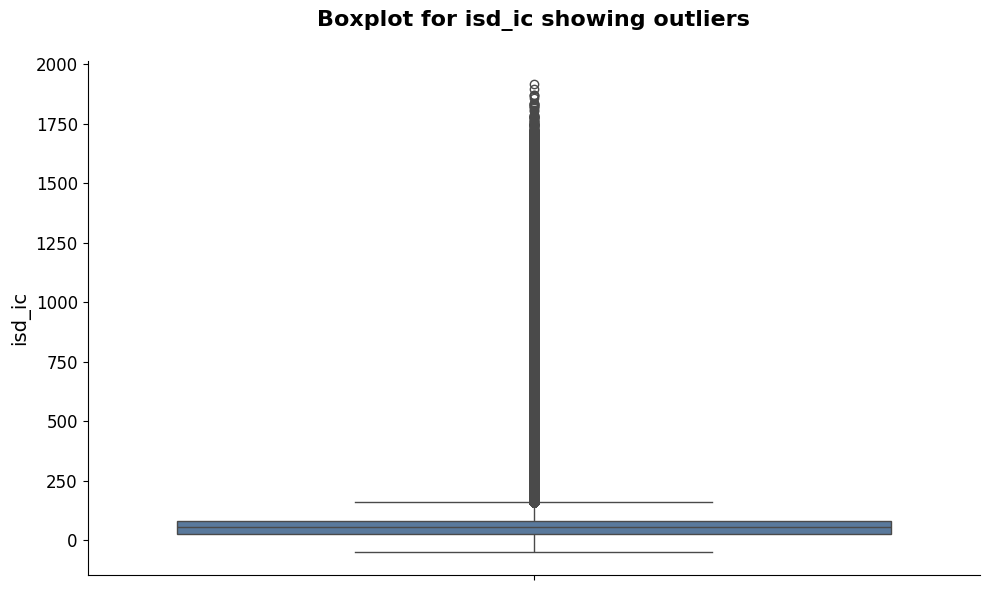

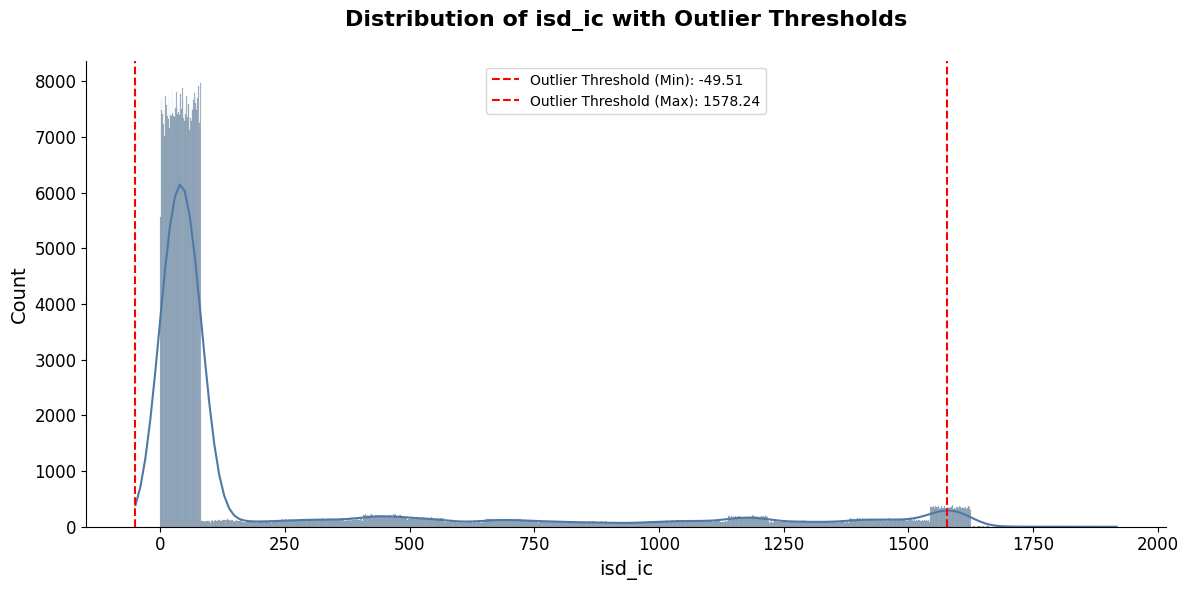

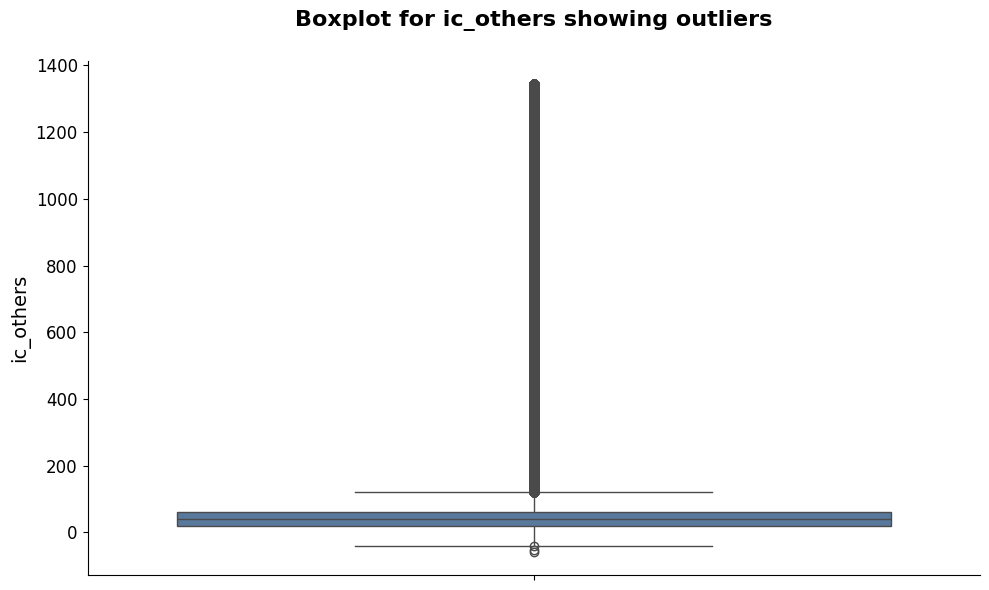

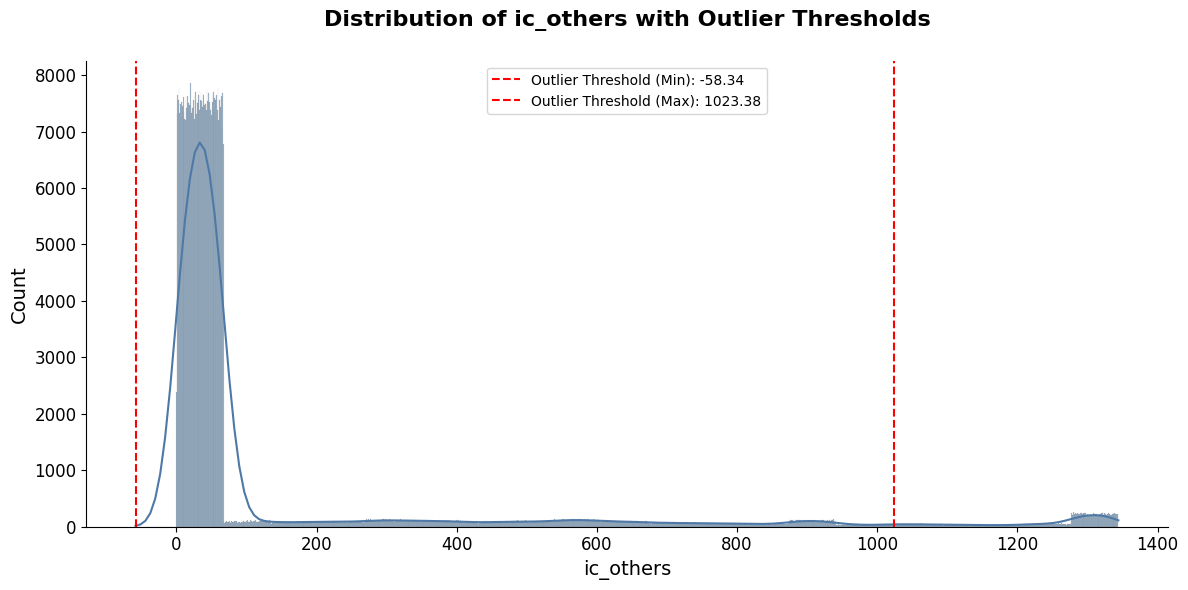

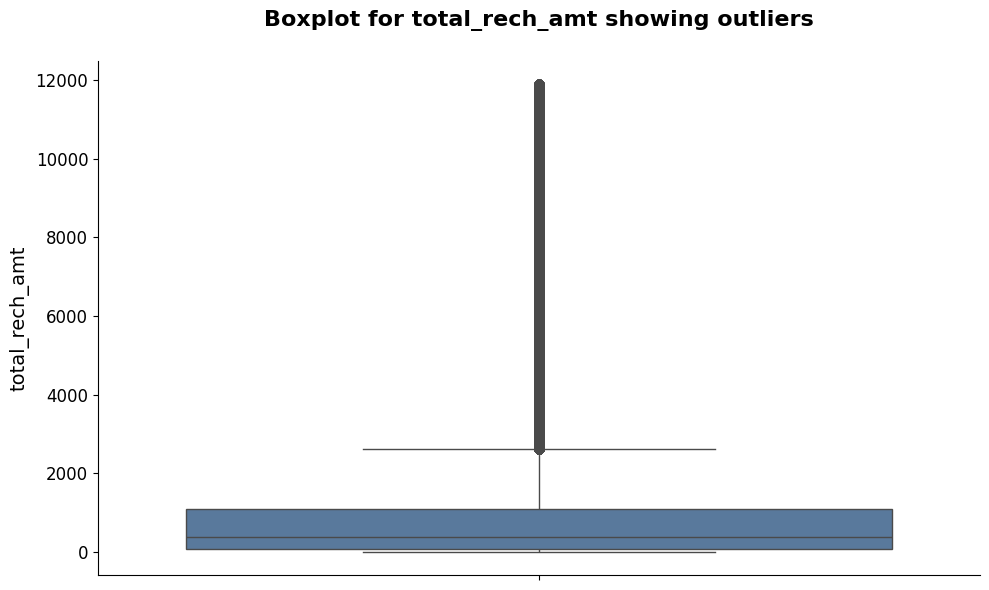

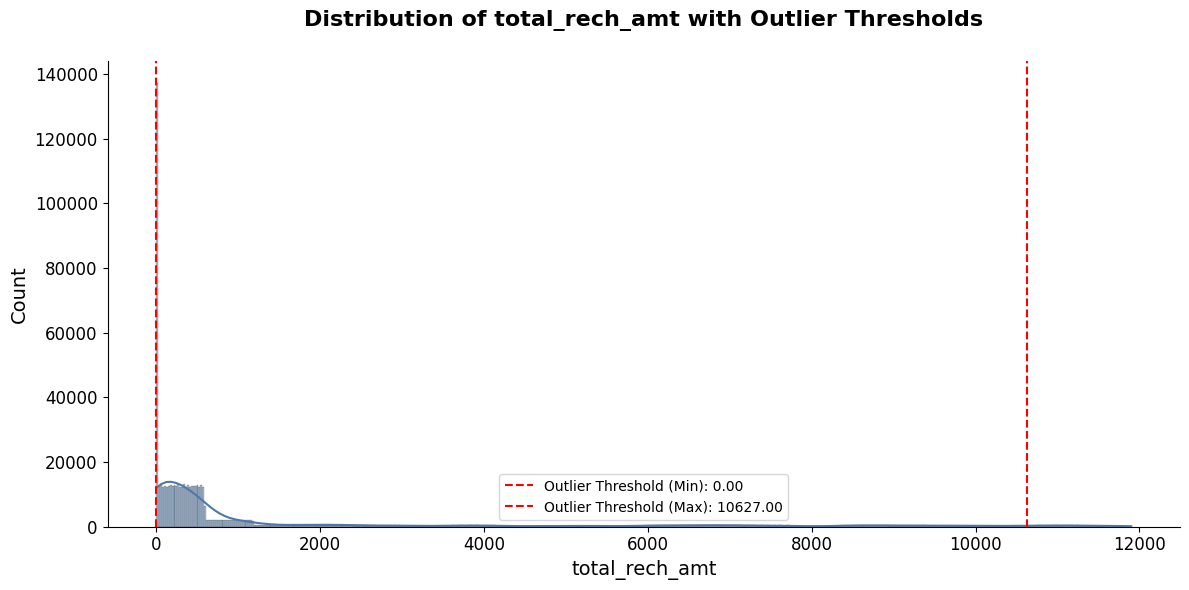

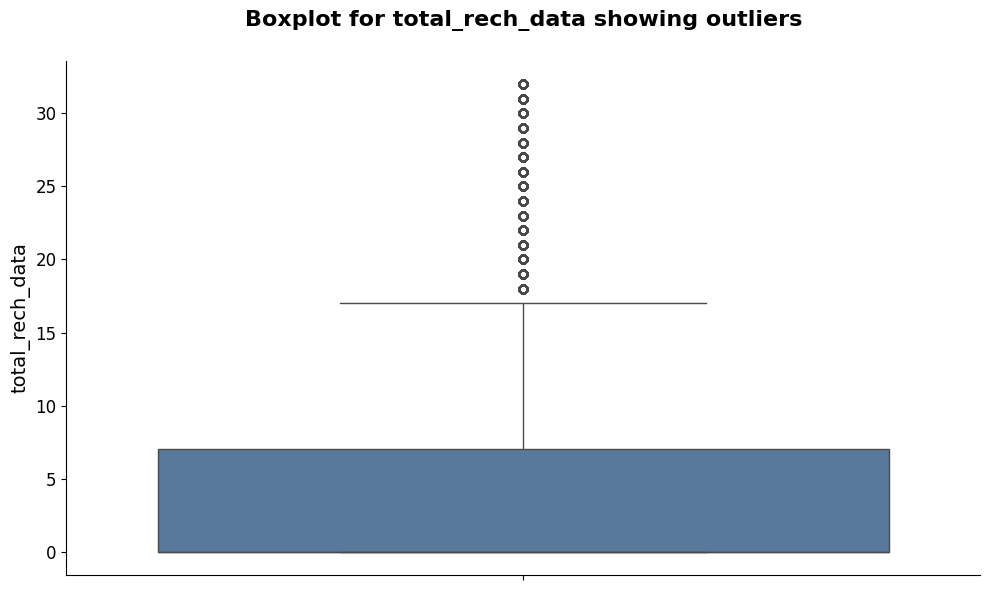

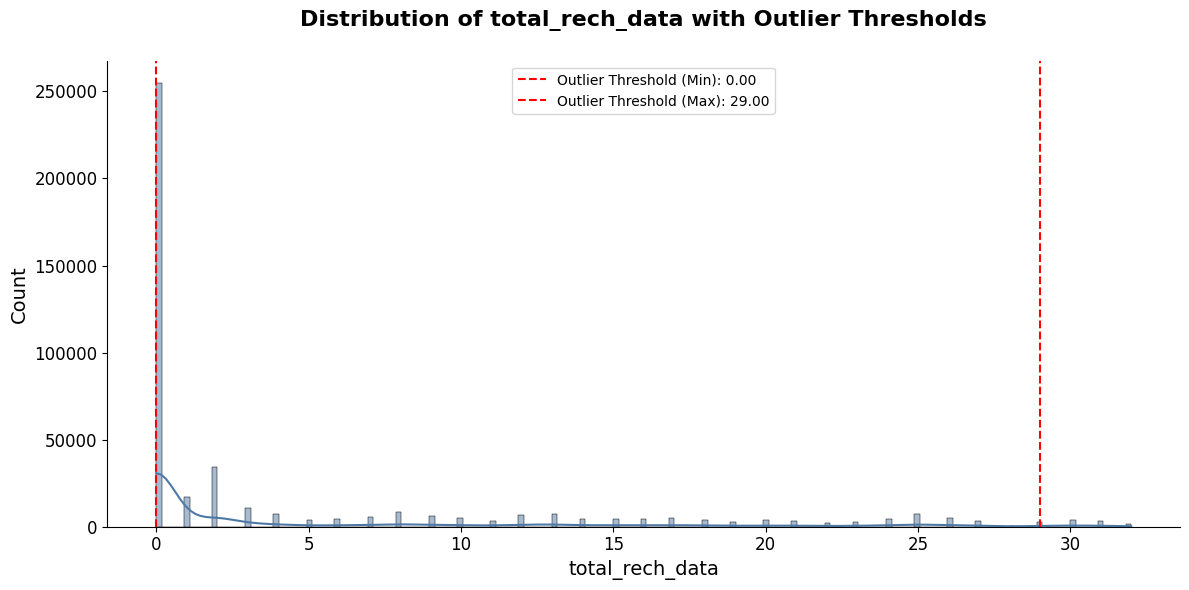

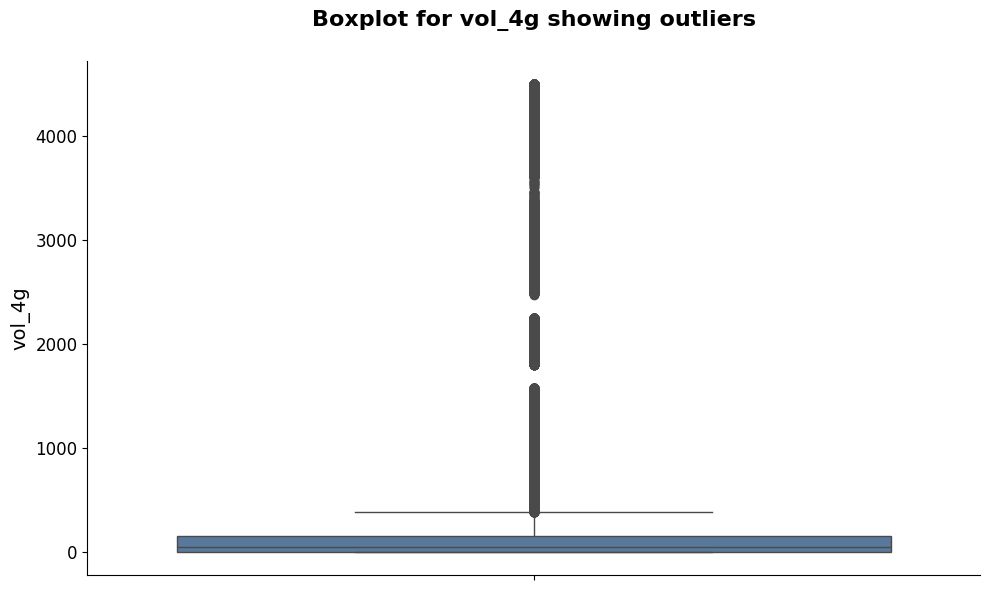

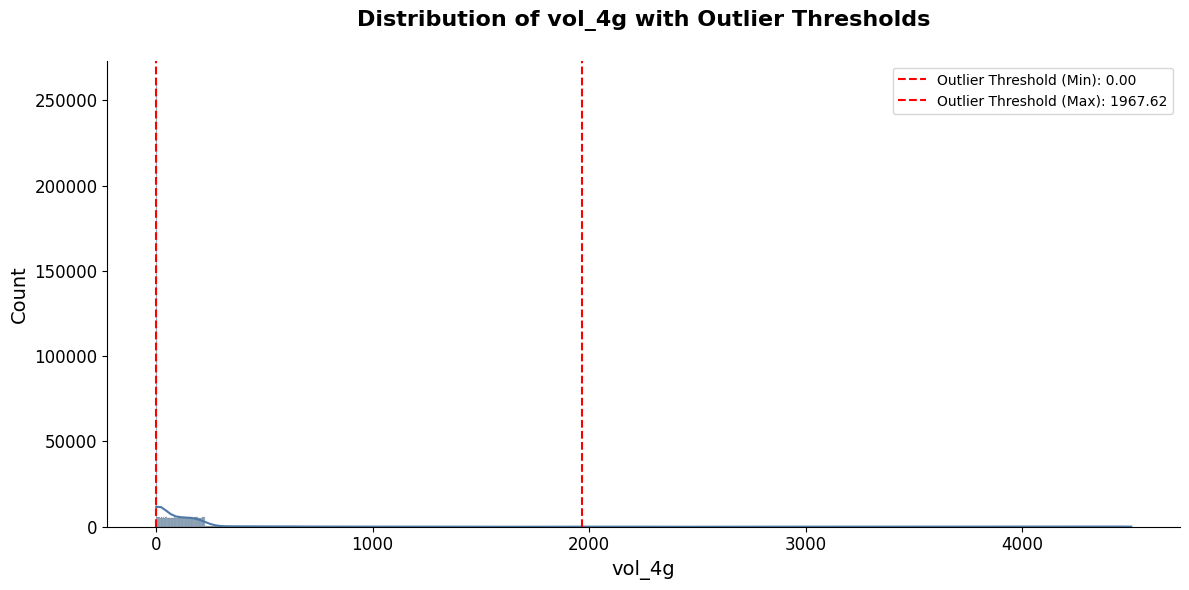

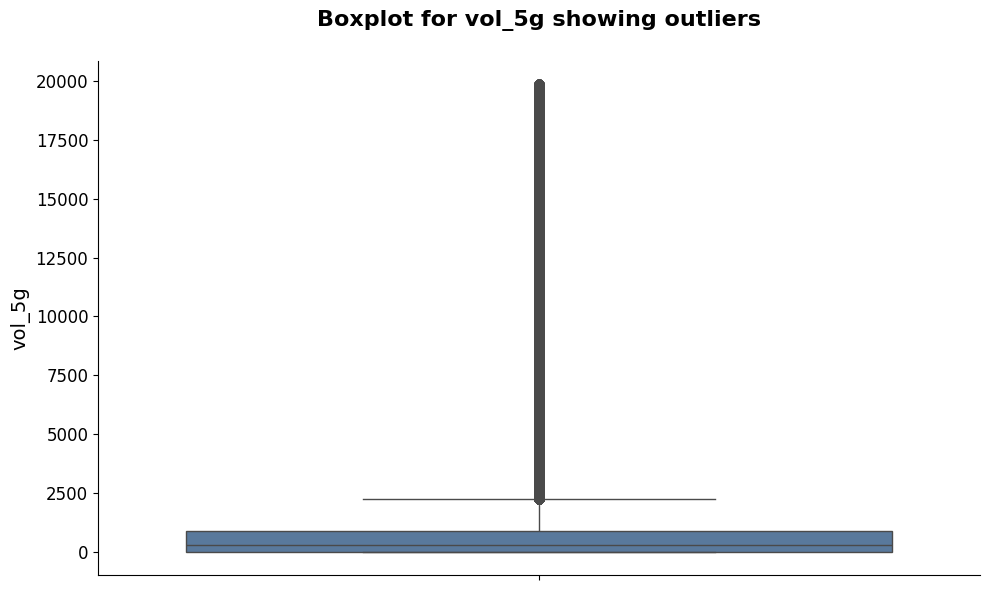

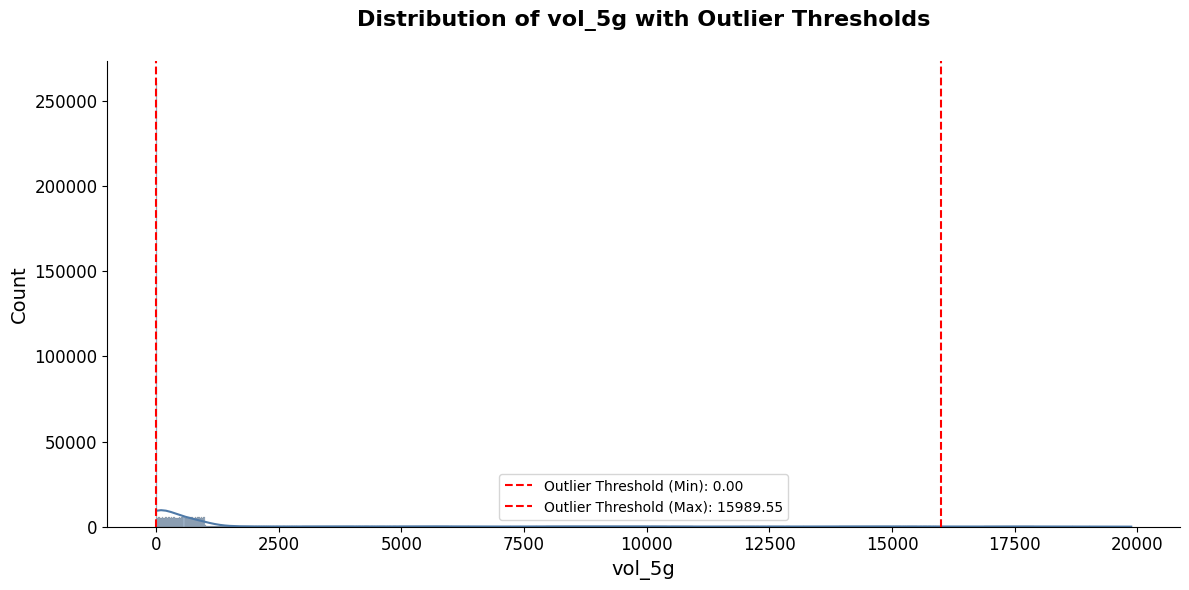

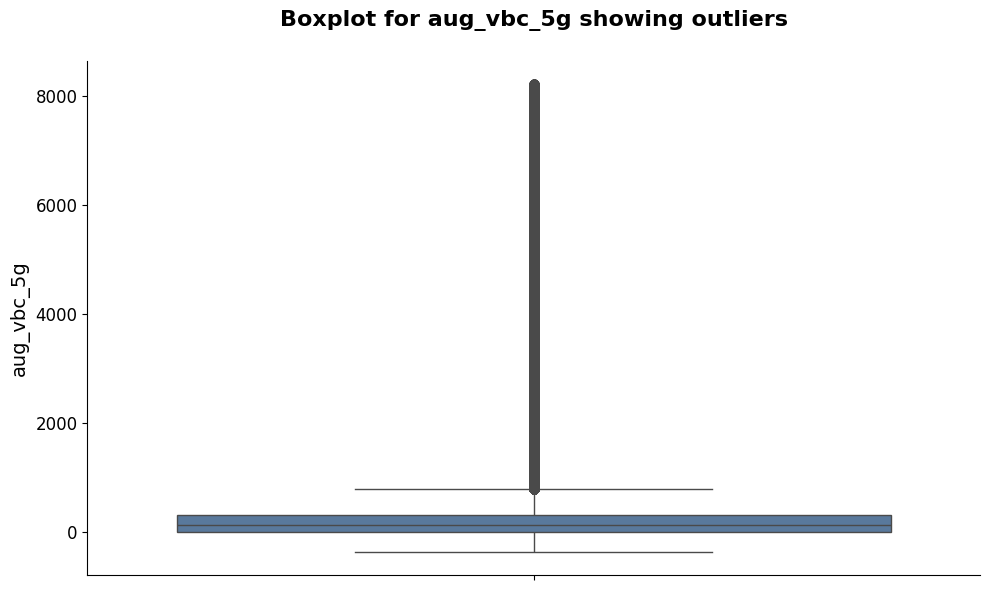

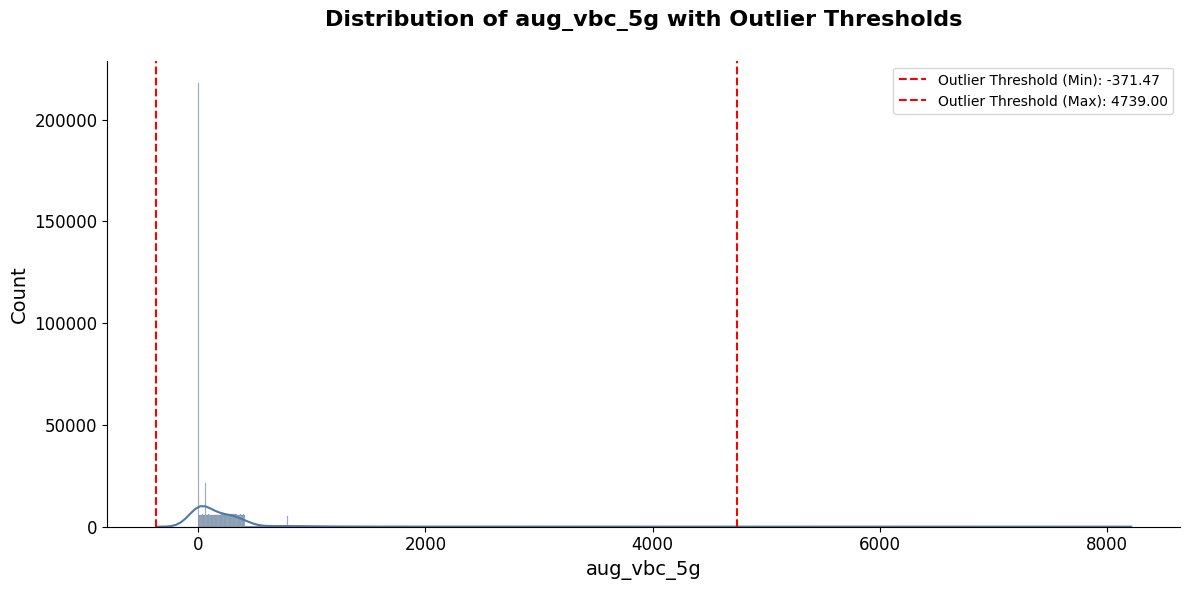

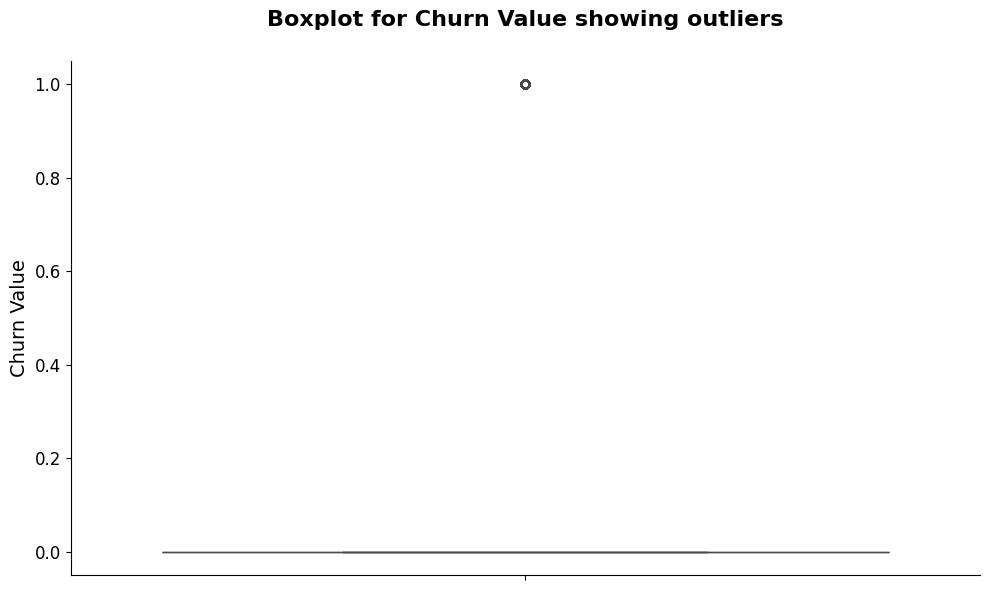

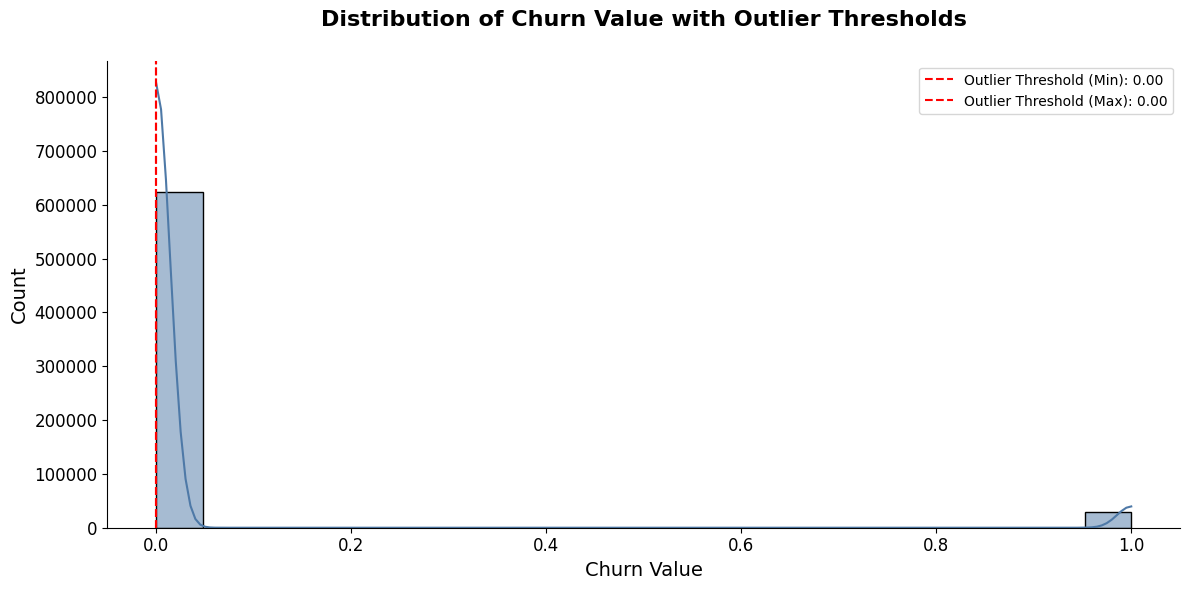

In [ ]:
# 2.2 Outlier Detection
print("\n2.2 Outlier Detection")

# Z-score method for detecting outliers in numeric columns
outliers_summary = {}
for col in numeric_df.columns:
    # First, get the non-null values
    non_null_series = numeric_df[col].dropna()
    
    # Calculate z-scores only on non-null values
    z_scores = np.abs(stats.zscore(non_null_series))
    
    # Count outliers
    outliers_count = (z_scores > 3).sum()
    outliers_pct = (outliers_count / len(non_null_series) * 100).round(2)
    
    if outliers_count > 0:
        # Get the min and max of non-outlier values
        non_outlier_values = non_null_series[z_scores <= 3]
        
        outliers_summary[col] = {
            'outliers_count': outliers_count,
            'outliers_pct': outliers_pct,
            'min_non_outlier': non_outlier_values.min(),
            'max_non_outlier': non_outlier_values.max()
        }

if outliers_summary:
    print("Potential outliers detected using Z-scores (|z| > 3):")
    for col, stats_dict in outliers_summary.items():
        print(f"{col}: {stats_dict['outliers_count']} outliers ({stats_dict['outliers_pct']}%)")
        print(f"  Non-outlier range: {stats_dict['min_non_outlier']} to {stats_dict['max_non_outlier']}")
        
        # Visualize outliers with boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot for {col} showing outliers')
        plt.tight_layout()
        plt.savefig(f'outliers_{col}_boxplot.png')
        
        # Histogram with outlier thresholds
        plt.figure(figsize=(12, 6))
        sns.histplot(df[col], kde=True)
        plt.axvline(x=stats_dict['min_non_outlier'], color='red', linestyle='--', 
                   label=f'Outlier Threshold (Min): {stats_dict["min_non_outlier"]:.2f}')
        plt.axvline(x=stats_dict['max_non_outlier'], color='red', linestyle='--',
                   label=f'Outlier Threshold (Max): {stats_dict["max_non_outlier"]:.2f}')
        plt.title(f'Distribution of {col} with Outlier Thresholds')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'outliers_{col}_histogram.png')
else:
    print("No significant outliers detected in the numeric columns.")

In [ ]:
# 2.3 Inconsistencies and Errors
print("\n2.3 Inconsistencies and Errors")

# Check for inconsistent text case in categorical variables
print("\nInconsistent text case or formatting:")
inconsistencies = {}

for col in cat_df.columns:
    # Group similar values (considering case differences)
    value_groups = {}
    for val in df[col].dropna().unique():
        lower_val = str(val).lower().strip()
        if lower_val in value_groups:
            value_groups[lower_val].append(val)
        else:
            value_groups[lower_val] = [val]
    
    # Filter groups with inconsistencies
    inconsistent_groups = {k: v for k, v in value_groups.items() if len(v) > 1}
    
    if inconsistent_groups:
        inconsistencies[col] = inconsistent_groups
        print(f"\n{col} has inconsistent values:")
        for base, variants in inconsistent_groups.items():
            print(f"  Base '{base}' has variants: {variants}")
            for variant in variants:
                print(f"    '{variant}' appears {df[col].value_counts()[variant]} times")

if not inconsistencies:
    print("No significant inconsistencies found in categorical variables.")


2.3 Inconsistencies and Errors

Inconsistent text case or formatting:

county has inconsistent values:
  Base 'mckinley county' has variants: ['McKinley County', 'Mckinley County']
    'McKinley County' appears 3083 times
    'Mckinley County' appears 200 times


In [ ]:
# Check for logical inconsistencies
if 'Married' in df.columns and 'Number of Dependents' in df.columns:
    married_no_with_dependents = ((df['Married'] == 'No') & (df['Number of Dependents'] > 0)).sum()
    if married_no_with_dependents > 0:
        print(f"\nLogical inconsistency: {married_no_with_dependents} customers marked as not married but have dependents.")

# Date consistency checks (if dates are available)
date_columns = []
if 'Month' in df.columns and 'Month of Joining' in df.columns:
    date_columns = ['Month', 'Month of Joining']
    
    # Convert to datetime for comparison (assuming proper format)
    try:
        for col in date_columns:
            if df[col].dtype == 'object':
                df[col] = pd.to_datetime(df[col], errors='coerce')
        
        # Check if current month is before joining month
        invalid_dates = (df['Month'] < df['Month of Joining']).sum()
        if invalid_dates > 0:
            print(f"\nDate inconsistency: {invalid_dates} records have current month before joining month.")
    except:
        print("\nCouldn't convert date columns for consistency check.")


Logical inconsistency: 90472 customers marked as not married but have dependents.


In [ ]:
# 2.4 Duplicated Records
print("\n2.4 Duplicated Records")

# Check for exact duplicates
exact_dupes = df.duplicated().sum()
print(f"Exact duplicate rows: {exact_dupes} ({exact_dupes/len(df)*100:.2f}% of dataset)")

if exact_dupes > 0:
    # Show examples of duplicates
    print("\nExample of duplicate records:")
    dupes_df = df[df.duplicated(keep='first')]
    print(dupes_df.head(3) if len(dupes_df) >= 3 else dupes_df)

# Check for potential customer ID duplicates
if 'Customer ID' in df.columns:
    customer_id_dupes = df['Customer ID'].duplicated().sum()
    print(f"Duplicate Customer IDs: {customer_id_dupes} ({customer_id_dupes/len(df)*100:.2f}% of dataset)")
    
    if customer_id_dupes > 0:
        print("\nCustomer IDs with multiple records:")
        dup_customers = df['Customer ID'].value_counts()[df['Customer ID'].value_counts() > 1]
        dup_customers.head()


2.4 Duplicated Records
Exact duplicate rows: 0 (0.00% of dataset)
Duplicate Customer IDs: 555523 (84.97% of dataset)

Customer IDs with multiple records:


In [ ]:
#---------------------------------------------------------------
# STEP 3: CREATE A DATA QUALITY REPORT
#---------------------------------------------------------------
print("\n\n3. DATA QUALITY REPORT\n" + "-" * 30)

# Overall data quality summary
total_records = len(df)
total_fields = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
missing_rate = total_missing / total_fields * 100

# Prepare the report
report = {
    'Total Records': total_records,
    'Total Fields': total_fields,
    'Missing Values': total_missing,
    'Missing Rate': f"{missing_rate:.2f}%",
    'Duplicate Records': exact_dupes,
    'Duplication Rate': f"{exact_dupes/total_records*100:.2f}%",
    'Columns with Missing Values': len(missing_df),
    'Columns with Outliers': len(outliers_summary),
    'Columns with Inconsistencies': len(inconsistencies),
}

# Print the report summary
print("\nData Quality Summary:")
for key, value in report.items():
    print(f"{key}: {value}")

# Critical issues section
print("\nCritical Issues Requiring Attention:")

critical_issues = []

# 1. High missing values
high_missing = missing_df[missing_df['missing_pct'] > 10]
if not high_missing.empty:
    critical_issues.append(f"- {len(high_missing)} columns have >10% missing values: {', '.join(high_missing.index)}")

# 2. Critical outliers
critical_outliers = {k: v for k, v in outliers_summary.items() if v['outliers_pct'] > 5}
if critical_outliers:
    critical_issues.append(f"- {len(critical_outliers)} columns have >5% outliers: {', '.join(critical_outliers.keys())}")

# 3. Inconsistencies
if inconsistencies:
    critical_issues.append(f"- {len(inconsistencies)} columns have inconsistent values: {', '.join(inconsistencies.keys())}")

# 4. Duplicates
if exact_dupes > total_records * 0.01:  # More than 1% duplicates
    critical_issues.append(f"- High duplication rate: {exact_dupes} duplicate records ({exact_dupes/total_records*100:.2f}%)")

if customer_id_dupes > 0:
    critical_issues.append(f"- {customer_id_dupes} duplicate Customer IDs found")

# 5. Logical inconsistencies
if 'Married' in df.columns and 'Number of Dependents' in df.columns:
    if married_no_with_dependents > 0:
        critical_issues.append(f"- Logical inconsistency: {married_no_with_dependents} unmarried customers with dependents")

# Print critical issues
if critical_issues:
    for issue in critical_issues:
        print(issue)
else:
    print("- No critical data quality issues identified.")

# Recommendations section
print("\nRecommendations for Data Cleaning:")



3. DATA QUALITY REPORT
------------------------------

Data Quality Summary:
Total Records: 653753
Total Fields: 48377722
Missing Values: 1381166
Missing Rate: 2.85%
Duplicate Records: 0
Duplication Rate: 0.00%
Columns with Missing Values: 8
Columns with Outliers: 28
Columns with Inconsistencies: 1

Critical Issues Requiring Attention:
- 4 columns have >10% missing values: fb_user, night_pck_user, Internet Type, total_rech_data
- 1 columns have inconsistent values: county
- 555523 duplicate Customer IDs found
- Logical inconsistency: 90472 unmarried customers with dependents

Recommendations for Data Cleaning:


In [ ]:
recommendations = [
    "1. Handle missing values:",
    "   - For columns with <5% missing: Consider imputation with mean/median/mode",
    "   - For columns with >20% missing: Evaluate column importance before deciding to keep or drop",
    
    "2. Address outliers:",
    "   - Validate extreme values through domain knowledge",
    "   - Consider capping/flooring extreme values or using robust statistical methods",
    
    "3. Fix inconsistencies:",
    "   - Standardize categorical values (e.g., 'Male'/'Female' instead of 'M'/'F')",
    "   - Correct logical inconsistencies based on business rules",
    
    "4. Handle duplicates:",
    "   - Remove exact duplicates",
    "   - Investigate and resolve duplicate Customer IDs"
]

for rec in recommendations:
    print(rec)

1. Handle missing values:
   - For columns with <5% missing: Consider imputation with mean/median/mode
   - For columns with >20% missing: Evaluate column importance before deciding to keep or drop
2. Address outliers:
   - Validate extreme values through domain knowledge
   - Consider capping/flooring extreme values or using robust statistical methods
3. Fix inconsistencies:
   - Standardize categorical values (e.g., 'Male'/'Female' instead of 'M'/'F')
   - Correct logical inconsistencies based on business rules
4. Handle duplicates:
   - Remove exact duplicates
   - Investigate and resolve duplicate Customer IDs


In [ ]:
#---------------------------------------------------------------
# STEP 4: DEVELOP DATA QUALITY SCORE METRICS
#---------------------------------------------------------------
print("\n\n4. DATA QUALITY SCORE METRICS\n" + "-" * 30)

# Calculate component scores (0-100 scale, higher is better)

# 1. Completeness score (based on missing values)
completeness_score = 100 - missing_rate

# 2. Uniqueness score (based on duplication)
uniqueness_score = 100 - (exact_dupes / total_records * 100)

# 3. Consistency score (based on inconsistent categories)
consistency_pct = len(inconsistencies) / len(cat_df.columns) * 100 if len(cat_df.columns) > 0 else 0
consistency_score = 100 - consistency_pct

# 4. Validity score (based on outliers)
validity_pct = len(outliers_summary) / len(numeric_df.columns) * 100 if len(numeric_df.columns) > 0 else 0
validity_score = 100 - validity_pct

# 5. Calculate overall data quality score (weighted average)
weights = {
    'completeness': 0.3,
    'uniqueness': 0.2,
    'consistency': 0.2,
    'validity': 0.3
}

overall_score = (
    weights['completeness'] * completeness_score +
    weights['uniqueness'] * uniqueness_score +
    weights['consistency'] * consistency_score +
    weights['validity'] * validity_score
)

# Print score metrics
print("\nData Quality Component Scores (0-100):")
print(f"Completeness Score: {completeness_score:.2f}")
print(f"Uniqueness Score: {uniqueness_score:.2f}")
print(f"Consistency Score: {consistency_score:.2f}")
print(f"Validity Score: {validity_score:.2f}")
print(f"\nOVERALL DATA QUALITY SCORE: {overall_score:.2f}/100")



4. DATA QUALITY SCORE METRICS
------------------------------

Data Quality Component Scores (0-100):
Completeness Score: 97.15
Uniqueness Score: 100.00
Consistency Score: 96.88
Validity Score: 33.33

OVERALL DATA QUALITY SCORE: 78.52/100


In [ ]:
# Score interpretation
print("\nScore Interpretation:")
if overall_score >= 90:
    interpretation = "Excellent data quality, minimal cleaning required."
elif overall_score >= 80:
    interpretation = "Good data quality, some cleaning recommended."
elif overall_score >= 70:
    interpretation = "Moderate data quality, significant cleaning required."
elif overall_score >= 50:
    interpretation = "Poor data quality, extensive cleaning necessary."
else:
    interpretation = "Very poor data quality, consider obtaining better data or expect limited analysis value."

print(interpretation)


Score Interpretation:
Moderate data quality, significant cleaning required.



Data quality assessment complete. Visualizations and report are saved.


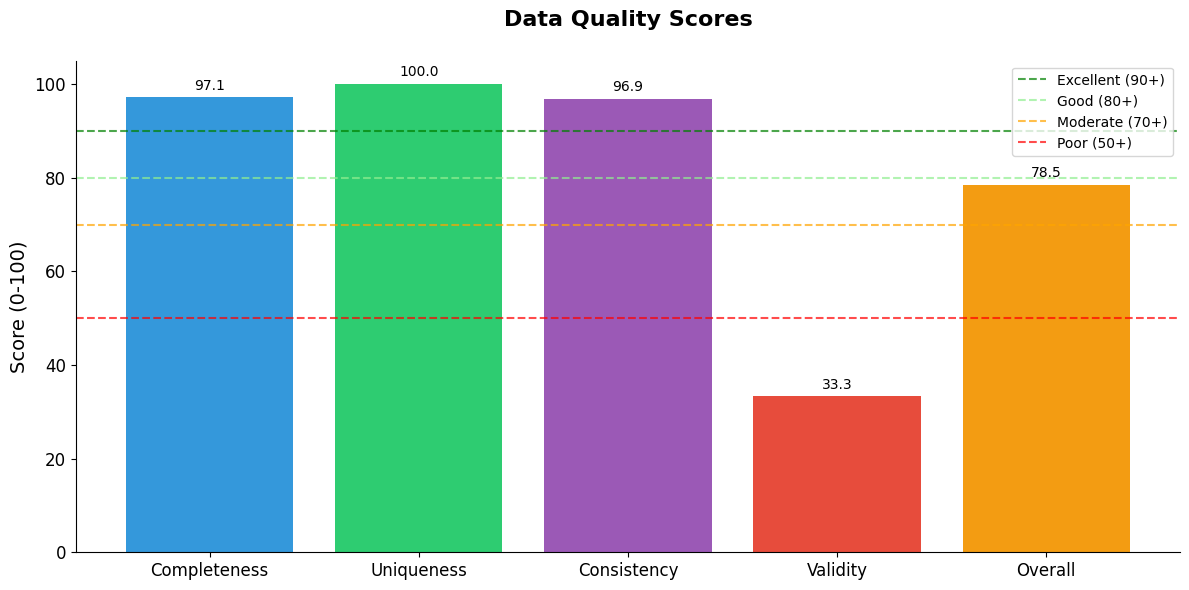

In [ ]:
# Visualize the quality scores
plt.figure(figsize=(12, 6))
scores = [completeness_score, uniqueness_score, consistency_score, validity_score, overall_score]
labels = ['Completeness', 'Uniqueness', 'Consistency', 'Validity', 'Overall']
colors = ['#3498db', '#2ecc71', '#9b59b6', '#e74c3c', '#f39c12']

bars = plt.bar(labels, scores, color=colors)

# Add score labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom')

plt.axhline(y=90, color='green', linestyle='--', alpha=0.7, label='Excellent (90+)')
plt.axhline(y=80, color='lightgreen', linestyle='--', alpha=0.7, label='Good (80+)')
plt.axhline(y=70, color='orange', linestyle='--', alpha=0.7, label='Moderate (70+)')
plt.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='Poor (50+)')

plt.ylim(0, 105)
plt.title('Data Quality Scores', fontsize=16)
plt.ylabel('Score (0-100)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('data_quality_scores.png')

print("\nData quality assessment complete. Visualizations and report are saved.")

In [ ]:
# Step 1: Define our column groups based on previous organization
customer_demographics = ['Customer ID', 'Gender', 'Age', 'Married', 'Dependents', 
                         'Number of Dependents', 'Referred a Friend', 'Number of Referrals', 
                         'Satisfaction Score']

location_info = ['zip_code', 'Location ID', 'state', 'county', 'timezone', 
                'area_codes', 'country', 'latitude', 'longitude']

account_info = ['Month', 'Month of Joining', 'Service ID', 'Customer Status', 
               'Status ID', 'offer']

service_subscriptions = ['Phone Service', 'Multiple Lines', 'Internet Service', 
                        'Internet Type', 'Online Security', 'Online Backup', 
                        'Device Protection Plan', 'Premium Tech Support', 
                        'Streaming TV', 'Streaming Movies', 'Streaming Music', 
                        'Unlimited Data', 'night_pck_user', 'fb_user']

voice_usage = ['outgoing_calls', 'loc_og_t2t', 'loc_og_t2m', 'loc_og_t2f', 
              'loc_og_t2c', 'std_og_t2t', 'std_og_t2m', 'std_og_t2f', 
              'std_og_t2c', 'isd_og', 'spl_og', 'og_others', 'loc_ic_t2t', 
              'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m', 
              'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others', 
              'roam_ic', 'roam_og']

data_usage = ['data_usage', 'vol_4g', 'vol_5g', 'Streaming Data Consumption', 
             'total_rech_data', 'aug_vbc_5g']

revenue_metrics = ['arpu', 'arpu_4g', 'arpu_5g', 'total_arpu', 'total_rech_amt', 
                  'Payment Method']

churn_info = ['Churn Value', 'Churn Category', 'Churn Reason']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer ID                 653753 non-null  object 
 1   Month                       653753 non-null  int64  
 2   Month of Joining            653753 non-null  float64
 3   zip_code                    653753 non-null  int64  
 4   Gender                      653753 non-null  object 
 5   Age                         653753 non-null  float64
 6   Married                     653753 non-null  object 
 7   Dependents                  653753 non-null  object 
 8   Number of Dependents        648808 non-null  float64
 9   Location ID                 653753 non-null  object 
 10  Service ID                  653753 non-null  object 
 11  state                       653753 non-null  object 
 12  county                      653753 non-null  object 
 13  timezone      

In [ ]:
# # Introduce some df quality issues for demonstration
# # Missing values
# for col in ['Age', 'Number of Dependents', 'arpu', 'df_usage']:
#     missing_indices = np.random.choice(df, size=int(df * 0.05), replace=False)
#     df[col] = pd.Series(df[col])
#     df[col].iloc[missing_indices] = np.nan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# Store a copy of the original data for comparison
df_original = df.copy()

##############################################################################
#                  1. HANDLE MISSING VALUES
##############################################################################
print("\n" + "="*50)
print("1. HANDLING MISSING VALUES")
print("="*50)

# First, analyze missing values in detail
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                           'Percentage': missing_pct})
print("\nMissing value analysis:")
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))

# 1.1 Handle missing values in numeric columns
print("\n1.1 Handling missing numeric values")

# Group numeric columns by type for appropriate imputation
demographic_nums = ['Age', 'Number of Dependents', 'Satisfaction Score']
usage_metrics = ['arpu', 'roam_ic', 'roam_og', 'loc_og_t2t', 'loc_og_t2m', 
                'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
                'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
                'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 
                'std_ic_t2m', 'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 
                'ic_others', 'total_rech_amt', 'total_rech_data', 'vol_4g', 
                'vol_5g', 'arpu_5g', 'arpu_4g', 'Streaming Data Consumption']
location_metrics = ['latitude', 'longitude']

# Identify numeric columns with missing values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols_with_missing = numeric_cols[df[numeric_cols].isnull().any()]

print(f"Numeric columns with missing values: {list(numeric_cols_with_missing)}")

for col in numeric_cols_with_missing:
    # Store original missing count for reporting
    missing_count_before = df[col].isnull().sum()
    
    # Skip if no missing values
    if missing_count_before == 0:
        continue
    
    # Check distribution skewness to decide between mean and median
    skewness = df[col].dropna().skew()
    print(f"\nColumn: {col}, Skewness: {skewness:.2f}, Missing: {missing_count_before}")
    
    # Demographic variables - use median for skewed distributions
    if col in demographic_nums:
        if abs(skewness) > 1:  # Highly skewed
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  Imputed with MEDIAN ({median_val:.2f}) - demographic variable with skewed distribution")
        else:
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)
            print(f"  Imputed with MEAN ({mean_val:.2f}) - demographic variable with normal distribution")
    
    # Usage metrics - consider customer segment-based imputation
    elif col in usage_metrics:
        # Group by customer segments if relevant
        if 'Customer Status' in df.columns and df['Customer Status'].nunique() <= 5:
            print(f"  Using segment-based imputation for usage metric {col}")
            
            # Calculate medians by customer segment
            segment_medians = df.groupby('Customer Status')[col].transform('median')
            
            # Where segment median is NA, use overall median
            overall_median = df[col].median()
            df[col].fillna(segment_medians, inplace=True)
            df[col].fillna(overall_median, inplace=True)
            
            # Report how many were filled
            remaining = df[col].isnull().sum()
            print(f"  Imputed {missing_count_before - remaining} values with segment-based median")
            
            # If any still missing, use overall median
            if remaining > 0:
                df[col].fillna(overall_median, inplace=True)
                print(f"  Imputed remaining {remaining} values with overall median ({overall_median:.2f})")
        else:
            # For usage metrics, zero imputation might be appropriate in some cases
            if col.startswith(('vol_', 'total_', 'roam_')):
                print(f"  Imputing with ZERO for usage metric that can legitimately be zero")
                df[col].fillna(0, inplace=True)
            else:
                # Use median for other usage metrics (less sensitive to outliers)
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"  Imputed with MEDIAN ({median_val:.2f}) for usage metric")
    
    # Location coordinates - use KNN imputation if both latitude and longitude are present
    elif col in location_metrics and set(location_metrics).issubset(df.columns):
        if all(m in numeric_cols_with_missing for m in location_metrics):
            print(f"  Location coordinate missing: using KNN imputation for {location_metrics}")
            
            # Get records with at least one valid coordinate
            loc_df = df[location_metrics].copy()
            loc_df['valid'] = loc_df.notna().any(axis=1)
            
            if loc_df['valid'].sum() > 10:  # Need enough samples for KNN
                # Select only records with at least one valid coordinate for training
                train_idx = loc_df['valid']
                
                # Initialize and fit KNN imputer
                imputer = KNNImputer(n_neighbors=5)
                loc_imputed = imputer.fit_transform(df.loc[train_idx, location_metrics])
                
                # Update only the missing values
                for i, coord_col in enumerate(location_metrics):
                    mask = df.loc[train_idx, coord_col].isna()
                    df.loc[train_idx, coord_col] = np.where(mask, loc_imputed[:, i], df.loc[train_idx, coord_col])
                
                # Report how many were filled
                remaining = df[col].isnull().sum()
                print(f"  Imputed {missing_count_before - remaining} values with KNN")
                
                # If any still missing, use median
                if remaining > 0:
                    median_val = df[col].median()
                    df[col].fillna(median_val, inplace=True)
                    print(f"  Imputed remaining {remaining} values with median ({median_val:.2f})")
            else:
                # Not enough data for KNN, use median
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"  Not enough valid data for KNN, imputed with median ({median_val:.2f})")
        else:
            # Only one coordinate is missing, use median
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  Imputed with MEDIAN ({median_val:.2f}) for location coordinate")
    
    # All other numeric columns - use standard imputation
    else:
        if abs(skewness) > 1:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  Imputed with MEDIAN ({median_val:.2f}) due to skewed distribution")
        else:
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)
            print(f"  Imputed with MEAN ({mean_val:.2f})")

# 1.2 Handle missing values in categorical columns
print("\n1.2 Handling missing categorical values")

# Group categorical columns by type for appropriate imputation
demographic_cats = ['Gender', 'Married', 'Dependents']
service_related = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
                  'Online Security', 'Online Backup', 'Device Protection Plan', 
                  'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
                  'Streaming Music', 'Unlimited Data']
location_cats = ['zip_code', 'state', 'county', 'timezone', 'area_codes', 'country']
id_columns = ['Customer ID', 'Location ID', 'Service ID', 'Status ID']

# Identify categorical columns with missing values
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_with_missing = cat_cols[df[cat_cols].isnull().any()]

print(f"Categorical columns with missing values: {list(cat_cols_with_missing)}")

for col in cat_cols_with_missing:
    missing_count_before = df[col].isnull().sum()
    
    # Skip if no missing values
    if missing_count_before == 0:
        continue
    
    print(f"\nColumn: {col}, Missing: {missing_count_before}")
    
    # ID columns should not have missing values - could use custom ID generation
    if col in id_columns:
        if col == 'Customer ID':
            print(f"  WARNING: {missing_count_before} missing Customer IDs - this is a critical issue")
            # Generate placeholder IDs for missing values
            missing_mask = df[col].isnull()
            new_ids = [f"GEN_{i}" for i in range(1, missing_count_before + 1)]
            df.loc[missing_mask, col] = new_ids
            print(f"  Generated placeholder IDs for missing values: GEN_1 to GEN_{missing_count_before}")
        else:
            # For other ID columns, use mode and add a suffix
            mode_val = df[col].mode()[0]
            df[col].fillna(f"{mode_val}_GEN", inplace=True)
            print(f"  Imputed with MODE + suffix: {mode_val}_GEN")
    
    # Demographic categorical variables - use mode
    elif col in demographic_cats:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"  Imputed with MODE ({mode_val}) - demographic variable")
    
    # Service-related categories - use 'No Service' or 'None'
    elif col in service_related:
        # Check if 'No Service' or 'None' already exists in the column
        unique_vals = df[col].dropna().unique()
        if 'No Service' in unique_vals:
            fill_val = 'No Service'
        elif 'None' in unique_vals:
            fill_val = 'None'
        else:
            # If neither exists, use 'No Service'
            fill_val = 'No Service'
        
        df[col].fillna(fill_val, inplace=True)
        print(f"  Imputed with '{fill_val}' - service-related variable")
    
    # Location categories - consider hierarchical imputation
    elif col in location_cats:
        if col == 'zip_code' and 'state' in df.columns and 'county' in df.columns:
            # Try to derive zip from state+county
            print(f"  Attempting hierarchical imputation for {col}")
            
            # Group by state and county, find most common zip
            if not df['state'].isnull().all() and not df['county'].isnull().all():
                zip_by_location = df.groupby(['state', 'county'])['zip_code'].agg(
                    lambda x: x.mode()[0] if not x.dropna().empty else None
                ).reset_index()
                
                # Create a mapping dictionary
                zip_map = {}
                for _, row in zip_by_location.iterrows():
                    if pd.notna(row['zip_code']):
                        zip_map[(row['state'], row['county'])] = row['zip_code']
                
                # Apply the mapping
                missing_mask = df['zip_code'].isnull()
                for idx in df[missing_mask].index:
                    state = df.loc[idx, 'state']
                    county = df.loc[idx, 'county']
                    if pd.notna(state) and pd.notna(county) and (state, county) in zip_map:
                        df.loc[idx, 'zip_code'] = zip_map[(state, county)]
                
                # Report how many were filled
                remaining = df[col].isnull().sum()
                print(f"  Imputed {missing_count_before - remaining} values with hierarchical location mapping")
                
                # If any still missing, use mode
                if remaining > 0:
                    mode_val = df[col].mode()[0]
                    df[col].fillna(mode_val, inplace=True)
                    print(f"  Imputed remaining {remaining} values with mode ({mode_val})")
            else:
                # Fall back to mode imputation
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
                print(f"  Insufficient hierarchical data, imputed with mode ({mode_val})")
        else:
            # For other location variables, use mode
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"  Imputed with MODE ({mode_val}) - location variable")
    
    # For all other categorical variables, create a "Missing" category
    else:
        df[col].fillna('Missing', inplace=True)
        print(f"  Imputed with 'Missing' category")

# 1.3 Handle missing values in date columns (if dates are in datetime format)
print("\n1.3 Handling missing date values")

# First, convert date columns to datetime if they aren't already
date_cols = ['Month', 'Month of Joining']
for col in date_cols:
    if col in df.columns and df[col].dtype != 'datetime64[ns]':
        try:
            df[col] = pd.to_datetime(df[col])
            print(f"  Converted {col} to datetime format")
        except:
            print(f"  Failed to convert {col} to datetime format")

# Identify date columns with missing values
date_cols_with_missing = [col for col in date_cols if col in df.columns and df[col].isnull().any()]

print(f"Date columns with missing values: {date_cols_with_missing}")

for col in date_cols_with_missing:
    missing_count_before = df[col].isnull().sum()
    
    if col == 'Month of Joining' and 'Month' in df.columns and 'Tenure' in df.columns:
        # Calculate Month of Joining based on current Month and Tenure
        mask = df[col].isnull()
        valid_rows = mask & df['Month'].notna() & df['Tenure'].notna()
        
        print(f"  Calculating {sum(valid_rows)} missing values in {col} based on Month and Tenure")
        df.loc[valid_rows, col] = df.loc[valid_rows, 'Month'] - pd.to_timedelta(df.loc[valid_rows, 'Tenure'] - 1, unit='M')
        
        # Check how many we were able to fill
        remaining = df[col].isnull().sum()
        print(f"  Filled {missing_count_before - remaining} values. {remaining} still missing.")
        
        # For remaining missing values, use mode of Month of Joining
        if remaining > 0:
            # Use the most common month difference between Month and Month of Joining
            if df['Month'].notna().any() and df[col].notna().any():
                # Calculate the most common tenure
                valid_tenure = (df['Month'].dt.year - df[col].dt.year) * 12 + (df['Month'].dt.month - df[col].dt.month) + 1
                mode_tenure = valid_tenure.mode()[0]
                
                # Apply to missing values
                remaining_mask = df[col].isnull() & df['Month'].notna()
                df.loc[remaining_mask, col] = df.loc[remaining_mask, 'Month'] - pd.to_timedelta(mode_tenure - 1, unit='M')
                
                print(f"  Imputed remaining {remaining} values using mode tenure of {mode_tenure} months")
            else:
                # If no pattern available, use the median date
                median_date = df[col].dropna().median()
                df[col].fillna(median_date, inplace=True)
                print(f"  Imputed remaining {remaining} values with median date: {median_date}")
    
    elif col == 'Month' and 'Month of Joining' in df.columns and 'Tenure' in df.columns:
        # Calculate current Month based on Month of Joining and Tenure
        mask = df[col].isnull()
        valid_rows = mask & df['Month of Joining'].notna() & df['Tenure'].notna()
        
        print(f"  Calculating {sum(valid_rows)} missing values in {col} based on Month of Joining and Tenure")
        df.loc[valid_rows, col] = df.loc[valid_rows, 'Month of Joining'] + pd.to_timedelta(df.loc[valid_rows, 'Tenure'] - 1, unit='M')
        
        # Check how many we were able to fill
        remaining = df[col].isnull().sum()
        print(f"  Filled {missing_count_before - remaining} values. {remaining} still missing.")
        
        # For remaining missing values, use the most recent month
        if remaining > 0:
            most_recent = df[col].dropna().max()
            df[col].fillna(most_recent, inplace=True)
            print(f"  Imputed remaining {remaining} values with most recent month: {most_recent}")
    
    else:
        # For other date columns, use the median date
        median_date = df[col].dropna().median()
        df[col].fillna(median_date, inplace=True)
        print(f"  Imputed {missing_count_before} missing values with median date: {median_date}")

# Check remaining missing values after all imputation
remaining_missing = df.isnull().sum()
print("\nRemaining missing values after imputation:")
if (remaining_missing > 0).any():
    print(remaining_missing[remaining_missing > 0])
else:
    print("No missing values remaining!")

##############################################################################
#                  2. ADDRESS OUTLIERS
##############################################################################
print("\n" + "="*50)
print("2. ADDRESSING OUTLIERS")
print("="*50)

# 2.1 Identify statistical outliers using Z-score and IQR
print("\n2.1 Identifying statistical outliers")

# Focus on key numeric columns
numeric_cols_for_outliers = ['Age', 'Tenure', 'arpu', 'total_rech_amt', 
                            'Streaming Data Consumption', 'vol_4g', 'vol_5g',
                            'Satisfaction Score']
                            
# Additional usage metrics that might contain outliers                            
usage_metrics = ['roam_ic', 'roam_og', 'loc_og_t2t', 'loc_og_t2m', 
                'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
                'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others']

# Combine the lists and filter for columns that actually exist in the dataframe
outlier_cols = [col for col in numeric_cols_for_outliers + usage_metrics 
                if col in df.columns]

outliers_summary = {}

# Z-score method
print("\nZ-score method (|z| > 3):")
for col in outlier_cols:
    # Get non-null values
    non_null = df[col].dropna()
    
    # Skip if not enough values for meaningful analysis
    if len(non_null) < 10:
        print(f"Column: {col} - Insufficient data for outlier analysis")
        continue
    
    # Calculate z-scores using scipy to handle potential warnings
    try:
        z_scores = np.abs(stats.zscore(non_null))
        outliers_z = np.sum(z_scores > 3)
        outliers_z_pct = (outliers_z / len(z_scores) * 100).round(2)
    except:
        print(f"Column: {col} - Unable to calculate z-scores, using IQR method only")
        outliers_z = 0
        outliers_z_pct = 0
        z_scores = None
    
    # IQR method
    Q1 = non_null.quantile(0.25)
    Q3 = non_null.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = np.sum((non_null < lower_bound) | (non_null > upper_bound))
    outliers_iqr_pct = (outliers_iqr / len(non_null) * 100).round(2)
    
    print(f"Column: {col}")
    print(f"  Z-score: {outliers_z} outliers ({outliers_z_pct}%)")
    print(f"  IQR: {outliers_iqr} outliers ({outliers_iqr_pct}%)")
    
    # Only proceed with columns that have significant outliers
    if outliers_z > 0 or outliers_iqr > 0:
        outliers_summary[col] = {
            'z_score': {
                'count': outliers_z,
                'percentage': outliers_z_pct
            },
            'iqr': {
                'count': outliers_iqr,
                'percentage': outliers_iqr_pct,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
        }
        
        # Add non-outlier bounds for z-score method and outlier mask
        if z_scores is not None and outliers_z > 0:
            outlier_mask = z_scores > 3
            non_outliers = non_null[~outlier_mask]
            outliers_summary[col]['z_score']['min'] = non_outliers.min()
            outliers_summary[col]['z_score']['max'] = non_outliers.max()
            outliers_summary[col]['z_score']['mask'] = outlier_mask
        
        # Visualize the outliers
        plt.figure(figsize=(12, 6))
        
        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for {col}')
        
        # Histogram with outlier bounds
        plt.subplot(1, 2, 2)
        sns.histplot(df[col], kde=True)
        
        if 'max' in outliers_summary[col].get('z_score', {}):
            z_min = outliers_summary[col]['z_score']['min']
            z_max = outliers_summary[col]['z_score']['max']
            
            plt.axvline(x=z_min, color='red', linestyle='--', label=f'Z-score min: {z_min:.2f}')
            plt.axvline(x=z_max, color='red', linestyle='--', label=f'Z-score max: {z_max:.2f}')
        
        plt.axvline(x=lower_bound, color='green', linestyle='--', label=f'IQR min: {lower_bound:.2f}')
        plt.axvline(x=upper_bound, color='green', linestyle='--', label=f'IQR max: {upper_bound:.2f}')
        
        plt.legend()
        plt.title(f'Distribution of {col} with Outlier Thresholds')
        
        plt.tight_layout()
        plt.savefig(f'outliers_{col}.png')
        plt.close()

# 2.2 Validate outliers against business rules
print("\n2.2 Validating outliers against business rules")

# Define business rules
business_rules = {
    'Age': {
        'min': 18,  # Minimum legal age
        'max': 100  # Reasonable maximum age
    },
    'Tenure': {
        'min': 1,   # Minimum one month
        'max': 72   # 6 years as reasonable maximum for telecom
    },
    'Satisfaction Score': {
        'min': 1,   # Typical min score
        'max': 10   # Typical max score (assuming 1-10 scale)
    },
    'arpu': {
        'min': 0,   # No negative charges
        'max': None # Varies by market
    },
    'total_rech_amt': {
        'min': 0,   # No negative charges
        'max': None # Can be high for business accounts
    },
    'Streaming Data Consumption': {
        'min': 0,   # No negative usage
        'max': None # Can be very high for heavy users
    },
    'vol_4g': {
        'min': 0,   # No negative usage
        'max': None # Can be high for heavy users
    },
    'vol_5g': {
        'min': 0,   # No negative usage
        'max': None # Can be high for heavy users
    }
}

# Check against business rules
for col, rules in business_rules.items():
    if col in df.columns:
        print(f"\nValidating {col} against business rules:")
        
        # Check minimum value
        if 'min' in rules:
            min_violations = (df[col] < rules['min']).sum()
            min_violation_pct = (min_violations / len(df) * 100).round(2)
            print(f"  Values below minimum ({rules['min']}): {min_violations} ({min_violation_pct}%)")
        
        # Check maximum value
        if 'max' in rules and rules['max'] is not None:
            max_violations = (df[col] > rules['max']).sum()
            max_violation_pct = (max_violations / len(df) * 100).round(2)
            print(f"  Values above maximum ({rules['max']}): {max_violations} ({max_violation_pct}%)")

# 2.3 Handle outliers based on analysis
print("\n2.4 Handling outliers based on analysis")

# Copy original dataframe before transformations for comparison
df_before_outlier_treatment = df.copy()

# Age outliers
if 'Age' in outliers_summary and 'Age' in business_rules:
    print("\nHandling Age outliers:")
    
    # Use business rule max for capping
    age_max = business_rules['Age']['max']
    age_min = business_rules['Age']['min']
    
    high_outliers = (df['Age'] > age_max).sum()
    low_outliers = (df['Age'] < age_min).sum()
    
    if high_outliers > 0:
        print(f"  Capping {high_outliers} Age values > {age_max} to {age_max}")
        df['Age'] = df['Age'].clip(upper=age_max)
    
    if low_outliers > 0:
        print(f"  Raising {low_outliers} Age values < {age_min} to {age_min}")
        df['Age'] = df['Age'].clip(lower=age_min)

# Satisfaction Score outliers
if 'Satisfaction Score' in outliers_summary and 'Satisfaction Score' in business_rules:
    print("\nHandling Satisfaction Score outliers:")
    
    score_max = business_rules['Satisfaction Score']['max']
    score_min = business_rules['Satisfaction Score']['min']
    
    high_outliers = (df['Satisfaction Score'] > score_max).sum()
    low_outliers = (df['Satisfaction Score'] < score_min).sum()
    
    if high_outliers > 0:
        print(f"  Capping {high_outliers} Satisfaction Score values > {score_max} to {score_max}")
        df['Satisfaction Score'] = df['Satisfaction Score'].clip(upper=score_max)
    
    if low_outliers > 0:
        print(f"  Raising {low_outliers} Satisfaction Score values < {score_min} to {score_min}")
        df['Satisfaction Score'] = df['Satisfaction Score'].clip(lower=score_min)

# Usage-related outliers - use contextual approach
usage_cols = ['arpu', 'total_rech_amt', 'Streaming Data Consumption', 'vol_4g', 'vol_5g']

for col in usage_cols:
    if col in outliers_summary:
        print(f"\nHandling {col} outliers:")
        
        # Get outlier info
        z_mask = outliers_summary[col]['z_score'].get('mask', None)
        iqr_upper = outliers_summary[col]['iqr']['upper_bound']
        
        # For usage metrics, ensure no negative values
        neg_count = (df[col] < 0).sum()
        if neg_count > 0:
            print(f"  Setting {neg_count} negative values to zero")
            df.loc[df[col] < 0, col] = 0
        
        # Check if we have segment information
        if 'Customer Status' in df.columns and df['Customer Status'].nunique() <= 10:
            # Create segments for customer types
            customer_segments = df['Customer Status'].unique()
            print(f"  Using segment-based approach for {len(customer_segments)} customer segments")
            
            # For each segment, cap extreme values at 95th percentile
            for segment in customer_segments:
                segment_mask = df['Customer Status'] == segment
                segment_data = df.loc[segment_mask, col]
                
                if len(segment_data) >= 20:  # Need enough data for percentile
                    # Get the 95th percentile for this segment
                    segment_95p = segment_data.quantile(0.95)
                    
                    # Identify extreme values
                    extreme_mask = segment_mask & (df[col] > segment_95p)
                    extreme_count = sum(extreme_mask)
                    
                    if extreme_count > 0:
                        print(f"    Segment '{segment}': Capping {extreme_count} extreme values to 95th percentile ({segment_95p:.2f})")
                        df.loc[extreme_mask, col] = segment_95p
                else:
                    print(f"    Segment '{segment}': Insufficient data, skipping")
        else:
            # Global approach - cap at 95th percentile
            p95 = df[col].quantile(0.95)
            extreme_vals = (df[col] > p95)
            extreme_count = extreme_vals.sum()
            
            if extreme_count > 0:
                print(f"  Capping {extreme_count} values above 95th percentile ({p95:.2f})")
                df[col] = df[col].clip(upper=p95)

# Compare original vs. corrected values
for col in outlier_cols:
    if col in df.columns:
        change_count = (df_before_outlier_treatment[col] != df[col]).sum()
        if change_count > 0:
            change_pct = (change_count / len(df) * 100).round(2)
            print(f"\nChanged {change_count} values ({change_pct}%) in {col}")
            
            # Calculate statistics on changes
            changes = df[col] - df_before_outlier_treatment[col]
            valid_changes = changes[changes != 0]
            
            if len(valid_changes) > 0:
                print(f"  Average change: {valid_changes.mean():.2f}")
                print(f"  Min change: {valid_changes.min():.2f}")
                print(f"  Max change: {valid_changes.max():.2f}")

##############################################################################
#                  3. STANDARDIZE FORMATS
##############################################################################
print("\n" + "="*50)
print("3. STANDARDIZING FORMATS")
print("="*50)

# 3.1 Ensure consistent date formats
print("\n3.1 Standardizing date formats")

# Check date columns
date_cols = ['Month', 'Month of Joining']
for col in date_cols:
    if col in df.columns:
        # Check if already datetime
        if df[col].dtype == 'datetime64[ns]':
            print(f"  {col} is already in datetime format: {df[col].dtype}")
        else:
            # Try to convert to datetime
            try:
                df[col] = pd.to_datetime(df[col])
                print(f"  Converted {col} to datetime format")
            except:
                print(f"  Warning: Unable to convert {col} to datetime format")

# 3.2 Normalize text fields
print("\n3.2 Normalizing text fields")

# Gender standardization
if 'Gender' in df.columns:
    print("\nStandardizing Gender values:")
    
    # Get unique values before standardization
    unique_before = df['Gender'].unique()
    print(f"  Values before: {unique_before}")
    
    # Create a mapping dictionary
    gender_mapping = {
        'M': 'Male',
        'F': 'Female',
        'm': 'Male',
        'f': 'Female',
        'male': 'Male',
        'female': 'Female',
        'MALE': 'Male',
        'FEMALE': 'Female'
    }
    
    # Apply mapping
    df['Gender'] = df['Gender'].astype(str).map(lambda x: gender_mapping.get(x, x))
    
    # Get unique values after standardization
    unique_after = df['Gender'].unique()
    print(f"  Values after: {unique_after}")

# Married standardization
if 'Married' in df.columns:
    print("\nStandardizing Married values:")
    
    # Get unique values before standardization
    unique_before = df['Married'].unique()
    print(f"  Values before: {unique_before}")
    
    # Create a mapping dictionary
    married_mapping = {
        'Y': 'Yes',
        'N': 'No',
        'y': 'Yes',
        'n': 'No',
        'yes': 'Yes',
        'no': 'No',
        'YES': 'Yes',
        'NO': 'No',
        'True': 'Yes',
        'False': 'No',
        'true': 'Yes',
        'false': 'No',
        '1': 'Yes',
        '0': 'No',
        1: 'Yes',
        0: 'No'
    }
    
    # Apply mapping
    df['Married'] = df['Married'].astype(str).map(lambda x: married_mapping.get(x, x))
    
    # Get unique values after standardization
    unique_after = df['Married'].unique()
    print(f"  Values after: {unique_after}")

# Dependents standardization
if 'Dependents' in df.columns:
    print("\nStandardizing Dependents values:")
    
    # Get unique values before standardization
    unique_before = df['Dependents'].unique()
    print(f"  Values before: {unique_before}")
    
    # Create a mapping dictionary
    dependents_mapping = {
        'Y': 'Yes',
        'N': 'No',
        'y': 'Yes',
        'n': 'No',
        'yes': 'Yes',
        'no': 'No',
        'YES': 'Yes',
        'NO': 'No',
        'True': 'Yes',
        'False': 'No',
        'true': 'Yes',
        'false': 'No',
        '1': 'Yes',
        '0': 'No',
        1: 'Yes',
        0: 'No'
    }
    
    # Apply mapping
    df['Dependents'] = df['Dependents'].astype(str).map(lambda x: dependents_mapping.get(x, x))
    
    # Get unique values after standardization
    unique_after = df['Dependents'].unique()
    print(f"  Values after: {unique_after}")

# Internet Service standardization
if 'Internet Service' in df.columns:
    print("\nStandardizing Internet Service values:")
    
    # Get unique values before standardization
    unique_before = df['Internet Service'].unique()
    print(f"  Values before: {unique_before}")
    
    # Create a mapping dictionary
    internet_mapping = {
        'Yes': 'Yes',
        'No': 'No',
        'yes': 'Yes',
        'no': 'No',
        'Y': 'Yes',
        'N': 'No',
        'DSL': 'Yes',
        'Fiber optic': 'Yes',
        'fiber': 'Yes',
        'fiber optic': 'Yes',
        'dsl': 'Yes',
        'None': 'No',
        'none': 'No',
        'No internet service': 'No'
    }
    
    # Apply mapping
    df['Internet Service'] = df['Internet Service'].astype(str).map(lambda x: internet_mapping.get(x, x))
    
    # Get unique values after standardization
    unique_after = df['Internet Service'].unique()
    print(f"  Values after: {unique_after}")

# 3.3 Standardize units of measurement (if applicable)
print("\n3.3 Standardizing units of measurement")

# Ensure Tenure is in months
if 'Tenure' in df.columns:
    print("\nStandardizing Tenure units:")
    
    # Check for suspiciously low or high values that might indicate wrong units
    very_low = (df['Tenure'] < 1).sum()
    very_high = (df['Tenure'] > 100).sum()
    
    print(f"  Values < 1 month: {very_low}")
    print(f"  Values > 100 months: {very_high}")
    
    # Check for fractional values
    fractional = (~df['Tenure'].isna() & (df['Tenure'] != df['Tenure'].astype(int))).sum()
    print(f"  Fractional tenure values: {fractional}")
    
    if fractional > 0:
        # Round to nearest month
        df['Tenure'] = df['Tenure'].round()
        print(f"  Rounded {fractional} fractional values to whole months")
    
    # Check if we need to convert any values that might be in days or years
    if very_high > 0:
        # Get a sense of the distribution to see if these are in days
        tenure_99p = df['Tenure'].quantile(0.99)
        tenure_max = df['Tenure'].max()
        
        if tenure_max > 365 and tenure_99p < 100:
            # Likely some values are in days
            days_mask = df['Tenure'] > 100
            days_count = days_mask.sum()
            
            print(f"  Detected {days_count} values likely in days (>100)")
            print(f"  Converting days to months...")
            
            # Convert days to months
            df.loc[days_mask, 'Tenure'] = (df.loc[days_mask, 'Tenure'] / 30).round()
            
            print(f"  After conversion, max Tenure: {df['Tenure'].max()} months")

##############################################################################
#                  4. REMOVE OR CORRECT ERRONEOUS DATA
##############################################################################
print("\n" + "="*50)
print("4. REMOVING OR CORRECTING ERRONEOUS DATA")
print("="*50)

# 4.1 Fix inconsistencies in categorical variables
# (Already addressed in 3.2 above)

# 4.2 Handle duplicate records
print("\n4.2 Handling duplicate records")

# Check for full duplicates
duplicates = df.duplicated()
duplicate_count = duplicates.sum()
duplicate_pct = (duplicate_count / len(df) * 100).round(2)

print(f"Full duplicate rows: {duplicate_count} ({duplicate_pct}%)")

if duplicate_count > 0:
    print("  Removing full duplicate rows")
    df_size_before = len(df)
    df = df.drop_duplicates().reset_index(drop=True)
    df_size_after = len(df)
    print(f"  Removed {df_size_before - df_size_after} duplicate rows")

# Check for duplicate Customer IDs
if 'Customer ID' in df.columns:
    customer_duplicates = df.duplicated(subset=['Customer ID'], keep=False)
    customer_duplicate_count = customer_duplicates.sum()
    
    if customer_duplicate_count > 0:
        print(f"\nCustomer ID duplicates: {customer_duplicate_count}")
        
        # Get the duplicate Customer IDs
        duplicate_ids = df[customer_duplicates]['Customer ID'].unique()
        print(f"  Number of duplicated Customer IDs: {len(duplicate_ids)}")
        
        # Examine a sample of duplicates if any exist
        if len(duplicate_ids) > 0:
            sample_id = duplicate_ids[0]
            print(f"\n  Sample duplicate records for Customer ID {sample_id}:")
            print(df[df['Customer ID'] == sample_id].head().to_string())
            
            # Decision: Keep the most recent record for each customer
            if 'Month' in df.columns:
                print("\n  Keeping only the most recent record for each Customer ID")
                
                # Sort by Customer ID and Month descending
                df = df.sort_values(['Customer ID', 'Month'], ascending=[True, False])
                
                # Keep first occurrence (most recent due to sorting)
                df = df.drop_duplicates(subset=['Customer ID'], keep='first').reset_index(drop=True)
                
                # Verify removal
                remaining_dupes = df.duplicated(subset=['Customer ID']).sum()
                print(f"  Remaining Customer ID duplicates: {remaining_dupes}")
            else:
                print("\n  No Month column available for determining most recent record")
                print("  Keeping the first occurrence of each Customer ID")
                df = df.drop_duplicates(subset=['Customer ID'], keep='first').reset_index(drop=True)

# 4.3 Correct logical inconsistencies
print("\n4.3 Correcting logical inconsistencies")

# Example: Month of Joining should be before current Month
if 'Month' in df.columns and 'Month of Joining' in df.columns:
    if df['Month'].dtype == 'datetime64[ns]' and df['Month of Joining'].dtype == 'datetime64[ns]':
        print("\nChecking date consistency (Month of Joining vs Month):")
        
        invalid_dates = (df['Month of Joining'] > df['Month'])
        invalid_date_count = invalid_dates.sum()
        
        if invalid_date_count > 0:
            print(f"  Found {invalid_date_count} records where Month of Joining > Month (impossible)")
            
            # Show examples
            invalid_examples = df[invalid_dates].head(3)[['Customer ID', 'Month of Joining', 'Month', 'Tenure']]
            print("\n  Examples of invalid dates:")
            print(invalid_examples)
            
            # Fix the inconsistency by swapping dates
            print("\n  Fixing inconsistent dates by swapping Month of Joining and Month")
            df.loc[invalid_dates, ['Month of Joining', 'Month']] = df.loc[invalid_dates, ['Month', 'Month of Joining']].values
            
            # Verify the fix
            remaining_invalid = (df['Month of Joining'] > df['Month']).sum()
            print(f"  Remaining invalid dates after fix: {remaining_invalid}")
            
            # Update Tenure to be consistent with dates
            if 'Tenure' in df.columns:
                df.loc[invalid_dates, 'Tenure'] = ((df.loc[invalid_dates, 'Month'].dt.year - df.loc[invalid_dates, 'Month of Joining'].dt.year) * 12 + 
                                                (df.loc[invalid_dates, 'Month'].dt.month - df.loc[invalid_dates, 'Month of Joining'].dt.month) + 1)
                
                print(f"  Updated Tenure for {invalid_date_count} records to match corrected dates")

# Check relationship between Tenure and dates
if all(col in df.columns for col in ['Month', 'Month of Joining', 'Tenure']) and \
   df['Month'].dtype == 'datetime64[ns]' and df['Month of Joining'].dtype == 'datetime64[ns]':
    
    print("\nVerifying consistency between Tenure and dates:")
    
    # Calculate expected tenure from dates
    expected_tenure = ((df['Month'].dt.year - df['Month of Joining'].dt.year) * 12 + 
                        (df['Month'].dt.month - df['Month of Joining'].dt.month) + 1)
    
    # Find inconsistencies
    inconsistent = (df['Tenure'] != expected_tenure)
    inconsistent_count = inconsistent.sum()
    
    if inconsistent_count > 0:
        inconsistent_pct = (inconsistent_count / len(df) * 100).round(2)
        print(f"  Found {inconsistent_count} records ({inconsistent_pct}%) with Tenure inconsistent with dates")
        
        # Sample inconsistent records
        sample = df[inconsistent].head(3)
        sample_with_expected = sample.copy()
        sample_with_expected['Expected_Tenure'] = expected_tenure[inconsistent].head(3)
        sample_with_expected['Difference'] = sample_with_expected['Tenure'] - sample_with_expected['Expected_Tenure']
        
        print("\n  Sample of inconsistent records:")
        print(sample_with_expected[['Customer ID', 'Month of Joining', 'Month', 'Tenure', 'Expected_Tenure', 'Difference']].head().to_string())
        
        # Fix inconsistencies
        print(f"\n  Correcting Tenure for {inconsistent_count} records to match dates")
        df.loc[inconsistent, 'Tenure'] = expected_tenure[inconsistent]

# Check dependents-related consistency
if all(col in df.columns for col in ['Dependents', 'Number of Dependents']):
    print("\nVerifying consistency between Dependents flag and Number of Dependents:")
    
    # Find records with 'No' dependents but positive number
    inconsistent1 = (df['Dependents'] == 'No') & (df['Number of Dependents'] > 0)
    inconsistent1_count = inconsistent1.sum()
    
    # Find records with 'Yes' dependents but zero number
    inconsistent2 = (df['Dependents'] == 'Yes') & (df['Number of Dependents'] == 0)
    inconsistent2_count = inconsistent2.sum()
    
    total_inconsistent = inconsistent1_count + inconsistent2_count
    
    if total_inconsistent > 0:
        print(f"  Found {total_inconsistent} inconsistent records:")
        print(f"    {inconsistent1_count} with 'No' dependents but positive number")
        print(f"    {inconsistent2_count} with 'Yes' dependents but zero number")
        
        # Fix inconsistencies - update the Dependents flag based on Number of Dependents
        if inconsistent1_count > 0:
            df.loc[inconsistent1, 'Dependents'] = 'Yes'
            print(f"  Updated {inconsistent1_count} records: 'No' dependents → 'Yes'")
        
        if inconsistent2_count > 0:
            df.loc[inconsistent2, 'Dependents'] = 'No'
            print(f"  Updated {inconsistent2_count} records: 'Yes' dependents → 'No'")

# Ensure all numeric fields have appropriate ranges
numeric_cols = ['Age', 'Tenure', 'Satisfaction Score', 'Number of Dependents']
print("\nEnsuring appropriate ranges for numeric fields:")

for col in numeric_cols:
    if col in df.columns:
        # Define sensible ranges based on the column
        if col == 'Age':
            min_val, max_val = 18, 100
        elif col == 'Tenure':
            min_val, max_val = 1, 72
        elif col == 'Satisfaction Score':
            min_val, max_val = 1, 10  # Assuming 1-10 scale
        elif col == 'Number of Dependents':
            min_val, max_val = 0, 10
        else:
            continue
        
        # Count values outside range
        below_min = (df[col] < min_val).sum()
        above_max = (df[col] > max_val).sum()
        
        # Report and fix if needed
        if below_min > 0 or above_max > 0:
            print(f"  {col}: {below_min} values below {min_val}, {above_max} values above {max_val}")
            
            # Apply clipping
            if below_min > 0 and above_max > 0:
                print(f"    Clipping {col} to range [{min_val}, {max_val}]")
                df[col] = df[col].clip(lower=min_val, upper=max_val)
            elif below_min > 0:
                print(f"    Clipping {col} to minimum {min_val}")
                df[col] = df[col].clip(lower=min_val)
            elif above_max > 0:
                print(f"    Clipping {col} to maximum {max_val}")
                df[col] = df[col].clip(upper=max_val)
        else:
            print(f"  {col}: All values within acceptable range")

##############################################################################
#                  5. FINAL DATA QUALITY CHECK
##############################################################################
print("\n" + "="*50)
print("5. FINAL DATA QUALITY CHECK")
print("="*50)

# Check for any remaining missing values
missing_after = df.isnull().sum()
missing_after_pct = (missing_after / len(df) * 100).round(2)
missing_after_df = pd.DataFrame({'Missing Values': missing_after, 
                                 'Percentage': missing_after_pct})
missing_after_df = missing_after_df[missing_after_df['Missing Values'] > 0]

print("\n5.1 Remaining missing values:")
if missing_after_df.empty:
    print("  No missing values remaining!")
else:
    print(missing_after_df.sort_values('Missing Values', ascending=False))

# Check data consistency
print("\n5.2 Checking data consistency:")

# Check for duplicates again
duplicate_count_after = df.duplicated().sum()
if duplicate_count_after > 0:
    print(f"  Warning: {duplicate_count_after} duplicate records still exist")
else:
    print("  No duplicate records found")

# Generate data quality score after cleaning
print("\n5.3 Data Quality Score after cleaning:")

# Completeness score
completeness_score = 100 - (df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100).round(2)

# Validity score (check if numeric columns are within expected ranges)
invalid_values = 0
total_numeric_values = 0

for col in numeric_cols:
    if col in df.columns:
        if col == 'Age':
            invalid_values += ((df[col] < 18) | (df[col] > 100)).sum()
        elif col == 'Tenure':
            invalid_values += ((df[col] < 1) | (df[col] > 72)).sum()
        elif col == 'Satisfaction Score':
            invalid_values += ((df[col] < 1) | (df[col] > 10)).sum()
        elif col == 'Number of Dependents':
            invalid_values += ((df[col] < 0) | (df[col] > 10)).sum()
        
        total_numeric_values += df[col].count()

validity_score = 100 - (invalid_values / total_numeric_values * 100).round(2) if total_numeric_values > 0 else 100

# Consistency score
inconsistencies = 0
consistency_checks = 0

# Check date consistency
if all(col in df.columns for col in ['Month of Joining', 'Month']):
    if df['Month'].dtype == 'datetime64[ns]' and df['Month of Joining'].dtype == 'datetime64[ns]':
        inconsistencies += (df['Month of Joining'] > df['Month']).sum()
        consistency_checks += len(df)

# Check dependents consistency
if all(col in df.columns for col in ['Dependents', 'Number of Dependents']):
    inconsistencies += ((df['Dependents'] == 'No') & (df['Number of Dependents'] > 0)).sum()
    inconsistencies += ((df['Dependents'] == 'Yes') & (df['Number of Dependents'] == 0)).sum()
    consistency_checks += len(df) * 2

# Check tenure from dates
if all(col in df.columns for col in ['Month', 'Month of Joining', 'Tenure']):
    if df['Month'].dtype == 'datetime64[ns]' and df['Month of Joining'].dtype == 'datetime64[ns]':
        expected_tenure = ((df['Month'].dt.year - df['Month of Joining'].dt.year) * 12 + 
                          (df['Month'].dt.month - df['Month of Joining'].dt.month) + 1)
        inconsistencies += (df['Tenure'] != expected_tenure).sum()
        consistency_checks += len(df)

consistency_score = 100 - (inconsistencies / consistency_checks * 100).round(2) if consistency_checks > 0 else 100

# Uniqueness score
uniqueness_score = 100 - (duplicate_count_after / len(df) * 100).round(2)

# Overall data quality score (weighted)
weights = {
    'completeness': 0.3,
    'validity': 0.25,
    'consistency': 0.25,
    'uniqueness': 0.2
}

overall_score = (weights['completeness'] * completeness_score +
                weights['validity'] * validity_score +
                weights['consistency'] * consistency_score +
                weights['uniqueness'] * uniqueness_score)

print(f"  Completeness Score: {completeness_score:.2f}/100")
print(f"  Validity Score: {validity_score:.2f}/100")
print(f"  Consistency Score: {consistency_score:.2f}/100")
print(f"  Uniqueness Score: {uniqueness_score:.2f}/100")
print(f"  Overall Data Quality Score: {overall_score:.2f}/100")

# Interpret the score
if overall_score >= 95:
    quality_interpretation = "Excellent - Ready for advanced analytics"
elif overall_score >= 90:
    quality_interpretation = "Very Good - Minor issues may remain"
elif overall_score >= 80:
    quality_interpretation = "Good - Some areas could be improved"
elif overall_score >= 70:
    quality_interpretation = "Fair - Further cleaning recommended"
else:
    quality_interpretation = "Poor - Significant quality issues remain"

print(f"  Quality interpretation: {quality_interpretation}")

print("\n5.4 Data shape before and after cleaning:")
print(f"  Original shape: {len(df_original)} rows × {df_original.shape[1]} columns")
print(f"  Cleaned shape: {len(df)} rows × {df.shape[1]} columns")
print(f"  Rows removed: {len(df_original) - len(df)} ({((len(df_original) - len(df)) / len(df_original) * 100):.2f}%)")

# 5.5 Check feature distributions after cleaning
print("\n5.5 Key feature distributions after cleaning:")

# Categorical distributions
key_categorical = ['Gender', 'Married', 'Dependents', 'Internet Service', 'Churn Value']
for col in key_categorical:
    if col in df.columns:
        print(f"\n  {col} distribution:")
        value_counts = df[col].value_counts(dropna=False)
        for val, count in value_counts.items():
            pct = count / len(df) * 100
            print(f"    {val}: {count} ({pct:.2f}%)")

# Numeric distributions
key_numeric = ['Age', 'Tenure', 'Satisfaction Score']
for col in key_numeric:
    if col in df.columns:
        print(f"\n  {col} summary statistics:")
        print(f"    Mean: {df[col].mean():.2f}")
        print(f"    Median: {df[col].median():.2f}")
        print(f"    Std Dev: {df[col].std():.2f}")
        print(f"    Min: {df[col].min():.2f}")
        print(f"    Max: {df[col].max():.2f}")

# Display a sample of the cleaned data
print("\n5.6 Sample of the cleaned data:")
print(df.head().to_string())

# Save the cleaned dataset
# df.to_csv('telecom_data_cleaned.csv', index=False)
print("\nData cleaning complete. Cleaned dataset is ready for analysis.")


1. HANDLING MISSING VALUES

Missing value analysis:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

1.1 Handling missing numeric values
Numeric columns with missing values: []

1.2 Handling missing categorical values
Categorical columns with missing values: []

1.3 Handling missing date values
  Converted Month to datetime format
  Converted Month of Joining to datetime format
Date columns with missing values: []

Remaining missing values after imputation:
No missing values remaining!

2. ADDRESSING OUTLIERS

2.1 Identifying statistical outliers

Z-score method (|z| > 3):
Column: Age
  Z-score: 6900 outliers (1.06%)
  IQR: 15200 outliers (2.33%)
Column: Tenure
  Z-score: 766 outliers (0.12%)
  IQR: 0 outliers (0.0%)
Column: arpu
  Z-score: 27655 outliers (4.23%)
  IQR: 89126 outliers (13.63%)
Column: total_rech_amt
  Z-score: 18125 outliers (2.77%)
  IQR: 122264 outliers (18.7%)
Column: Streaming Data Consumption
  Z-score: 0 outliers (0.0%)
  IQR: 0 outliers (0.0%)
C

In [ ]:
df.columns

Index(['Customer ID', 'Month', 'Month of Joining', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

# Telecom Churn Analysis: Data Quality Assessment Process

## Introduction

This document outlines my systematic approach to assessing and documenting data quality for a telecom customer churn analysis project. A thorough data quality assessment is crucial because the insights and predictions in a churn analysis are only as reliable as the data they're built upon.

## My Approach and Thought Process

### Phase 1: Generating Summary Statistics

**Thought process:** Before diving into specific quality issues, I needed a comprehensive understanding of the dataset's characteristics to identify potential red flags.

1. **Dataset Overview**
   - I began by examining basic dataset dimensions (rows and columns) to understand the scope
   - I analyzed data types to ensure appropriate variable encoding (numeric vs. categorical)
   - This initial overview helps me spot immediate issues like unexpected data types

2. **Numeric Variable Analysis**
   - For each numeric variable, I calculated:
     - Central tendency measures (mean, median) to understand typical values
     - Dispersion measures (standard deviation, min, max) to assess variability
     - Skewness and kurtosis to evaluate distribution shape
     - Missing value percentages to identify incomplete data
     - Zero percentages to detect potential recording issues
   - I extended beyond basic statistics to get a more nuanced understanding of the data quality

3. **Categorical Variable Analysis**
   - For categorical variables, I focused on:
     - Unique value counts to identify cardinality issues
     - Missing value percentages to detect incomplete data
     - Value distributions to spot imbalances and rare categories
   - I paid special attention to the top categories for each variable to understand dominant patterns

**Key insights from this phase:**
- Variables with unexpected statistics could indicate data quality issues
- Extreme values in min/max suggested potential outliers
- High missing value percentages identified problematic columns
- Unusual distributions highlighted potential data recording problems

### Phase 2: Identifying Data Quality Issues

**Thought process:** With the summary statistics in hand, I systematically investigated four major categories of data quality issues.

1. **Missing Values Analysis**
   - I calculated missing value percentages for each column
   - I visualized missing value patterns using matrix plots to identify systematic missingness
   - I analyzed correlations between missing values across columns to detect potential relationships
   - **Why this matters:** Missing data can introduce bias and limit the variables usable in modeling

2. **Outlier Detection**
   - I used z-scores to identify statistical outliers (values more than 3 standard deviations from the mean)
   - I visualized outliers using boxplots and histograms to understand their context
   - I calculated outlier percentages to assess their prevalence
   - **Why this matters:** Outliers can significantly impact statistical measures and model performance

3. **Inconsistency Analysis**
   - I identified inconsistent text formatting in categorical variables
   - I checked for logical inconsistencies between related fields
   - I verified date consistency where applicable
   - **Why this matters:** Inconsistencies can lead to incorrect aggregations and misleading insights

4. **Duplicate Detection**
   - I checked for exact duplicates across all columns
   - I specifically looked for duplicate customer IDs, which shouldn't occur in a properly structured dataset
   - **Why this matters:** Duplicates can skew statistics and lead to over-representation of certain customer segments

**Key insights from this phase:**
- Visualizations were crucial for spotting patterns not obvious in simple statistics
- Multiple detection methods helped provide a more comprehensive view of data quality issues
- Categorizing issues helped prioritize remediation efforts

### Phase 3: Creating a Data Quality Report

**Thought process:** After identifying individual issues, I needed to synthesize findings into an actionable report that highlights critical concerns.

1. **Overall Quality Summary**
   - I calculated aggregate metrics across the dataset
   - I summarized key findings in a concise format for stakeholders
   - **Why this matters:** Provides a quick overview of data health for decision-makers

2. **Critical Issues Identification**
   - I established thresholds for "critical" issues (e.g., >10% missing values)
   - I compiled a list of all issues exceeding these thresholds
   - **Why this matters:** Helps prioritize data cleaning efforts on the most problematic areas

3. **Recommendations Development**
   - I provided specific, actionable recommendations for addressing each category of issues
   - I tailored suggestions based on severity and type of problem
   - **Why this matters:** Bridges the gap between assessment and remediation

**Key insights from this phase:**
- Prioritization is essential - not all data quality issues have equal impact
- Recommendations should be specific and actionable
- Connecting issues to business impact helps stakeholders understand the importance

### Phase 4: Developing Data Quality Score Metrics

**Thought process:** To track data quality over time and provide an objective measurement, I needed to quantify quality aspects into scores.

1. **Component Score Calculation**
   - I developed four component scores:
     - **Completeness:** Measures the presence of required data (inverse of missing rate)
     - **Uniqueness:** Measures the absence of duplicates
     - **Consistency:** Measures the uniformity of categorical values
     - **Validity:** Measures the absence of outliers and invalid values
   - **Why this matters:** Breaking down quality into components helps identify specific areas for improvement

2. **Overall Score Calculation**
   - I created a weighted average of component scores
   - I assigned weights based on relative importance to the churn analysis
   - **Why this matters:** Provides a single metric to track overall data quality

3. **Score Visualization**
   - I created bar charts with reference lines to visualize scores
   - I developed an interpretation system to contextualize the scores
   - **Why this matters:** Makes abstract quality concepts more tangible and comparable

**Key insights from this phase:**
- Weighted scoring allows for customization based on specific project needs
- Visualization helps communicate quality concepts to non-technical stakeholders
- Benchmarks provide context for interpreting scores

## Key Takeaways for Portfolio Presentation

1. **Systematic Approach:** My methodology demonstrates a structured, comprehensive approach to data quality assessment that can be applied to any dataset.

2. **Business Context:** I maintained focus on how data quality impacts the primary business objective (churn analysis) rather than treating it as an isolated technical exercise.

3. **Visualization Skills:** I used multiple visualization techniques to uncover and communicate data quality issues effectively.

4. **Technical Proficiency:** The implementation showcases skills in statistical analysis, data manipulation, and creating quality metrics.

5. **Problem-Solving:** I provided specific, actionable recommendations rather than just identifying problems.

6. **Communication:** The documentation demonstrates my ability to translate technical findings into business-relevant insights.

## Next Steps

After completing this assessment, the next logical steps would be:

1. Implement the recommended data cleaning steps based on priority
2. Reassess data quality after cleaning to measure improvement
3. Document the cleaning methodology for reproducibility
4. Establish ongoing data quality monitoring for the dataset

This documentation demonstrates a thorough, thoughtful approach to data quality assessment that forms the foundation for reliable churn analysis.

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' is our DataFrame

# 1a. Identify missing values
print("Missing values per column:")
print(df.isnull().sum())

# 1b. Impute numeric missing values using median (robust to outliers)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# 1c. Impute categorical missing values using mode or assign 'Missing'
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        # Alternatively, you could use:
        # df[col].fillna('Missing', inplace=True)

# 1d. For time series data, if you have a datetime column (e.g., 'Last_Update'):
if 'Last_Update' in df.columns:
    df['Last_Update'] = pd.to_datetime(df['Last_Update'], errors='coerce')
    # Fill missing dates using forward fill (or backward fill)
    df['Last_Update'].fillna(method='ffill', inplace=True)


Missing values per column:
Customer ID         0
Month               0
Month of Joining    0
zip_code            0
Gender              0
                   ..
Churn Category      0
Churn Reason        0
Customer Status     0
offer               0
Tenure              0
Length: 75, dtype: int64


In [ ]:
df_original.head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer,Tenure
0,hthjctifkiudi0,1,1.0,71638,Female,36.000000,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.970000,5.71,1.79,25.71,175.56,0.470000,0.0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0.0,0.26,11.53,46.42,18.0,0.0,38.30,219.25,Not Applicable,Not Applicable,0.0,1.0,214.99,1,Yes,9.0,Yes,Yes,Yes,DSL,27,No,No,Yes,Yes,No,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,A,1.0
1,uqdtniwvxqzeu1,6,6.0,72566,Male,36.657198,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.800000,30.00,7.61,308.29,265.20,10.820000,0.0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0.0,0.05,32.51,25.53,1183.0,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.00,0,No,0.0,Yes,Yes,No,Missing,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,Stayed,F,1.0
2,uqdtniwvxqzeu1,7,6.0,72566,Male,36.607828,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,101.22,1012.60,115.26,52.95,1151.693063,103.28,15.71,244.20,15.19,61.837211,0.0,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0.0,0.06,13.05,5.62,295.0,7.0,14.83,967.95,-9.4,106.3,1.0,1.0,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,Stayed,No Offer,2.0
3,uqdtniwvxqzeu1,8,6.0,72566,Male,36.943638,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.990000,280.86,6.33,346.14,103.15,183.530000,0.0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0.0,0.07,69.13,10.62,354.0,1.0,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,Yes,No,Yes,Fiber Optic,57,No,No,Yes,No,Yes,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,Not Applicable,Not Applicable,Stayed,J,3.0
4,uqdtniwvxqzeu1,9,6.0,72566,Male,36.632494,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,138.85,201.92,19.89,15.91,23.78,16.01,0.0,0.03,64.35,36.18,0.0,0.0,52.78,370.59,Not Applicable,Not Applicable,0.0,1.0,399.84,0,Yes,1.0,No,No,Yes,Fiber Optic,38,No,No,No,No,No,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,Not Applicable,Not Applicable,Stayed,No Offer,4.0


In [ ]:
# 2a. Detecting outliers using IQR for a numeric column, e.g., 'arpu'
Q1 = df['arpu'].quantile(0.25)
Q3 = df['arpu'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier bounds for 'arpu': lower={lower_bound}, upper={upper_bound}")

# 2b. Capping outliers (winsorizing)
df['arpu'] = np.where(df['arpu'] < lower_bound, lower_bound, df['arpu'])
df['arpu'] = np.where(df['arpu'] > upper_bound, upper_bound, df['arpu'])

# 2c. Alternatively, you could remove the outliers if justified:
# df = df[(df['arpu'] >= lower_bound) & (df['arpu'] <= upper_bound)]

Outlier bounds for 'arpu': lower=-586.9625, upper=1291.1775


In [ ]:
# 3a. Standardize date formats
if 'Month of Joining' in df.columns:
    df['Month of Joining'] = pd.to_datetime(df['Month of Joining'], errors='coerce')

# 3b. Normalize text fields: lowercasing and removing extra spaces
for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()

# 3c. Standardize units (e.g., if 'usage' is in different units, convert all to a common unit)
# Example: Convert minutes to hours if needed (assuming a column 'usage_minutes' exists)
if 'usage_minutes' in df.columns:
    df['usage_hours'] = df['usage_minutes'] / 60


In [ ]:
# 4a. Handle duplicate records
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"Dropped {initial_shape[0] - df.shape[0]} duplicate rows.")

# 4b. Fix inconsistencies in categorical variables
# For instance, if a 'Gender' column contains inconsistent labels:
df['Gender'] = df['Gender'].replace({'m': 'male', 'f': 'female', 'unknown': 'missing'})

# 4c. Correct logical inconsistencies
# Example: If a customer's 'tenure_months' is negative, set it to NaN or correct it.
if 'tenure_months' in df.columns:
    df.loc[df['tenure_months'] < 0, 'tenure_months'] = np.nan

# Document any additional logical rules based on your business context


Dropped 0 duplicate rows.
